In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
# from xgboost import XGBClassifier
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Chittoor']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
140,140,12.91,78.35,Chittoor,Santipuram,121.Pedduru,Red,7.25,0.23,0.27,...,0.53,6.61,0.69,19.54,0.205353,0.122197,0.524514,0.519648,-0.206238,Tomato
141,141,12.90,78.35,Chittoor,Santipuram,121.Pedduru,Black,7.46,1.99,0.56,...,0.79,40.66,1.95,6.06,0.290109,0.178273,0.468349,0.806034,-0.287250,Tomato
142,142,12.90,78.35,Chittoor,Santipuram,121.Pedduru,Red,7.20,0.69,0.76,...,0.86,0.08,0.10,0.05,0.290109,0.178273,0.468349,0.806034,-0.287250,Sweetcorn
143,143,12.90,78.35,Chittoor,Santipuram,121.Pedduru,Black,7.88,0.80,0.62,...,0.67,9.39,1.70,22.50,0.290109,0.178273,0.468349,0.806034,-0.287250,Tomato
144,144,12.91,78.36,Chittoor,Santipuram,121.Pedduru,Black,7.26,0.18,0.48,...,0.54,7.61,0.69,19.59,0.213391,0.124632,0.516111,0.549769,-0.215615,Mulberry


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'NDVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,7.338174,0.257898,0.505308,29.294692,102.707006,1481.796178,321.492569,24.615202,1.868684,0.528301,12.601104,1.342696,11.245584,0.508267
std,0.759805,0.293259,0.259784,28.052609,96.874118,718.946118,147.340709,52.275636,1.866678,0.282684,10.908322,0.617106,6.527836,0.090163
min,5.000000,0.020000,0.090000,0.800000,15.000000,56.000000,11.000000,1.340000,0.050000,0.090000,0.070000,0.100000,0.050000,0.339987
25%,6.950000,0.090000,0.330000,7.300000,52.000000,959.500000,220.000000,4.855000,0.760000,0.325000,6.075000,0.910000,6.580000,0.455097
50%,7.520000,0.160000,0.470000,22.200000,75.000000,1361.000000,304.000000,9.510000,1.370000,0.480000,9.300000,1.230000,10.150000,0.483322
75%,7.900000,0.305000,0.620000,41.200000,122.000000,1898.500000,414.000000,23.050000,2.235000,0.690000,15.320000,1.685000,14.770000,0.528654
max,9.150000,3.030000,1.470000,224.600000,1307.000000,4451.000000,1020.000000,698.150000,13.650000,2.440000,76.770000,4.060000,48.500000,0.838730


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Red', 'Black', 'red', 'Rock soil', '-', 'Sandy Red', 'Red Sandy',
       'Sandy', 'Black Sandy', 'Claim', 'Rox Soil'], dtype=object)

In [9]:
df = df[(df["SoilType"] != '-') & (df["SoilType"] != 'Claim')]
df['SoilType'] = df['SoilType'].replace(['Red', 'red'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Black', 'Black Sandy'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace('Sandy', 'Sandy Soil')
df['SoilType'] = df['SoilType'].replace(['Sandy Red', 'Red Sandy'], 'Red Sandy Soil')
df['SoilType'] = df['SoilType'].replace(['Rock soil', 'Rox Soil'], 'Rock Soil')
df.SoilType.unique()

array(['Red Soil', 'Black Soil', 'Rock Soil', 'Red Sandy Soil',
       'Sandy Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 297,
 'Black Soil': 139,
 'Rock Soil': 20,
 'Sandy Soil': 7,
 'Red Sandy Soil': 5}

<BarContainer object of 5 artists>

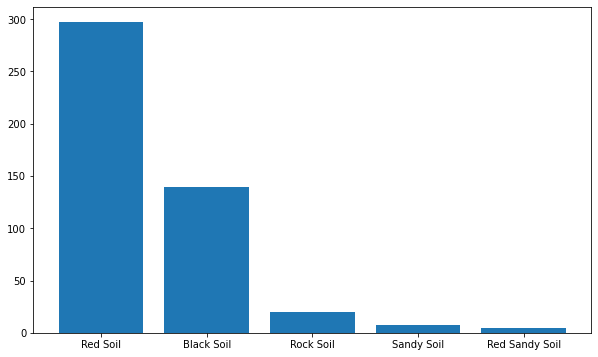

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Tomato', 'Sweetcorn', 'Mulberry', 'Potatao', 'Cabage',
       'Groundnut', 'Potato', 'Paddy', 'Banana', 'Mulbarry', 'Chillies',
       'Jowar', 'Maize', 'Mango', 'Flowers', 'Beans', 'Vegetables',
       'Horse gram', 'Papaya', 'Cabbage', 'Dhavanam', 'Horsegram',
       'banana', 'beans', 'Cucumber', 'Benda', 'Donda', 'Anaar',
       'Fodder Crops', 'Beera', 'Ragi'], dtype=object)

In [14]:
df['Crop'].value_counts()

Groundnut       271
Tomato           54
Potato           36
Beans            26
Sweetcorn         9
Flowers           9
Mango             8
Mulbarry          7
Mulberry          7
Chillies          4
Horse gram        4
Paddy             3
Jowar             3
Potatao           2
Donda             2
Banana            2
Cabage            2
beans             2
Maize             2
Cabbage           2
Horsegram         2
Cucumber          2
Papaya            1
Fodder Crops      1
Anaar             1
Ragi              1
banana            1
Beera             1
Vegetables        1
Dhavanam          1
Benda             1
Name: Crop, dtype: int64

GroundNut    271
Tomato        54
Potato        38
Beans         28
Mulberry      14
SweetCorn      9
Mango          8
HorseGram      6
Name: Crop, dtype: int64


<BarContainer object of 8 artists>

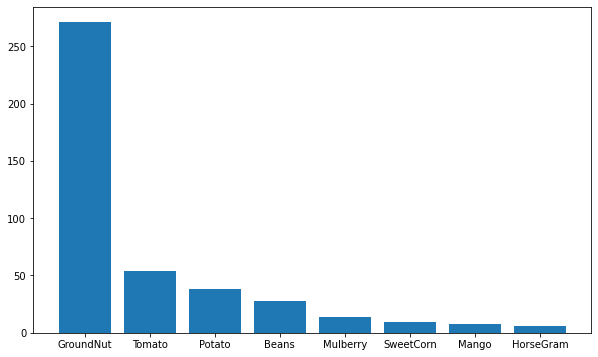

In [15]:
df['Crop'] = df['Crop'].replace('Groundnut', 'GroundNut')
df['Crop'] = df['Crop'].replace('Tomato', 'Tomato')
df['Crop'] = df['Crop'].replace('Sweetcorn', 'SweetCorn')
df['Crop'] = df['Crop'].replace(['Mulberry', 'Mulbarry'], 'Mulberry')
df['Crop'] = df['Crop'].replace(['Horsegram', 'Horse gram'], 'HorseGram')
df['Crop'] = df['Crop'].replace(['beans', 'Beans'], 'Beans')
df['Crop'] = df['Crop'].replace(['Cabbage', 'Cabage'], 'Cabbage')
df['Crop'] = df['Crop'].replace('Potatao', 'Potato')

df = df[(df['Crop'] != 'Ragi') & (df['Crop'] != 'banana') & (df['Crop'] != 'Fodder Crops')]
df = df[(df['Crop'] != 'Anaar') & (df['Crop'] != 'Dhavanam') & (df['Crop'] != 'Papaya')]
df = df[(df['Crop'] != 'Vegetables') & (df['Crop'] != 'Beera') & (df['Crop'] != 'Benda')]
df = df[(df['Crop'] != 'Flowers') & (df['Crop'] != 'Donda') & (df['Crop'] != 'Banana') & (df['Crop'] != 'Maize')]
df = df[(df['Crop'] != 'Cucumber') & (df['Crop'] != 'Cabbage') & (df['Crop'] != 'Chillies') & (df['Crop'] != '-')]
df = df[(df['Crop'] != 'Jowar') & (df['Crop'] != 'Paddy') & (df['Crop'] != 'Cabbage')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
df = df[(df["Crop"] != 'SweetCorn') & (df["Crop"] != 'Mango') & (df["Crop"] != 'HorseGram')]

In [17]:
# Getting rid of features that have a high correlation among one another

In [18]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,EVI
pH,1.000000,0.196959,0.167321,0.257474,0.140853,0.585366,0.417403,0.065797,0.100992,0.338143,-0.281180,0.085569,-0.481612,0.112672
EC,0.196959,1.000000,0.271981,0.508463,0.390298,0.217636,0.319625,0.804249,0.232168,0.487348,-0.024144,0.079764,-0.069538,0.017303
OC,0.167321,0.271981,1.000000,0.366306,0.303209,0.259071,0.324211,0.201927,0.374745,0.522572,0.124738,0.396300,0.081811,-0.067278
P,0.257474,0.508463,0.366306,1.000000,0.442074,0.098802,0.331307,0.302228,0.406321,0.607754,-0.012178,0.214298,-0.036577,0.117112
K,0.140853,0.390298,0.303209,0.442074,1.000000,0.139512,0.203654,0.225678,0.221848,0.506844,-0.052497,0.137478,0.109595,0.008449
Ca,0.585366,0.217636,0.259071,0.098802,0.139512,1.000000,0.726085,0.107572,-0.016208,0.362603,-0.082309,0.224325,-0.246225,0.103992
Mg,0.417403,0.319625,0.324211,0.331307,0.203654,0.726085,1.000000,0.186015,0.106476,0.508170,0.043548,0.403892,-0.085886,0.122284
S,0.065797,0.804249,0.201927,0.302228,0.225678,0.107572,0.186015,1.000000,0.147281,0.299676,0.006282,0.075348,-0.000966,-0.010552
Zn,0.100992,0.232168,0.374745,0.406321,0.221848,-0.016208,0.106476,0.147281,1.000000,0.377776,0.002971,0.315376,0.145219,-0.108816
B,0.338143,0.487348,0.522572,0.607754,0.506844,0.362603,0.508170,0.299676,0.377776,1.000000,-0.000181,0.338284,0.016717,0.147576


In [19]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['P', 'Ca', 'Mg', 'S', 'B', 'Cu']


In [20]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'K', 'Zn', 'Fe', 'Mn', 'EVI', 'Crop']


In [21]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [22]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

       pH    EC    OC      K    Zn    Fe     Mn       EVI  Black Soil  \
140  7.25  0.23  0.27  123.0  1.94  6.61  19.54  0.524514           0   

     Red Sandy Soil  Red Soil  Rock Soil  Sandy Soil  
140               0         1          0           0  
140    Tomato
Name: Crop, dtype: object


In [23]:
# Standardizing the independent variables using Feature Scaling
sc = StandardScaler()
X[:, 0:8] = sc.fit_transform(X[:, 0:8])

In [24]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [25]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [26]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [27]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [28]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [29]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7905604719764012


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.08 %
Standard Deviation: 2.98 %


# Decision Tree Classifier

In [32]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [33]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7168141592920354


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 68.51 %
Standard Deviation: 5.66 %


# Random Forest Classifier

In [36]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [37]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [38]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8259587020648967


In [39]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.45 %
Standard Deviation: 4.31 %


# XGBoost

In [40]:
clf4_4 =  HistGradientBoostingClassifier(random_state=0)
clf4_4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [41]:
y_test_pred = clf4_4.predict(X_test)
y_train_pred = clf4_4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [42]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8259587020648967


In [43]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4_4, X = X_train, y = y_train, cv = 10)

In [44]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 85.24 %
Standard Deviation: 3.47 %


In [45]:
# pickle.dump(clf4_4, open('Chittoor_model.pkl', 'wb'))
# pickle.dump(sc2, open('Chittoor_scaler.pkl', 'wb'))
# HERE

# Multi-layer Perceptron Classifier

In [46]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [47]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [48]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.735236220472441
Testing Accuracy:  0.6637168141592921


In [49]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 69.89 %
Standard Deviation: 4.05 %


# Catboost

In [50]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.4860823	total: 158ms	remaining: 15.6s
1:	learn: 1.3957180	total: 159ms	remaining: 7.81s
2:	learn: 1.3294378	total: 161ms	remaining: 5.2s
3:	learn: 1.2250055	total: 162ms	remaining: 3.88s
4:	learn: 1.1759529	total: 163ms	remaining: 3.09s
5:	learn: 1.1294551	total: 164ms	remaining: 2.57s
6:	learn: 1.1111692	total: 165ms	remaining: 2.19s
7:	learn: 1.0760229	total: 166ms	remaining: 1.91s
8:	learn: 1.0412922	total: 167ms	remaining: 1.69s
9:	learn: 1.0234881	total: 168ms	remaining: 1.51s
10:	learn: 1.0037531	total: 168ms	remaining: 1.36s
11:	learn: 0.9952650	total: 169ms	remaining: 1.24s
12:	learn: 0.9626322	total: 170ms	remaining: 1.14s
13:	learn: 0.9458811	total: 171ms	remaining: 1.05s
14:	learn: 0.9293089	total: 172ms	remaining: 973ms
15:	learn: 0.9140468	total: 173ms	remaining: 906ms
16:	learn: 0.8966232	total: 174ms	remaining: 847ms
17:	learn: 0.8848759	total: 174ms	remaining: 795ms
18:	learn: 0.8724768	total: 175ms	remaining: 748ms
19:	learn: 0.8627022	total: 176ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1.328176843
bestIteration = 99

Training on fold [1/5]

bestTest = 1.319084989
bestIteration = 99

Training on fold [2/5]

bestTest = 1.3004547
bestIteration = 99

Training on fold [3/5]

bestTest = 1.331730566
bestIteration = 99

Training on fold [4/5]

bestTest = 1.313669025
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.5958658	test: 1.5953437	best: 1.5953437 (0)	total: 2.45ms	remaining: 2.45s
1:	learn: 1.5823393	test: 1.5829726	best: 1.5829726 (1)	total: 5.07ms	remaining: 2.53s
2:	learn: 1.5706421	test: 1.5741222	best: 1.5741222 (2)	total: 7.64ms	remaining: 2.54s
3:	learn: 1.5624545	test: 1.5673925	best: 1.5673925 (3)	total: 9.59ms	remaining: 2.39s
4:	learn: 1.5507101	test: 1.5567443	best: 1.5567443 (4)	total: 11.4ms	remaining: 2.27s
5:	learn: 1.5414950	test: 1.5476781	best: 1.5476781 (5)	total: 13.4ms	remaining: 2.22s
6:	learn: 1.5315352	test: 1.5388916	best: 1.5388916 (6)	total: 15.2ms	remaining: 2.16s
7:	learn: 1.5215839	test: 1.5289597	best: 1.5289597 (7)	total: 17.7ms	remaining: 2.19s
8:	learn: 1.5103640	test: 1.5201182	best: 1.5201182 (8)	total: 19.5ms	remaining: 2.15s
9:	learn: 1.5017308	test: 1.5128576	best: 1.5128576 (9)	total: 22.1ms	remaining: 2.19s
10:	learn: 1.4922720	test: 1.5040113	best: 1.5040113 (10)	total: 24.1ms	remaining: 2.16s
11:	learn: 1.4820330	test: 1.4937938	best

158:	learn: 0.9657684	test: 1.0605137	best: 1.0605137 (158)	total: 349ms	remaining: 1.85s
159:	learn: 0.9638260	test: 1.0590367	best: 1.0590367 (159)	total: 352ms	remaining: 1.84s
160:	learn: 0.9623220	test: 1.0572138	best: 1.0572138 (160)	total: 354ms	remaining: 1.84s
161:	learn: 0.9607754	test: 1.0553849	best: 1.0553849 (161)	total: 356ms	remaining: 1.84s
162:	learn: 0.9596528	test: 1.0542202	best: 1.0542202 (162)	total: 358ms	remaining: 1.84s
163:	learn: 0.9581209	test: 1.0531733	best: 1.0531733 (163)	total: 361ms	remaining: 1.84s
164:	learn: 0.9552645	test: 1.0512148	best: 1.0512148 (164)	total: 363ms	remaining: 1.83s
165:	learn: 0.9537935	test: 1.0500386	best: 1.0500386 (165)	total: 365ms	remaining: 1.83s
166:	learn: 0.9506521	test: 1.0480377	best: 1.0480377 (166)	total: 367ms	remaining: 1.83s
167:	learn: 0.9489331	test: 1.0458909	best: 1.0458909 (167)	total: 369ms	remaining: 1.83s
168:	learn: 0.9470078	test: 1.0435573	best: 1.0435573 (168)	total: 371ms	remaining: 1.82s
169:	learn

298:	learn: 0.7658095	test: 0.9010245	best: 0.9010245 (298)	total: 701ms	remaining: 1.64s
299:	learn: 0.7650633	test: 0.9004618	best: 0.9004618 (299)	total: 703ms	remaining: 1.64s
300:	learn: 0.7641842	test: 0.8997478	best: 0.8997478 (300)	total: 706ms	remaining: 1.64s
301:	learn: 0.7625266	test: 0.8976263	best: 0.8976263 (301)	total: 709ms	remaining: 1.64s
302:	learn: 0.7614833	test: 0.8967641	best: 0.8967641 (302)	total: 712ms	remaining: 1.64s
303:	learn: 0.7604859	test: 0.8962655	best: 0.8962655 (303)	total: 714ms	remaining: 1.63s
304:	learn: 0.7589315	test: 0.8957879	best: 0.8957879 (304)	total: 717ms	remaining: 1.63s
305:	learn: 0.7579019	test: 0.8946595	best: 0.8946595 (305)	total: 720ms	remaining: 1.63s
306:	learn: 0.7570238	test: 0.8937224	best: 0.8937224 (306)	total: 723ms	remaining: 1.63s
307:	learn: 0.7560893	test: 0.8933550	best: 0.8933550 (307)	total: 725ms	remaining: 1.63s
308:	learn: 0.7547458	test: 0.8920916	best: 0.8920916 (308)	total: 728ms	remaining: 1.63s
309:	learn

434:	learn: 0.6321967	test: 0.8043296	best: 0.8043296 (434)	total: 1.05s	remaining: 1.37s
435:	learn: 0.6315089	test: 0.8032844	best: 0.8032844 (435)	total: 1.06s	remaining: 1.37s
436:	learn: 0.6304984	test: 0.8028418	best: 0.8028418 (436)	total: 1.06s	remaining: 1.37s
437:	learn: 0.6298114	test: 0.8021522	best: 0.8021522 (437)	total: 1.06s	remaining: 1.36s
438:	learn: 0.6292999	test: 0.8019953	best: 0.8019953 (438)	total: 1.07s	remaining: 1.36s
439:	learn: 0.6281763	test: 0.8012263	best: 0.8012263 (439)	total: 1.07s	remaining: 1.36s
440:	learn: 0.6268995	test: 0.7998884	best: 0.7998884 (440)	total: 1.07s	remaining: 1.36s
441:	learn: 0.6263926	test: 0.7999196	best: 0.7998884 (440)	total: 1.07s	remaining: 1.36s
442:	learn: 0.6251630	test: 0.7992534	best: 0.7992534 (442)	total: 1.08s	remaining: 1.35s
443:	learn: 0.6243851	test: 0.7990012	best: 0.7990012 (443)	total: 1.08s	remaining: 1.35s
444:	learn: 0.6233792	test: 0.7979079	best: 0.7979079 (444)	total: 1.08s	remaining: 1.35s
445:	learn

573:	learn: 0.5318623	test: 0.7330727	best: 0.7330727 (573)	total: 1.41s	remaining: 1.05s
574:	learn: 0.5314801	test: 0.7327109	best: 0.7327109 (574)	total: 1.41s	remaining: 1.04s
575:	learn: 0.5306134	test: 0.7322877	best: 0.7322877 (575)	total: 1.41s	remaining: 1.04s
576:	learn: 0.5298388	test: 0.7316761	best: 0.7316761 (576)	total: 1.42s	remaining: 1.04s
577:	learn: 0.5296247	test: 0.7314242	best: 0.7314242 (577)	total: 1.42s	remaining: 1.03s
578:	learn: 0.5294695	test: 0.7313682	best: 0.7313682 (578)	total: 1.42s	remaining: 1.03s
579:	learn: 0.5291655	test: 0.7313009	best: 0.7313009 (579)	total: 1.42s	remaining: 1.03s
580:	learn: 0.5281959	test: 0.7307178	best: 0.7307178 (580)	total: 1.42s	remaining: 1.03s
581:	learn: 0.5275002	test: 0.7302301	best: 0.7302301 (581)	total: 1.43s	remaining: 1.02s
582:	learn: 0.5268316	test: 0.7301965	best: 0.7301965 (582)	total: 1.43s	remaining: 1.02s
583:	learn: 0.5261744	test: 0.7297825	best: 0.7297825 (583)	total: 1.43s	remaining: 1.02s
584:	learn

737:	learn: 0.4401902	test: 0.6716388	best: 0.6716388 (737)	total: 1.76s	remaining: 625ms
738:	learn: 0.4398245	test: 0.6713430	best: 0.6713430 (738)	total: 1.76s	remaining: 623ms
739:	learn: 0.4392415	test: 0.6705475	best: 0.6705475 (739)	total: 1.76s	remaining: 620ms
740:	learn: 0.4387377	test: 0.6701196	best: 0.6701196 (740)	total: 1.77s	remaining: 617ms
741:	learn: 0.4383432	test: 0.6697326	best: 0.6697326 (741)	total: 1.77s	remaining: 615ms
742:	learn: 0.4379246	test: 0.6695410	best: 0.6695410 (742)	total: 1.77s	remaining: 612ms
743:	learn: 0.4375384	test: 0.6692826	best: 0.6692826 (743)	total: 1.77s	remaining: 610ms
744:	learn: 0.4372715	test: 0.6692430	best: 0.6692430 (744)	total: 1.77s	remaining: 607ms
745:	learn: 0.4366729	test: 0.6686975	best: 0.6686975 (745)	total: 1.77s	remaining: 605ms
746:	learn: 0.4361933	test: 0.6681973	best: 0.6681973 (746)	total: 1.78s	remaining: 602ms
747:	learn: 0.4356378	test: 0.6677103	best: 0.6677103 (747)	total: 1.78s	remaining: 599ms
748:	learn

905:	learn: 0.3688976	test: 0.6183683	best: 0.6183683 (905)	total: 2.11s	remaining: 219ms
906:	learn: 0.3686757	test: 0.6181250	best: 0.6181250 (906)	total: 2.12s	remaining: 217ms
907:	learn: 0.3685307	test: 0.6179971	best: 0.6179971 (907)	total: 2.12s	remaining: 215ms
908:	learn: 0.3682494	test: 0.6179399	best: 0.6179399 (908)	total: 2.12s	remaining: 212ms
909:	learn: 0.3679174	test: 0.6176600	best: 0.6176600 (909)	total: 2.13s	remaining: 210ms
910:	learn: 0.3675091	test: 0.6172114	best: 0.6172114 (910)	total: 2.13s	remaining: 208ms
911:	learn: 0.3672761	test: 0.6170289	best: 0.6170289 (911)	total: 2.13s	remaining: 206ms
912:	learn: 0.3670463	test: 0.6170429	best: 0.6170289 (911)	total: 2.13s	remaining: 203ms
913:	learn: 0.3667226	test: 0.6168166	best: 0.6168166 (913)	total: 2.14s	remaining: 201ms
914:	learn: 0.3665055	test: 0.6167130	best: 0.6167130 (914)	total: 2.14s	remaining: 199ms
915:	learn: 0.3659812	test: 0.6165461	best: 0.6165461 (915)	total: 2.14s	remaining: 196ms
916:	learn

52:	learn: 0.9276799	test: 1.0297127	best: 1.0297127 (52)	total: 128ms	remaining: 2.28s
53:	learn: 0.9203578	test: 1.0226888	best: 1.0226888 (53)	total: 131ms	remaining: 2.3s
54:	learn: 0.9146348	test: 1.0181889	best: 1.0181889 (54)	total: 134ms	remaining: 2.31s
55:	learn: 0.9108813	test: 1.0157047	best: 1.0157047 (55)	total: 138ms	remaining: 2.33s
56:	learn: 0.9032213	test: 1.0109249	best: 1.0109249 (56)	total: 140ms	remaining: 2.31s
57:	learn: 0.8984161	test: 1.0093916	best: 1.0093916 (57)	total: 142ms	remaining: 2.31s
58:	learn: 0.8952344	test: 1.0055174	best: 1.0055174 (58)	total: 144ms	remaining: 2.29s
59:	learn: 0.8873068	test: 1.0012088	best: 1.0012088 (59)	total: 146ms	remaining: 2.29s
60:	learn: 0.8826358	test: 0.9972415	best: 0.9972415 (60)	total: 148ms	remaining: 2.28s
61:	learn: 0.8780082	test: 0.9931345	best: 0.9931345 (61)	total: 150ms	remaining: 2.27s
62:	learn: 0.8711874	test: 0.9869080	best: 0.9869080 (62)	total: 153ms	remaining: 2.27s
63:	learn: 0.8657418	test: 0.9810

209:	learn: 0.4592544	test: 0.6808545	best: 0.6808545 (209)	total: 480ms	remaining: 1.8s
210:	learn: 0.4577827	test: 0.6792235	best: 0.6792235 (210)	total: 483ms	remaining: 1.81s
211:	learn: 0.4547242	test: 0.6782046	best: 0.6782046 (211)	total: 485ms	remaining: 1.8s
212:	learn: 0.4538945	test: 0.6772286	best: 0.6772286 (212)	total: 488ms	remaining: 1.8s
213:	learn: 0.4522653	test: 0.6753342	best: 0.6753342 (213)	total: 490ms	remaining: 1.8s
214:	learn: 0.4505913	test: 0.6748756	best: 0.6748756 (214)	total: 492ms	remaining: 1.8s
215:	learn: 0.4492153	test: 0.6734372	best: 0.6734372 (215)	total: 494ms	remaining: 1.79s
216:	learn: 0.4477617	test: 0.6733199	best: 0.6733199 (216)	total: 496ms	remaining: 1.79s
217:	learn: 0.4449270	test: 0.6718709	best: 0.6718709 (217)	total: 500ms	remaining: 1.79s
218:	learn: 0.4439085	test: 0.6701993	best: 0.6701993 (218)	total: 503ms	remaining: 1.79s
219:	learn: 0.4431727	test: 0.6697772	best: 0.6697772 (219)	total: 505ms	remaining: 1.79s
220:	learn: 0.4

379:	learn: 0.2789337	test: 0.5681767	best: 0.5681767 (379)	total: 845ms	remaining: 1.38s
380:	learn: 0.2785467	test: 0.5675438	best: 0.5675438 (380)	total: 848ms	remaining: 1.38s
381:	learn: 0.2781247	test: 0.5674414	best: 0.5674414 (381)	total: 850ms	remaining: 1.38s
382:	learn: 0.2774798	test: 0.5670356	best: 0.5670356 (382)	total: 853ms	remaining: 1.37s
383:	learn: 0.2771038	test: 0.5665840	best: 0.5665840 (383)	total: 855ms	remaining: 1.37s
384:	learn: 0.2768317	test: 0.5661614	best: 0.5661614 (384)	total: 858ms	remaining: 1.37s
385:	learn: 0.2761974	test: 0.5659662	best: 0.5659662 (385)	total: 861ms	remaining: 1.37s
386:	learn: 0.2757367	test: 0.5656308	best: 0.5656308 (386)	total: 863ms	remaining: 1.37s
387:	learn: 0.2747822	test: 0.5648193	best: 0.5648193 (387)	total: 866ms	remaining: 1.37s
388:	learn: 0.2742674	test: 0.5646594	best: 0.5646594 (388)	total: 869ms	remaining: 1.36s
389:	learn: 0.2736837	test: 0.5650883	best: 0.5646594 (388)	total: 871ms	remaining: 1.36s
390:	learn

473:	learn: 0.2241222	test: 0.5378791	best: 0.5375529 (472)	total: 1.01s	remaining: 1.13s
474:	learn: 0.2234775	test: 0.5373096	best: 0.5373096 (474)	total: 1.02s	remaining: 1.12s
475:	learn: 0.2231652	test: 0.5374581	best: 0.5373096 (474)	total: 1.02s	remaining: 1.12s
476:	learn: 0.2228370	test: 0.5371731	best: 0.5371731 (476)	total: 1.02s	remaining: 1.12s
477:	learn: 0.2221167	test: 0.5370860	best: 0.5370860 (477)	total: 1.02s	remaining: 1.12s
478:	learn: 0.2212630	test: 0.5364444	best: 0.5364444 (478)	total: 1.02s	remaining: 1.11s
479:	learn: 0.2206787	test: 0.5366601	best: 0.5364444 (478)	total: 1.03s	remaining: 1.11s
480:	learn: 0.2200093	test: 0.5361735	best: 0.5361735 (480)	total: 1.03s	remaining: 1.11s
481:	learn: 0.2197044	test: 0.5362702	best: 0.5361735 (480)	total: 1.03s	remaining: 1.11s
482:	learn: 0.2193299	test: 0.5362280	best: 0.5361735 (480)	total: 1.03s	remaining: 1.11s
483:	learn: 0.2188837	test: 0.5360178	best: 0.5360178 (483)	total: 1.04s	remaining: 1.1s
484:	learn:

623:	learn: 0.1644517	test: 0.4959402	best: 0.4959402 (623)	total: 1.36s	remaining: 823ms
624:	learn: 0.1641356	test: 0.4956067	best: 0.4956067 (624)	total: 1.37s	remaining: 821ms
625:	learn: 0.1639508	test: 0.4958268	best: 0.4956067 (624)	total: 1.37s	remaining: 819ms
626:	learn: 0.1636702	test: 0.4953109	best: 0.4953109 (626)	total: 1.37s	remaining: 817ms
627:	learn: 0.1634880	test: 0.4952615	best: 0.4952615 (627)	total: 1.38s	remaining: 815ms
628:	learn: 0.1632915	test: 0.4943766	best: 0.4943766 (628)	total: 1.38s	remaining: 814ms
629:	learn: 0.1630946	test: 0.4939754	best: 0.4939754 (629)	total: 1.38s	remaining: 812ms
630:	learn: 0.1626205	test: 0.4942210	best: 0.4939754 (629)	total: 1.38s	remaining: 810ms
631:	learn: 0.1621810	test: 0.4934247	best: 0.4934247 (631)	total: 1.39s	remaining: 808ms
632:	learn: 0.1620834	test: 0.4935257	best: 0.4934247 (631)	total: 1.39s	remaining: 806ms
633:	learn: 0.1614226	test: 0.4935254	best: 0.4934247 (631)	total: 1.39s	remaining: 804ms
634:	learn

725:	learn: 0.1364733	test: 0.4747580	best: 0.4745480 (723)	total: 1.55s	remaining: 585ms
726:	learn: 0.1362472	test: 0.4750266	best: 0.4745480 (723)	total: 1.55s	remaining: 583ms
727:	learn: 0.1358339	test: 0.4747415	best: 0.4745480 (723)	total: 1.55s	remaining: 581ms
728:	learn: 0.1356030	test: 0.4745602	best: 0.4745480 (723)	total: 1.56s	remaining: 579ms
729:	learn: 0.1351947	test: 0.4736276	best: 0.4736276 (729)	total: 1.56s	remaining: 577ms
730:	learn: 0.1350167	test: 0.4738021	best: 0.4736276 (729)	total: 1.56s	remaining: 575ms
731:	learn: 0.1344760	test: 0.4742200	best: 0.4736276 (729)	total: 1.56s	remaining: 573ms
732:	learn: 0.1342407	test: 0.4741340	best: 0.4736276 (729)	total: 1.57s	remaining: 571ms
733:	learn: 0.1340091	test: 0.4743592	best: 0.4736276 (729)	total: 1.57s	remaining: 569ms
734:	learn: 0.1338514	test: 0.4745217	best: 0.4736276 (729)	total: 1.57s	remaining: 566ms
735:	learn: 0.1336264	test: 0.4741339	best: 0.4736276 (729)	total: 1.57s	remaining: 564ms
736:	learn

824:	learn: 0.1158856	test: 0.4669629	best: 0.4668476 (820)	total: 1.72s	remaining: 366ms
825:	learn: 0.1156566	test: 0.4663821	best: 0.4663821 (825)	total: 1.73s	remaining: 364ms
826:	learn: 0.1155887	test: 0.4662874	best: 0.4662874 (826)	total: 1.73s	remaining: 362ms
827:	learn: 0.1154426	test: 0.4660987	best: 0.4660987 (827)	total: 1.73s	remaining: 360ms
828:	learn: 0.1152102	test: 0.4662294	best: 0.4660987 (827)	total: 1.73s	remaining: 358ms
829:	learn: 0.1149200	test: 0.4657658	best: 0.4657658 (829)	total: 1.74s	remaining: 356ms
830:	learn: 0.1147677	test: 0.4657643	best: 0.4657643 (830)	total: 1.74s	remaining: 354ms
831:	learn: 0.1146293	test: 0.4657125	best: 0.4657125 (831)	total: 1.74s	remaining: 352ms
832:	learn: 0.1142238	test: 0.4652020	best: 0.4652020 (832)	total: 1.74s	remaining: 349ms
833:	learn: 0.1141063	test: 0.4655140	best: 0.4652020 (832)	total: 1.74s	remaining: 347ms
834:	learn: 0.1140490	test: 0.4655047	best: 0.4652020 (832)	total: 1.75s	remaining: 345ms
835:	learn

919:	learn: 0.1004358	test: 0.4576977	best: 0.4576977 (919)	total: 1.9s	remaining: 165ms
920:	learn: 0.1003138	test: 0.4572427	best: 0.4572427 (920)	total: 1.9s	remaining: 163ms
921:	learn: 0.1001215	test: 0.4571929	best: 0.4571929 (921)	total: 1.9s	remaining: 161ms
922:	learn: 0.1000289	test: 0.4571229	best: 0.4571229 (922)	total: 1.91s	remaining: 159ms
923:	learn: 0.0998730	test: 0.4572945	best: 0.4571229 (922)	total: 1.91s	remaining: 157ms
924:	learn: 0.0995271	test: 0.4574753	best: 0.4571229 (922)	total: 1.91s	remaining: 155ms
925:	learn: 0.0994193	test: 0.4575522	best: 0.4571229 (922)	total: 1.91s	remaining: 153ms
926:	learn: 0.0992341	test: 0.4571218	best: 0.4571218 (926)	total: 1.91s	remaining: 151ms
927:	learn: 0.0991302	test: 0.4567664	best: 0.4567664 (927)	total: 1.92s	remaining: 149ms
928:	learn: 0.0989609	test: 0.4568449	best: 0.4567664 (927)	total: 1.92s	remaining: 147ms
929:	learn: 0.0989010	test: 0.4564866	best: 0.4564866 (929)	total: 1.92s	remaining: 145ms
930:	learn: 0

31:	learn: 1.2635104	test: 1.3207438	best: 1.3207438 (31)	total: 220ms	remaining: 6.65s
32:	learn: 1.2579781	test: 1.3168265	best: 1.3168265 (32)	total: 228ms	remaining: 6.68s
33:	learn: 1.2498704	test: 1.3100464	best: 1.3100464 (33)	total: 236ms	remaining: 6.71s
34:	learn: 1.2433637	test: 1.3044528	best: 1.3044528 (34)	total: 242ms	remaining: 6.68s
35:	learn: 1.2370142	test: 1.2973039	best: 1.2973039 (35)	total: 248ms	remaining: 6.64s
36:	learn: 1.2294651	test: 1.2918625	best: 1.2918625 (36)	total: 255ms	remaining: 6.64s
37:	learn: 1.2232852	test: 1.2863038	best: 1.2863038 (37)	total: 262ms	remaining: 6.63s
38:	learn: 1.2159994	test: 1.2822761	best: 1.2822761 (38)	total: 267ms	remaining: 6.59s
39:	learn: 1.2086847	test: 1.2765692	best: 1.2765692 (39)	total: 274ms	remaining: 6.57s
40:	learn: 1.2017154	test: 1.2714953	best: 1.2714953 (40)	total: 280ms	remaining: 6.54s
41:	learn: 1.1952926	test: 1.2652862	best: 1.2652862 (41)	total: 285ms	remaining: 6.5s
42:	learn: 1.1899805	test: 1.2613

126:	learn: 0.8524307	test: 0.9977126	best: 0.9977126 (126)	total: 791ms	remaining: 5.44s
127:	learn: 0.8492244	test: 0.9947400	best: 0.9947400 (127)	total: 800ms	remaining: 5.45s
128:	learn: 0.8469835	test: 0.9932032	best: 0.9932032 (128)	total: 808ms	remaining: 5.45s
129:	learn: 0.8447868	test: 0.9909804	best: 0.9909804 (129)	total: 813ms	remaining: 5.44s
130:	learn: 0.8423613	test: 0.9892031	best: 0.9892031 (130)	total: 820ms	remaining: 5.44s
131:	learn: 0.8398186	test: 0.9878351	best: 0.9878351 (131)	total: 827ms	remaining: 5.44s
132:	learn: 0.8374197	test: 0.9862814	best: 0.9862814 (132)	total: 835ms	remaining: 5.44s
133:	learn: 0.8347288	test: 0.9841444	best: 0.9841444 (133)	total: 843ms	remaining: 5.45s
134:	learn: 0.8329341	test: 0.9827000	best: 0.9827000 (134)	total: 852ms	remaining: 5.46s
135:	learn: 0.8302157	test: 0.9798513	best: 0.9798513 (135)	total: 860ms	remaining: 5.46s
136:	learn: 0.8268388	test: 0.9776027	best: 0.9776027 (136)	total: 866ms	remaining: 5.45s
137:	learn

225:	learn: 0.6479764	test: 0.8390491	best: 0.8390491 (225)	total: 1.39s	remaining: 4.75s
226:	learn: 0.6464224	test: 0.8380739	best: 0.8380739 (226)	total: 1.4s	remaining: 4.75s
227:	learn: 0.6447448	test: 0.8366554	best: 0.8366554 (227)	total: 1.4s	remaining: 4.75s
228:	learn: 0.6425613	test: 0.8349837	best: 0.8349837 (228)	total: 1.41s	remaining: 4.74s
229:	learn: 0.6410916	test: 0.8343412	best: 0.8343412 (229)	total: 1.41s	remaining: 4.73s
230:	learn: 0.6397558	test: 0.8332469	best: 0.8332469 (230)	total: 1.42s	remaining: 4.73s
231:	learn: 0.6385571	test: 0.8324182	best: 0.8324182 (231)	total: 1.43s	remaining: 4.72s
232:	learn: 0.6370714	test: 0.8310457	best: 0.8310457 (232)	total: 1.43s	remaining: 4.71s
233:	learn: 0.6353933	test: 0.8296447	best: 0.8296447 (233)	total: 1.44s	remaining: 4.71s
234:	learn: 0.6339630	test: 0.8281246	best: 0.8281246 (234)	total: 1.44s	remaining: 4.7s
235:	learn: 0.6324123	test: 0.8270270	best: 0.8270270 (235)	total: 1.45s	remaining: 4.69s
236:	learn: 0

319:	learn: 0.5154833	test: 0.7390746	best: 0.7390746 (319)	total: 1.95s	remaining: 4.15s
320:	learn: 0.5145518	test: 0.7380546	best: 0.7380546 (320)	total: 1.96s	remaining: 4.15s
321:	learn: 0.5134419	test: 0.7371861	best: 0.7371861 (321)	total: 1.97s	remaining: 4.15s
322:	learn: 0.5123833	test: 0.7365709	best: 0.7365709 (322)	total: 1.98s	remaining: 4.14s
323:	learn: 0.5113960	test: 0.7359910	best: 0.7359910 (323)	total: 1.98s	remaining: 4.13s
324:	learn: 0.5101812	test: 0.7355154	best: 0.7355154 (324)	total: 1.99s	remaining: 4.13s
325:	learn: 0.5092375	test: 0.7347132	best: 0.7347132 (325)	total: 1.99s	remaining: 4.12s
326:	learn: 0.5081984	test: 0.7340971	best: 0.7340971 (326)	total: 2s	remaining: 4.12s
327:	learn: 0.5073946	test: 0.7338052	best: 0.7338052 (327)	total: 2.01s	remaining: 4.11s
328:	learn: 0.5060206	test: 0.7329303	best: 0.7329303 (328)	total: 2.01s	remaining: 4.1s
329:	learn: 0.5053442	test: 0.7321185	best: 0.7321185 (329)	total: 2.02s	remaining: 4.1s
330:	learn: 0.5

419:	learn: 0.4177538	test: 0.6688337	best: 0.6688337 (419)	total: 2.54s	remaining: 3.5s
420:	learn: 0.4165189	test: 0.6675891	best: 0.6675891 (420)	total: 2.55s	remaining: 3.5s
421:	learn: 0.4157619	test: 0.6670014	best: 0.6670014 (421)	total: 2.55s	remaining: 3.5s
422:	learn: 0.4149244	test: 0.6662350	best: 0.6662350 (422)	total: 2.56s	remaining: 3.49s
423:	learn: 0.4136957	test: 0.6650440	best: 0.6650440 (423)	total: 2.56s	remaining: 3.48s
424:	learn: 0.4129573	test: 0.6647325	best: 0.6647325 (424)	total: 2.57s	remaining: 3.48s
425:	learn: 0.4121709	test: 0.6641815	best: 0.6641815 (425)	total: 2.58s	remaining: 3.47s
426:	learn: 0.4113972	test: 0.6637826	best: 0.6637826 (426)	total: 2.58s	remaining: 3.46s
427:	learn: 0.4104935	test: 0.6628847	best: 0.6628847 (427)	total: 2.59s	remaining: 3.46s
428:	learn: 0.4099670	test: 0.6624389	best: 0.6624389 (428)	total: 2.59s	remaining: 3.45s
429:	learn: 0.4090864	test: 0.6619417	best: 0.6619417 (429)	total: 2.6s	remaining: 3.45s
430:	learn: 0.

514:	learn: 0.3508134	test: 0.6203315	best: 0.6203315 (514)	total: 3.11s	remaining: 2.92s
515:	learn: 0.3503585	test: 0.6200064	best: 0.6200064 (515)	total: 3.11s	remaining: 2.92s
516:	learn: 0.3496261	test: 0.6195941	best: 0.6195941 (516)	total: 3.12s	remaining: 2.92s
517:	learn: 0.3490151	test: 0.6189781	best: 0.6189781 (517)	total: 3.13s	remaining: 2.91s
518:	learn: 0.3486288	test: 0.6184550	best: 0.6184550 (518)	total: 3.13s	remaining: 2.9s
519:	learn: 0.3482023	test: 0.6179961	best: 0.6179961 (519)	total: 3.14s	remaining: 2.9s
520:	learn: 0.3475100	test: 0.6177494	best: 0.6177494 (520)	total: 3.14s	remaining: 2.89s
521:	learn: 0.3469278	test: 0.6169650	best: 0.6169650 (521)	total: 3.15s	remaining: 2.88s
522:	learn: 0.3463350	test: 0.6165217	best: 0.6165217 (522)	total: 3.15s	remaining: 2.88s
523:	learn: 0.3457569	test: 0.6160775	best: 0.6160775 (523)	total: 3.16s	remaining: 2.87s
524:	learn: 0.3449454	test: 0.6152417	best: 0.6152417 (524)	total: 3.17s	remaining: 2.87s
525:	learn: 

630:	learn: 0.2862341	test: 0.5763240	best: 0.5763240 (630)	total: 3.85s	remaining: 2.25s
631:	learn: 0.2857368	test: 0.5759091	best: 0.5759091 (631)	total: 3.86s	remaining: 2.25s
632:	learn: 0.2853379	test: 0.5755646	best: 0.5755646 (632)	total: 3.87s	remaining: 2.24s
633:	learn: 0.2850861	test: 0.5752262	best: 0.5752262 (633)	total: 3.88s	remaining: 2.24s
634:	learn: 0.2847291	test: 0.5749413	best: 0.5749413 (634)	total: 3.88s	remaining: 2.23s
635:	learn: 0.2841056	test: 0.5742337	best: 0.5742337 (635)	total: 3.89s	remaining: 2.23s
636:	learn: 0.2835052	test: 0.5736570	best: 0.5736570 (636)	total: 3.9s	remaining: 2.22s
637:	learn: 0.2830821	test: 0.5737172	best: 0.5736570 (636)	total: 3.9s	remaining: 2.21s
638:	learn: 0.2823818	test: 0.5736018	best: 0.5736018 (638)	total: 3.91s	remaining: 2.21s
639:	learn: 0.2817922	test: 0.5732278	best: 0.5732278 (639)	total: 3.92s	remaining: 2.2s
640:	learn: 0.2811270	test: 0.5729145	best: 0.5729145 (640)	total: 3.92s	remaining: 2.2s
641:	learn: 0.

749:	learn: 0.2380946	test: 0.5379827	best: 0.5379827 (749)	total: 4.61s	remaining: 1.53s
750:	learn: 0.2376543	test: 0.5376983	best: 0.5376983 (750)	total: 4.61s	remaining: 1.53s
751:	learn: 0.2373998	test: 0.5375810	best: 0.5375810 (751)	total: 4.62s	remaining: 1.52s
752:	learn: 0.2369516	test: 0.5371621	best: 0.5371621 (752)	total: 4.63s	remaining: 1.52s
753:	learn: 0.2366263	test: 0.5368716	best: 0.5368716 (753)	total: 4.63s	remaining: 1.51s
754:	learn: 0.2362576	test: 0.5363652	best: 0.5363652 (754)	total: 4.64s	remaining: 1.5s
755:	learn: 0.2360386	test: 0.5362824	best: 0.5362824 (755)	total: 4.64s	remaining: 1.5s
756:	learn: 0.2355389	test: 0.5356444	best: 0.5356444 (756)	total: 4.65s	remaining: 1.49s
757:	learn: 0.2349030	test: 0.5350101	best: 0.5350101 (757)	total: 4.66s	remaining: 1.49s
758:	learn: 0.2346030	test: 0.5347715	best: 0.5347715 (758)	total: 4.66s	remaining: 1.48s
759:	learn: 0.2343975	test: 0.5345335	best: 0.5345335 (759)	total: 4.67s	remaining: 1.47s
760:	learn: 

850:	learn: 0.2063699	test: 0.5146138	best: 0.5146138 (850)	total: 5.2s	remaining: 910ms
851:	learn: 0.2061229	test: 0.5143923	best: 0.5143923 (851)	total: 5.21s	remaining: 904ms
852:	learn: 0.2058111	test: 0.5140191	best: 0.5140191 (852)	total: 5.21s	remaining: 899ms
853:	learn: 0.2057175	test: 0.5137256	best: 0.5137256 (853)	total: 5.22s	remaining: 892ms
854:	learn: 0.2054399	test: 0.5136836	best: 0.5136836 (854)	total: 5.23s	remaining: 886ms
855:	learn: 0.2050083	test: 0.5133751	best: 0.5133751 (855)	total: 5.23s	remaining: 880ms
856:	learn: 0.2046774	test: 0.5130294	best: 0.5130294 (856)	total: 5.24s	remaining: 874ms
857:	learn: 0.2044686	test: 0.5127895	best: 0.5127895 (857)	total: 5.24s	remaining: 868ms
858:	learn: 0.2041562	test: 0.5127344	best: 0.5127344 (858)	total: 5.25s	remaining: 862ms
859:	learn: 0.2039508	test: 0.5125904	best: 0.5125904 (859)	total: 5.25s	remaining: 856ms
860:	learn: 0.2036558	test: 0.5123460	best: 0.5123460 (860)	total: 5.26s	remaining: 849ms
861:	learn:

950:	learn: 0.1815330	test: 0.4973025	best: 0.4973025 (950)	total: 5.78s	remaining: 298ms
951:	learn: 0.1811703	test: 0.4973956	best: 0.4973025 (950)	total: 5.79s	remaining: 292ms
952:	learn: 0.1809649	test: 0.4972650	best: 0.4972650 (952)	total: 5.8s	remaining: 286ms
953:	learn: 0.1808800	test: 0.4972959	best: 0.4972650 (952)	total: 5.81s	remaining: 280ms
954:	learn: 0.1807108	test: 0.4970874	best: 0.4970874 (954)	total: 5.81s	remaining: 274ms
955:	learn: 0.1805573	test: 0.4967777	best: 0.4967777 (955)	total: 5.82s	remaining: 268ms
956:	learn: 0.1803831	test: 0.4964137	best: 0.4964137 (956)	total: 5.82s	remaining: 262ms
957:	learn: 0.1801863	test: 0.4962715	best: 0.4962715 (957)	total: 5.83s	remaining: 256ms
958:	learn: 0.1799477	test: 0.4961022	best: 0.4961022 (958)	total: 5.83s	remaining: 249ms
959:	learn: 0.1798210	test: 0.4959083	best: 0.4959083 (959)	total: 5.84s	remaining: 243ms
960:	learn: 0.1796295	test: 0.4957092	best: 0.4957092 (960)	total: 5.85s	remaining: 237ms
961:	learn:

47:	learn: 0.7764621	test: 0.9431287	best: 0.9431287 (47)	total: 290ms	remaining: 5.75s
48:	learn: 0.7677025	test: 0.9365754	best: 0.9365754 (48)	total: 298ms	remaining: 5.78s
49:	learn: 0.7605719	test: 0.9314157	best: 0.9314157 (49)	total: 306ms	remaining: 5.81s
50:	learn: 0.7550126	test: 0.9275299	best: 0.9275299 (50)	total: 311ms	remaining: 5.79s
51:	learn: 0.7485540	test: 0.9232248	best: 0.9232248 (51)	total: 317ms	remaining: 5.78s
52:	learn: 0.7440957	test: 0.9202241	best: 0.9202241 (52)	total: 323ms	remaining: 5.76s
53:	learn: 0.7376959	test: 0.9152037	best: 0.9152037 (53)	total: 328ms	remaining: 5.75s
54:	learn: 0.7317747	test: 0.9122208	best: 0.9122208 (54)	total: 334ms	remaining: 5.73s
55:	learn: 0.7235349	test: 0.9082856	best: 0.9082856 (55)	total: 339ms	remaining: 5.72s
56:	learn: 0.7176259	test: 0.9021071	best: 0.9021071 (56)	total: 345ms	remaining: 5.71s
57:	learn: 0.7102962	test: 0.8961312	best: 0.8961312 (57)	total: 351ms	remaining: 5.7s
58:	learn: 0.7015736	test: 0.8915

170:	learn: 0.3166783	test: 0.6093929	best: 0.6093929 (170)	total: 1.06s	remaining: 5.15s
171:	learn: 0.3143338	test: 0.6080058	best: 0.6080058 (171)	total: 1.07s	remaining: 5.15s
172:	learn: 0.3132411	test: 0.6083721	best: 0.6080058 (171)	total: 1.08s	remaining: 5.15s
173:	learn: 0.3104353	test: 0.6059685	best: 0.6059685 (173)	total: 1.08s	remaining: 5.14s
174:	learn: 0.3083007	test: 0.6045897	best: 0.6045897 (174)	total: 1.09s	remaining: 5.13s
175:	learn: 0.3073972	test: 0.6046132	best: 0.6045897 (174)	total: 1.09s	remaining: 5.13s
176:	learn: 0.3058090	test: 0.6035009	best: 0.6035009 (176)	total: 1.1s	remaining: 5.12s
177:	learn: 0.3045352	test: 0.6026406	best: 0.6026406 (177)	total: 1.11s	remaining: 5.11s
178:	learn: 0.3028959	test: 0.6020030	best: 0.6020030 (178)	total: 1.11s	remaining: 5.1s
179:	learn: 0.3014059	test: 0.6002380	best: 0.6002380 (179)	total: 1.12s	remaining: 5.09s
180:	learn: 0.3008623	test: 0.5996766	best: 0.5996766 (180)	total: 1.12s	remaining: 5.08s
181:	learn: 

271:	learn: 0.1933640	test: 0.5257083	best: 0.5257083 (271)	total: 1.66s	remaining: 4.44s
272:	learn: 0.1924406	test: 0.5248570	best: 0.5248570 (272)	total: 1.67s	remaining: 4.44s
273:	learn: 0.1915726	test: 0.5240167	best: 0.5240167 (273)	total: 1.67s	remaining: 4.44s
274:	learn: 0.1910014	test: 0.5234082	best: 0.5234082 (274)	total: 1.68s	remaining: 4.43s
275:	learn: 0.1901624	test: 0.5232390	best: 0.5232390 (275)	total: 1.69s	remaining: 4.42s
276:	learn: 0.1895493	test: 0.5229618	best: 0.5229618 (276)	total: 1.69s	remaining: 4.42s
277:	learn: 0.1886424	test: 0.5223969	best: 0.5223969 (277)	total: 1.7s	remaining: 4.41s
278:	learn: 0.1879160	test: 0.5217486	best: 0.5217486 (278)	total: 1.7s	remaining: 4.4s
279:	learn: 0.1871548	test: 0.5211304	best: 0.5211304 (279)	total: 1.71s	remaining: 4.4s
280:	learn: 0.1859205	test: 0.5199755	best: 0.5199755 (280)	total: 1.72s	remaining: 4.39s
281:	learn: 0.1855972	test: 0.5197261	best: 0.5197261 (281)	total: 1.72s	remaining: 4.38s
282:	learn: 0.

372:	learn: 0.1319504	test: 0.4789923	best: 0.4789923 (372)	total: 2.25s	remaining: 3.79s
373:	learn: 0.1314724	test: 0.4790453	best: 0.4789923 (372)	total: 2.26s	remaining: 3.78s
374:	learn: 0.1309549	test: 0.4789870	best: 0.4789870 (374)	total: 2.27s	remaining: 3.78s
375:	learn: 0.1303434	test: 0.4791131	best: 0.4789870 (374)	total: 2.27s	remaining: 3.77s
376:	learn: 0.1295697	test: 0.4789442	best: 0.4789442 (376)	total: 2.28s	remaining: 3.77s
377:	learn: 0.1292721	test: 0.4782010	best: 0.4782010 (377)	total: 2.29s	remaining: 3.76s
378:	learn: 0.1286703	test: 0.4772181	best: 0.4772181 (378)	total: 2.29s	remaining: 3.75s
379:	learn: 0.1283179	test: 0.4771254	best: 0.4771254 (379)	total: 2.3s	remaining: 3.75s
380:	learn: 0.1278184	test: 0.4768358	best: 0.4768358 (380)	total: 2.3s	remaining: 3.74s
381:	learn: 0.1274431	test: 0.4761495	best: 0.4761495 (381)	total: 2.31s	remaining: 3.74s
382:	learn: 0.1269112	test: 0.4760162	best: 0.4760162 (382)	total: 2.31s	remaining: 3.73s
383:	learn: 

473:	learn: 0.0973928	test: 0.4538263	best: 0.4538263 (473)	total: 2.84s	remaining: 3.16s
474:	learn: 0.0971798	test: 0.4536499	best: 0.4536499 (474)	total: 2.85s	remaining: 3.15s
475:	learn: 0.0968623	test: 0.4534705	best: 0.4534705 (475)	total: 2.86s	remaining: 3.15s
476:	learn: 0.0966303	test: 0.4531767	best: 0.4531767 (476)	total: 2.87s	remaining: 3.14s
477:	learn: 0.0964830	test: 0.4531208	best: 0.4531208 (477)	total: 2.87s	remaining: 3.14s
478:	learn: 0.0961716	test: 0.4528678	best: 0.4528678 (478)	total: 2.88s	remaining: 3.13s
479:	learn: 0.0957343	test: 0.4526110	best: 0.4526110 (479)	total: 2.88s	remaining: 3.12s
480:	learn: 0.0955481	test: 0.4524825	best: 0.4524825 (480)	total: 2.89s	remaining: 3.12s
481:	learn: 0.0952685	test: 0.4519780	best: 0.4519780 (481)	total: 2.9s	remaining: 3.11s
482:	learn: 0.0951363	test: 0.4518465	best: 0.4518465 (482)	total: 2.9s	remaining: 3.1s
483:	learn: 0.0948320	test: 0.4512820	best: 0.4512820 (483)	total: 2.91s	remaining: 3.1s
484:	learn: 0.

574:	learn: 0.0754895	test: 0.4400262	best: 0.4398659 (571)	total: 3.44s	remaining: 2.54s
575:	learn: 0.0752934	test: 0.4400063	best: 0.4398659 (571)	total: 3.44s	remaining: 2.53s
576:	learn: 0.0751214	test: 0.4395368	best: 0.4395368 (576)	total: 3.45s	remaining: 2.53s
577:	learn: 0.0749788	test: 0.4397454	best: 0.4395368 (576)	total: 3.46s	remaining: 2.52s
578:	learn: 0.0748783	test: 0.4396712	best: 0.4395368 (576)	total: 3.46s	remaining: 2.52s
579:	learn: 0.0746655	test: 0.4393005	best: 0.4393005 (579)	total: 3.47s	remaining: 2.51s
580:	learn: 0.0745412	test: 0.4391425	best: 0.4391425 (580)	total: 3.47s	remaining: 2.5s
581:	learn: 0.0743409	test: 0.4385924	best: 0.4385924 (581)	total: 3.48s	remaining: 2.5s
582:	learn: 0.0741947	test: 0.4384893	best: 0.4384893 (582)	total: 3.48s	remaining: 2.49s
583:	learn: 0.0741009	test: 0.4386648	best: 0.4384893 (582)	total: 3.49s	remaining: 2.49s
584:	learn: 0.0739046	test: 0.4388467	best: 0.4384893 (582)	total: 3.5s	remaining: 2.48s
585:	learn: 0

671:	learn: 0.0609092	test: 0.4315285	best: 0.4305469 (641)	total: 4.01s	remaining: 1.96s
672:	learn: 0.0607471	test: 0.4315350	best: 0.4305469 (641)	total: 4.01s	remaining: 1.95s
673:	learn: 0.0606629	test: 0.4315552	best: 0.4305469 (641)	total: 4.02s	remaining: 1.95s
674:	learn: 0.0605401	test: 0.4313296	best: 0.4305469 (641)	total: 4.03s	remaining: 1.94s
675:	learn: 0.0604554	test: 0.4311847	best: 0.4305469 (641)	total: 4.04s	remaining: 1.93s
676:	learn: 0.0603109	test: 0.4311971	best: 0.4305469 (641)	total: 4.04s	remaining: 1.93s
677:	learn: 0.0602242	test: 0.4313323	best: 0.4305469 (641)	total: 4.05s	remaining: 1.92s
678:	learn: 0.0600598	test: 0.4312480	best: 0.4305469 (641)	total: 4.05s	remaining: 1.92s
679:	learn: 0.0599737	test: 0.4313470	best: 0.4305469 (641)	total: 4.06s	remaining: 1.91s
680:	learn: 0.0598540	test: 0.4309024	best: 0.4305469 (641)	total: 4.06s	remaining: 1.9s
681:	learn: 0.0597494	test: 0.4309484	best: 0.4305469 (641)	total: 4.07s	remaining: 1.9s
682:	learn: 

767:	learn: 0.0505313	test: 0.4269625	best: 0.4263540 (753)	total: 4.57s	remaining: 1.38s
768:	learn: 0.0504815	test: 0.4265206	best: 0.4263540 (753)	total: 4.58s	remaining: 1.38s
769:	learn: 0.0504126	test: 0.4268011	best: 0.4263540 (753)	total: 4.58s	remaining: 1.37s
770:	learn: 0.0503171	test: 0.4268090	best: 0.4263540 (753)	total: 4.59s	remaining: 1.36s
771:	learn: 0.0502283	test: 0.4267197	best: 0.4263540 (753)	total: 4.6s	remaining: 1.36s
772:	learn: 0.0501655	test: 0.4267091	best: 0.4263540 (753)	total: 4.6s	remaining: 1.35s
773:	learn: 0.0501108	test: 0.4267257	best: 0.4263540 (753)	total: 4.61s	remaining: 1.34s
774:	learn: 0.0500008	test: 0.4267062	best: 0.4263540 (753)	total: 4.62s	remaining: 1.34s
775:	learn: 0.0499322	test: 0.4267883	best: 0.4263540 (753)	total: 4.62s	remaining: 1.33s
776:	learn: 0.0498888	test: 0.4266486	best: 0.4263540 (753)	total: 4.63s	remaining: 1.33s
777:	learn: 0.0497936	test: 0.4266894	best: 0.4263540 (753)	total: 4.63s	remaining: 1.32s
778:	learn: 

864:	learn: 0.0433016	test: 0.4250679	best: 0.4246051 (859)	total: 5.14s	remaining: 802ms
865:	learn: 0.0432290	test: 0.4250535	best: 0.4246051 (859)	total: 5.15s	remaining: 797ms
866:	learn: 0.0431814	test: 0.4251333	best: 0.4246051 (859)	total: 5.16s	remaining: 791ms
867:	learn: 0.0431209	test: 0.4248511	best: 0.4246051 (859)	total: 5.16s	remaining: 785ms
868:	learn: 0.0430794	test: 0.4251129	best: 0.4246051 (859)	total: 5.17s	remaining: 779ms
869:	learn: 0.0429842	test: 0.4249763	best: 0.4246051 (859)	total: 5.17s	remaining: 773ms
870:	learn: 0.0428969	test: 0.4247254	best: 0.4246051 (859)	total: 5.18s	remaining: 767ms
871:	learn: 0.0428225	test: 0.4246962	best: 0.4246051 (859)	total: 5.19s	remaining: 761ms
872:	learn: 0.0427565	test: 0.4246862	best: 0.4246051 (859)	total: 5.19s	remaining: 755ms
873:	learn: 0.0427264	test: 0.4246738	best: 0.4246051 (859)	total: 5.2s	remaining: 749ms
874:	learn: 0.0426896	test: 0.4245975	best: 0.4245975 (874)	total: 5.2s	remaining: 743ms
875:	learn: 

963:	learn: 0.0374194	test: 0.4201977	best: 0.4201977 (963)	total: 5.72s	remaining: 214ms
964:	learn: 0.0373861	test: 0.4201157	best: 0.4201157 (964)	total: 5.73s	remaining: 208ms
965:	learn: 0.0373229	test: 0.4203043	best: 0.4201157 (964)	total: 5.74s	remaining: 202ms
966:	learn: 0.0372713	test: 0.4202625	best: 0.4201157 (964)	total: 5.74s	remaining: 196ms
967:	learn: 0.0372158	test: 0.4199986	best: 0.4199986 (967)	total: 5.75s	remaining: 190ms
968:	learn: 0.0371628	test: 0.4201196	best: 0.4199986 (967)	total: 5.75s	remaining: 184ms
969:	learn: 0.0371149	test: 0.4200998	best: 0.4199986 (967)	total: 5.76s	remaining: 178ms
970:	learn: 0.0370540	test: 0.4200402	best: 0.4199986 (967)	total: 5.77s	remaining: 172ms
971:	learn: 0.0369794	test: 0.4201207	best: 0.4199986 (967)	total: 5.77s	remaining: 166ms
972:	learn: 0.0369044	test: 0.4200664	best: 0.4199986 (967)	total: 5.78s	remaining: 160ms
973:	learn: 0.0368551	test: 0.4200175	best: 0.4199986 (967)	total: 5.79s	remaining: 154ms
974:	learn

55:	learn: 1.0014259	test: 1.1960423	best: 1.1960423 (55)	total: 6.97s	remaining: 1m 57s
56:	learn: 0.9947204	test: 1.1910827	best: 1.1910827 (56)	total: 7.08s	remaining: 1m 57s
57:	learn: 0.9885161	test: 1.1860333	best: 1.1860333 (57)	total: 7.21s	remaining: 1m 57s
58:	learn: 0.9828114	test: 1.1817699	best: 1.1817699 (58)	total: 7.33s	remaining: 1m 56s
59:	learn: 0.9766834	test: 1.1774572	best: 1.1774572 (59)	total: 7.45s	remaining: 1m 56s
60:	learn: 0.9699181	test: 1.1728219	best: 1.1728219 (60)	total: 7.57s	remaining: 1m 56s
61:	learn: 0.9631741	test: 1.1679236	best: 1.1679236 (61)	total: 7.69s	remaining: 1m 56s
62:	learn: 0.9573365	test: 1.1647586	best: 1.1647586 (62)	total: 7.81s	remaining: 1m 56s
63:	learn: 0.9503788	test: 1.1602446	best: 1.1602446 (63)	total: 7.94s	remaining: 1m 56s
64:	learn: 0.9437966	test: 1.1550380	best: 1.1550380 (64)	total: 8.06s	remaining: 1m 55s
65:	learn: 0.9376706	test: 1.1511811	best: 1.1511811 (65)	total: 8.19s	remaining: 1m 55s
66:	learn: 0.9312242	

147:	learn: 0.5918140	test: 0.9046187	best: 0.9046187 (147)	total: 18.2s	remaining: 1m 44s
148:	learn: 0.5893579	test: 0.9030677	best: 0.9030677 (148)	total: 18.3s	remaining: 1m 44s
149:	learn: 0.5865008	test: 0.9006111	best: 0.9006111 (149)	total: 18.5s	remaining: 1m 44s
150:	learn: 0.5839035	test: 0.8987109	best: 0.8987109 (150)	total: 18.6s	remaining: 1m 44s
151:	learn: 0.5808952	test: 0.8969276	best: 0.8969276 (151)	total: 18.7s	remaining: 1m 44s
152:	learn: 0.5782567	test: 0.8950527	best: 0.8950527 (152)	total: 18.8s	remaining: 1m 44s
153:	learn: 0.5758863	test: 0.8928716	best: 0.8928716 (153)	total: 18.9s	remaining: 1m 43s
154:	learn: 0.5734049	test: 0.8914161	best: 0.8914161 (154)	total: 19.1s	remaining: 1m 43s
155:	learn: 0.5705467	test: 0.8899926	best: 0.8899926 (155)	total: 19.2s	remaining: 1m 43s
156:	learn: 0.5676433	test: 0.8878130	best: 0.8878130 (156)	total: 19.3s	remaining: 1m 43s
157:	learn: 0.5652814	test: 0.8863822	best: 0.8863822 (157)	total: 19.4s	remaining: 1m 43s

239:	learn: 0.4007408	test: 0.7618419	best: 0.7618419 (239)	total: 29.8s	remaining: 1m 34s
240:	learn: 0.3990956	test: 0.7603277	best: 0.7603277 (240)	total: 29.9s	remaining: 1m 34s
241:	learn: 0.3974472	test: 0.7593816	best: 0.7593816 (241)	total: 30s	remaining: 1m 33s
242:	learn: 0.3960216	test: 0.7584063	best: 0.7584063 (242)	total: 30.1s	remaining: 1m 33s
243:	learn: 0.3943795	test: 0.7571950	best: 0.7571950 (243)	total: 30.2s	remaining: 1m 33s
244:	learn: 0.3928837	test: 0.7558744	best: 0.7558744 (244)	total: 30.4s	remaining: 1m 33s
245:	learn: 0.3912992	test: 0.7544318	best: 0.7544318 (245)	total: 30.5s	remaining: 1m 33s
246:	learn: 0.3895699	test: 0.7533336	best: 0.7533336 (246)	total: 30.6s	remaining: 1m 33s
247:	learn: 0.3880951	test: 0.7521829	best: 0.7521829 (247)	total: 30.7s	remaining: 1m 33s
248:	learn: 0.3862338	test: 0.7506583	best: 0.7506583 (248)	total: 30.9s	remaining: 1m 33s
249:	learn: 0.3848316	test: 0.7497724	best: 0.7497724 (249)	total: 31s	remaining: 1m 32s
250

331:	learn: 0.2867602	test: 0.6716747	best: 0.6716747 (331)	total: 41.1s	remaining: 1m 22s
332:	learn: 0.2856473	test: 0.6710291	best: 0.6710291 (332)	total: 41.2s	remaining: 1m 22s
333:	learn: 0.2848135	test: 0.6705249	best: 0.6705249 (333)	total: 41.3s	remaining: 1m 22s
334:	learn: 0.2839605	test: 0.6697518	best: 0.6697518 (334)	total: 41.5s	remaining: 1m 22s
335:	learn: 0.2830410	test: 0.6691207	best: 0.6691207 (335)	total: 41.6s	remaining: 1m 22s
336:	learn: 0.2823190	test: 0.6689094	best: 0.6689094 (336)	total: 41.7s	remaining: 1m 22s
337:	learn: 0.2812948	test: 0.6679225	best: 0.6679225 (337)	total: 41.8s	remaining: 1m 21s
338:	learn: 0.2805360	test: 0.6676535	best: 0.6676535 (338)	total: 42s	remaining: 1m 21s
339:	learn: 0.2796661	test: 0.6669585	best: 0.6669585 (339)	total: 42.1s	remaining: 1m 21s
340:	learn: 0.2786448	test: 0.6662296	best: 0.6662296 (340)	total: 42.2s	remaining: 1m 21s
341:	learn: 0.2778921	test: 0.6661234	best: 0.6661234 (341)	total: 42.3s	remaining: 1m 21s
3

423:	learn: 0.2195328	test: 0.6151370	best: 0.6151370 (423)	total: 52.4s	remaining: 1m 11s
424:	learn: 0.2190544	test: 0.6147372	best: 0.6147372 (424)	total: 52.5s	remaining: 1m 11s
425:	learn: 0.2183441	test: 0.6140848	best: 0.6140848 (425)	total: 52.6s	remaining: 1m 10s
426:	learn: 0.2177169	test: 0.6136673	best: 0.6136673 (426)	total: 52.8s	remaining: 1m 10s
427:	learn: 0.2172185	test: 0.6132211	best: 0.6132211 (427)	total: 52.9s	remaining: 1m 10s
428:	learn: 0.2166378	test: 0.6126669	best: 0.6126669 (428)	total: 53s	remaining: 1m 10s
429:	learn: 0.2161102	test: 0.6122740	best: 0.6122740 (429)	total: 53.1s	remaining: 1m 10s
430:	learn: 0.2155274	test: 0.6120286	best: 0.6120286 (430)	total: 53.2s	remaining: 1m 10s
431:	learn: 0.2149559	test: 0.6120110	best: 0.6120110 (431)	total: 53.4s	remaining: 1m 10s
432:	learn: 0.2144958	test: 0.6116418	best: 0.6116418 (432)	total: 53.5s	remaining: 1m 10s
433:	learn: 0.2138621	test: 0.6112237	best: 0.6112237 (433)	total: 53.6s	remaining: 1m 9s
43

515:	learn: 0.1740965	test: 0.5773971	best: 0.5773971 (515)	total: 1m 3s	remaining: 59.7s
516:	learn: 0.1737312	test: 0.5770787	best: 0.5770787 (516)	total: 1m 3s	remaining: 59.6s
517:	learn: 0.1733270	test: 0.5767756	best: 0.5767756 (517)	total: 1m 3s	remaining: 59.4s
518:	learn: 0.1728196	test: 0.5763013	best: 0.5763013 (518)	total: 1m 3s	remaining: 59.3s
519:	learn: 0.1724176	test: 0.5758233	best: 0.5758233 (519)	total: 1m 4s	remaining: 59.2s
520:	learn: 0.1720623	test: 0.5756090	best: 0.5756090 (520)	total: 1m 4s	remaining: 59.1s
521:	learn: 0.1716437	test: 0.5750474	best: 0.5750474 (521)	total: 1m 4s	remaining: 58.9s
522:	learn: 0.1712825	test: 0.5745957	best: 0.5745957 (522)	total: 1m 4s	remaining: 58.8s
523:	learn: 0.1708619	test: 0.5741269	best: 0.5741269 (523)	total: 1m 4s	remaining: 58.7s
524:	learn: 0.1704068	test: 0.5738559	best: 0.5738559 (524)	total: 1m 4s	remaining: 58.6s
525:	learn: 0.1700168	test: 0.5735025	best: 0.5735025 (525)	total: 1m 4s	remaining: 58.4s
526:	learn

607:	learn: 0.1423079	test: 0.5487797	best: 0.5487797 (607)	total: 1m 14s	remaining: 48.3s
608:	learn: 0.1420239	test: 0.5485778	best: 0.5485778 (608)	total: 1m 15s	remaining: 48.2s
609:	learn: 0.1417285	test: 0.5483998	best: 0.5483998 (609)	total: 1m 15s	remaining: 48s
610:	learn: 0.1414618	test: 0.5479698	best: 0.5479698 (610)	total: 1m 15s	remaining: 47.9s
611:	learn: 0.1411549	test: 0.5478051	best: 0.5478051 (611)	total: 1m 15s	remaining: 47.8s
612:	learn: 0.1407831	test: 0.5473517	best: 0.5473517 (612)	total: 1m 15s	remaining: 47.7s
613:	learn: 0.1404798	test: 0.5469632	best: 0.5469632 (613)	total: 1m 15s	remaining: 47.5s
614:	learn: 0.1402369	test: 0.5469174	best: 0.5469174 (614)	total: 1m 15s	remaining: 47.4s
615:	learn: 0.1399959	test: 0.5466959	best: 0.5466959 (615)	total: 1m 15s	remaining: 47.3s
616:	learn: 0.1397165	test: 0.5464412	best: 0.5464412 (616)	total: 1m 15s	remaining: 47.2s
617:	learn: 0.1394182	test: 0.5460423	best: 0.5460423 (617)	total: 1m 16s	remaining: 47s
618

699:	learn: 0.1187597	test: 0.5272002	best: 0.5272002 (699)	total: 1m 26s	remaining: 36.9s
700:	learn: 0.1185498	test: 0.5269532	best: 0.5269532 (700)	total: 1m 26s	remaining: 36.8s
701:	learn: 0.1183887	test: 0.5267791	best: 0.5267791 (701)	total: 1m 26s	remaining: 36.7s
702:	learn: 0.1181272	test: 0.5265174	best: 0.5265174 (702)	total: 1m 26s	remaining: 36.5s
703:	learn: 0.1179181	test: 0.5261912	best: 0.5261912 (703)	total: 1m 26s	remaining: 36.4s
704:	learn: 0.1176660	test: 0.5257591	best: 0.5257591 (704)	total: 1m 26s	remaining: 36.3s
705:	learn: 0.1174378	test: 0.5254360	best: 0.5254360 (705)	total: 1m 26s	remaining: 36.2s
706:	learn: 0.1172339	test: 0.5253861	best: 0.5253861 (706)	total: 1m 26s	remaining: 36s
707:	learn: 0.1170724	test: 0.5253434	best: 0.5253434 (707)	total: 1m 27s	remaining: 35.9s
708:	learn: 0.1168428	test: 0.5250282	best: 0.5250282 (708)	total: 1m 27s	remaining: 35.8s
709:	learn: 0.1166314	test: 0.5249546	best: 0.5249546 (709)	total: 1m 27s	remaining: 35.7s
7

791:	learn: 0.1016711	test: 0.5103770	best: 0.5103770 (791)	total: 1m 37s	remaining: 25.6s
792:	learn: 0.1014881	test: 0.5101976	best: 0.5101976 (792)	total: 1m 37s	remaining: 25.5s
793:	learn: 0.1013377	test: 0.5100725	best: 0.5100725 (793)	total: 1m 37s	remaining: 25.3s
794:	learn: 0.1011753	test: 0.5098798	best: 0.5098798 (794)	total: 1m 37s	remaining: 25.2s
795:	learn: 0.1010047	test: 0.5097657	best: 0.5097657 (795)	total: 1m 37s	remaining: 25.1s
796:	learn: 0.1007869	test: 0.5095236	best: 0.5095236 (796)	total: 1m 37s	remaining: 25s
797:	learn: 0.1006219	test: 0.5093939	best: 0.5093939 (797)	total: 1m 38s	remaining: 24.8s
798:	learn: 0.1004547	test: 0.5091834	best: 0.5091834 (798)	total: 1m 38s	remaining: 24.7s
799:	learn: 0.1002467	test: 0.5087714	best: 0.5087714 (799)	total: 1m 38s	remaining: 24.6s
800:	learn: 0.1000647	test: 0.5086198	best: 0.5086198 (800)	total: 1m 38s	remaining: 24.5s
801:	learn: 0.0999341	test: 0.5084484	best: 0.5084484 (801)	total: 1m 38s	remaining: 24.3s
8

883:	learn: 0.0882255	test: 0.4985537	best: 0.4985537 (883)	total: 1m 48s	remaining: 14.3s
884:	learn: 0.0880998	test: 0.4983180	best: 0.4983180 (884)	total: 1m 48s	remaining: 14.1s
885:	learn: 0.0879620	test: 0.4982645	best: 0.4982645 (885)	total: 1m 48s	remaining: 14s
886:	learn: 0.0878237	test: 0.4981266	best: 0.4981266 (886)	total: 1m 48s	remaining: 13.9s
887:	learn: 0.0876876	test: 0.4980560	best: 0.4980560 (887)	total: 1m 49s	remaining: 13.8s
888:	learn: 0.0875631	test: 0.4980286	best: 0.4980286 (888)	total: 1m 49s	remaining: 13.6s
889:	learn: 0.0874726	test: 0.4979918	best: 0.4979918 (889)	total: 1m 49s	remaining: 13.5s
890:	learn: 0.0873533	test: 0.4979940	best: 0.4979918 (889)	total: 1m 49s	remaining: 13.4s
891:	learn: 0.0872392	test: 0.4978470	best: 0.4978470 (891)	total: 1m 49s	remaining: 13.3s
892:	learn: 0.0871269	test: 0.4976476	best: 0.4976476 (892)	total: 1m 49s	remaining: 13.1s
893:	learn: 0.0870002	test: 0.4976875	best: 0.4976476 (892)	total: 1m 49s	remaining: 13s
894

975:	learn: 0.0776973	test: 0.4874913	best: 0.4874913 (975)	total: 1m 59s	remaining: 2.95s
976:	learn: 0.0775890	test: 0.4873615	best: 0.4873615 (976)	total: 2m	remaining: 2.83s
977:	learn: 0.0774833	test: 0.4872423	best: 0.4872423 (977)	total: 2m	remaining: 2.7s
978:	learn: 0.0773890	test: 0.4873355	best: 0.4872423 (977)	total: 2m	remaining: 2.58s
979:	learn: 0.0772904	test: 0.4872079	best: 0.4872079 (979)	total: 2m	remaining: 2.46s
980:	learn: 0.0771857	test: 0.4870562	best: 0.4870562 (980)	total: 2m	remaining: 2.33s
981:	learn: 0.0770916	test: 0.4867421	best: 0.4867421 (981)	total: 2m	remaining: 2.21s
982:	learn: 0.0769803	test: 0.4866908	best: 0.4866908 (982)	total: 2m	remaining: 2.09s
983:	learn: 0.0768783	test: 0.4868288	best: 0.4866908 (982)	total: 2m	remaining: 1.97s
984:	learn: 0.0767895	test: 0.4867391	best: 0.4866908 (982)	total: 2m 1s	remaining: 1.84s
985:	learn: 0.0766741	test: 0.4866835	best: 0.4866835 (985)	total: 2m 1s	remaining: 1.72s
986:	learn: 0.0765847	test: 0.4865

67:	learn: 0.4265839	test: 0.7849702	best: 0.7849702 (67)	total: 8.4s	remaining: 1m 55s
68:	learn: 0.4212743	test: 0.7824656	best: 0.7824656 (68)	total: 8.52s	remaining: 1m 54s
69:	learn: 0.4169368	test: 0.7798851	best: 0.7798851 (69)	total: 8.65s	remaining: 1m 54s
70:	learn: 0.4108363	test: 0.7755076	best: 0.7755076 (70)	total: 8.77s	remaining: 1m 54s
71:	learn: 0.4060550	test: 0.7713399	best: 0.7713399 (71)	total: 8.89s	remaining: 1m 54s
72:	learn: 0.4004967	test: 0.7675580	best: 0.7675580 (72)	total: 9.01s	remaining: 1m 54s
73:	learn: 0.3955281	test: 0.7650609	best: 0.7650609 (73)	total: 9.13s	remaining: 1m 54s
74:	learn: 0.3906970	test: 0.7606288	best: 0.7606288 (74)	total: 9.26s	remaining: 1m 54s
75:	learn: 0.3867482	test: 0.7581976	best: 0.7581976 (75)	total: 9.41s	remaining: 1m 54s
76:	learn: 0.3814709	test: 0.7540262	best: 0.7540262 (76)	total: 9.53s	remaining: 1m 54s
77:	learn: 0.3765128	test: 0.7524636	best: 0.7524636 (77)	total: 9.66s	remaining: 1m 54s
78:	learn: 0.3714218	t

159:	learn: 0.1683886	test: 0.5760010	best: 0.5760010 (159)	total: 19.7s	remaining: 1m 43s
160:	learn: 0.1671138	test: 0.5747640	best: 0.5747640 (160)	total: 19.8s	remaining: 1m 43s
161:	learn: 0.1659401	test: 0.5736791	best: 0.5736791 (161)	total: 19.9s	remaining: 1m 43s
162:	learn: 0.1645517	test: 0.5721522	best: 0.5721522 (162)	total: 20.1s	remaining: 1m 42s
163:	learn: 0.1633852	test: 0.5704566	best: 0.5704566 (163)	total: 20.2s	remaining: 1m 42s
164:	learn: 0.1622220	test: 0.5691705	best: 0.5691705 (164)	total: 20.3s	remaining: 1m 42s
165:	learn: 0.1608927	test: 0.5681888	best: 0.5681888 (165)	total: 20.4s	remaining: 1m 42s
166:	learn: 0.1597118	test: 0.5672240	best: 0.5672240 (166)	total: 20.5s	remaining: 1m 42s
167:	learn: 0.1584136	test: 0.5665866	best: 0.5665866 (167)	total: 20.7s	remaining: 1m 42s
168:	learn: 0.1571282	test: 0.5655165	best: 0.5655165 (168)	total: 20.8s	remaining: 1m 42s
169:	learn: 0.1560712	test: 0.5642926	best: 0.5642926 (169)	total: 20.9s	remaining: 1m 42s

251:	learn: 0.0929632	test: 0.5035956	best: 0.5035956 (251)	total: 30.9s	remaining: 1m 31s
252:	learn: 0.0925015	test: 0.5031725	best: 0.5031725 (252)	total: 31s	remaining: 1m 31s
253:	learn: 0.0921407	test: 0.5025786	best: 0.5025786 (253)	total: 31.1s	remaining: 1m 31s
254:	learn: 0.0916413	test: 0.5022263	best: 0.5022263 (254)	total: 31.2s	remaining: 1m 31s
255:	learn: 0.0911991	test: 0.5022370	best: 0.5022263 (254)	total: 31.4s	remaining: 1m 31s
256:	learn: 0.0908120	test: 0.5019583	best: 0.5019583 (256)	total: 31.5s	remaining: 1m 30s
257:	learn: 0.0903946	test: 0.5016232	best: 0.5016232 (257)	total: 31.6s	remaining: 1m 30s
258:	learn: 0.0898991	test: 0.5015395	best: 0.5015395 (258)	total: 31.7s	remaining: 1m 30s
259:	learn: 0.0895715	test: 0.5008306	best: 0.5008306 (259)	total: 31.8s	remaining: 1m 30s
260:	learn: 0.0890666	test: 0.5007896	best: 0.5007896 (260)	total: 32s	remaining: 1m 30s
261:	learn: 0.0885978	test: 0.5006108	best: 0.5006108 (261)	total: 32.1s	remaining: 1m 30s
262

343:	learn: 0.0625861	test: 0.4769611	best: 0.4769611 (343)	total: 42.1s	remaining: 1m 20s
344:	learn: 0.0623050	test: 0.4768962	best: 0.4768962 (344)	total: 42.2s	remaining: 1m 20s
345:	learn: 0.0620705	test: 0.4762912	best: 0.4762912 (345)	total: 42.3s	remaining: 1m 20s
346:	learn: 0.0618925	test: 0.4763410	best: 0.4762912 (345)	total: 42.5s	remaining: 1m 19s
347:	learn: 0.0616575	test: 0.4760450	best: 0.4760450 (347)	total: 42.6s	remaining: 1m 19s
348:	learn: 0.0614256	test: 0.4757666	best: 0.4757666 (348)	total: 42.7s	remaining: 1m 19s
349:	learn: 0.0611754	test: 0.4757046	best: 0.4757046 (349)	total: 42.8s	remaining: 1m 19s
350:	learn: 0.0609906	test: 0.4752492	best: 0.4752492 (350)	total: 43s	remaining: 1m 19s
351:	learn: 0.0608000	test: 0.4751158	best: 0.4751158 (351)	total: 43.1s	remaining: 1m 19s
352:	learn: 0.0605449	test: 0.4747973	best: 0.4747973 (352)	total: 43.2s	remaining: 1m 19s
353:	learn: 0.0603712	test: 0.4743522	best: 0.4743522 (353)	total: 43.3s	remaining: 1m 19s
3

434:	learn: 0.0463390	test: 0.4622098	best: 0.4622098 (434)	total: 53.1s	remaining: 1m 8s
435:	learn: 0.0462057	test: 0.4622503	best: 0.4622098 (434)	total: 53.2s	remaining: 1m 8s
436:	learn: 0.0460810	test: 0.4624085	best: 0.4622098 (434)	total: 53.3s	remaining: 1m 8s
437:	learn: 0.0459311	test: 0.4623711	best: 0.4622098 (434)	total: 53.4s	remaining: 1m 8s
438:	learn: 0.0457999	test: 0.4621953	best: 0.4621953 (438)	total: 53.6s	remaining: 1m 8s
439:	learn: 0.0456610	test: 0.4620151	best: 0.4620151 (439)	total: 53.7s	remaining: 1m 8s
440:	learn: 0.0455211	test: 0.4614182	best: 0.4614182 (440)	total: 53.8s	remaining: 1m 8s
441:	learn: 0.0453666	test: 0.4613758	best: 0.4613758 (441)	total: 53.9s	remaining: 1m 8s
442:	learn: 0.0452202	test: 0.4614181	best: 0.4613758 (441)	total: 54s	remaining: 1m 7s
443:	learn: 0.0450999	test: 0.4610232	best: 0.4610232 (443)	total: 54.2s	remaining: 1m 7s
444:	learn: 0.0449954	test: 0.4609636	best: 0.4609636 (444)	total: 54.3s	remaining: 1m 7s
445:	learn: 

527:	learn: 0.0362151	test: 0.4501646	best: 0.4501646 (527)	total: 1m 4s	remaining: 57.5s
528:	learn: 0.0361255	test: 0.4502755	best: 0.4501646 (527)	total: 1m 4s	remaining: 57.3s
529:	learn: 0.0360617	test: 0.4503285	best: 0.4501646 (527)	total: 1m 4s	remaining: 57.2s
530:	learn: 0.0359719	test: 0.4501824	best: 0.4501646 (527)	total: 1m 4s	remaining: 57.1s
531:	learn: 0.0358895	test: 0.4500019	best: 0.4500019 (531)	total: 1m 4s	remaining: 57s
532:	learn: 0.0357895	test: 0.4498090	best: 0.4498090 (532)	total: 1m 4s	remaining: 56.8s
533:	learn: 0.0357058	test: 0.4495709	best: 0.4495709 (533)	total: 1m 5s	remaining: 56.7s
534:	learn: 0.0356195	test: 0.4494028	best: 0.4494028 (534)	total: 1m 5s	remaining: 56.6s
535:	learn: 0.0355313	test: 0.4492162	best: 0.4492162 (535)	total: 1m 5s	remaining: 56.5s
536:	learn: 0.0354396	test: 0.4490323	best: 0.4490323 (536)	total: 1m 5s	remaining: 56.4s
537:	learn: 0.0353767	test: 0.4489285	best: 0.4489285 (537)	total: 1m 5s	remaining: 56.2s
538:	learn: 

619:	learn: 0.0296539	test: 0.4412088	best: 0.4412088 (619)	total: 1m 15s	remaining: 46.3s
620:	learn: 0.0295865	test: 0.4410642	best: 0.4410642 (620)	total: 1m 15s	remaining: 46.1s
621:	learn: 0.0295097	test: 0.4410615	best: 0.4410615 (621)	total: 1m 15s	remaining: 46s
622:	learn: 0.0294458	test: 0.4411089	best: 0.4410615 (621)	total: 1m 15s	remaining: 45.9s
623:	learn: 0.0293945	test: 0.4410735	best: 0.4410615 (621)	total: 1m 15s	remaining: 45.8s
624:	learn: 0.0293204	test: 0.4408765	best: 0.4408765 (624)	total: 1m 16s	remaining: 45.6s
625:	learn: 0.0292642	test: 0.4408265	best: 0.4408265 (625)	total: 1m 16s	remaining: 45.5s
626:	learn: 0.0292130	test: 0.4408596	best: 0.4408265 (625)	total: 1m 16s	remaining: 45.4s
627:	learn: 0.0291558	test: 0.4407739	best: 0.4407739 (627)	total: 1m 16s	remaining: 45.3s
628:	learn: 0.0290938	test: 0.4405127	best: 0.4405127 (628)	total: 1m 16s	remaining: 45.2s
629:	learn: 0.0290416	test: 0.4405371	best: 0.4405127 (628)	total: 1m 16s	remaining: 45s
630

711:	learn: 0.0250077	test: 0.4352863	best: 0.4351989 (707)	total: 1m 27s	remaining: 35.2s
712:	learn: 0.0249712	test: 0.4352904	best: 0.4351989 (707)	total: 1m 27s	remaining: 35.1s
713:	learn: 0.0249260	test: 0.4351877	best: 0.4351877 (713)	total: 1m 27s	remaining: 35s
714:	learn: 0.0248910	test: 0.4351311	best: 0.4351311 (714)	total: 1m 27s	remaining: 34.9s
715:	learn: 0.0248413	test: 0.4351005	best: 0.4351005 (715)	total: 1m 27s	remaining: 34.7s
716:	learn: 0.0247927	test: 0.4348457	best: 0.4348457 (716)	total: 1m 27s	remaining: 34.6s
717:	learn: 0.0247544	test: 0.4346248	best: 0.4346248 (717)	total: 1m 27s	remaining: 34.5s
718:	learn: 0.0247023	test: 0.4346937	best: 0.4346248 (717)	total: 1m 27s	remaining: 34.4s
719:	learn: 0.0246663	test: 0.4346897	best: 0.4346248 (717)	total: 1m 28s	remaining: 34.2s
720:	learn: 0.0246268	test: 0.4345777	best: 0.4345777 (720)	total: 1m 28s	remaining: 34.1s
721:	learn: 0.0245865	test: 0.4347286	best: 0.4345777 (720)	total: 1m 28s	remaining: 34s
722

803:	learn: 0.0215064	test: 0.4321950	best: 0.4321761 (802)	total: 1m 38s	remaining: 24s
804:	learn: 0.0214750	test: 0.4321249	best: 0.4321249 (804)	total: 1m 38s	remaining: 23.9s
805:	learn: 0.0214434	test: 0.4322578	best: 0.4321249 (804)	total: 1m 38s	remaining: 23.7s
806:	learn: 0.0214157	test: 0.4323521	best: 0.4321249 (804)	total: 1m 38s	remaining: 23.6s
807:	learn: 0.0213831	test: 0.4323780	best: 0.4321249 (804)	total: 1m 38s	remaining: 23.5s
808:	learn: 0.0213527	test: 0.4323099	best: 0.4321249 (804)	total: 1m 38s	remaining: 23.4s
809:	learn: 0.0213228	test: 0.4322111	best: 0.4321249 (804)	total: 1m 39s	remaining: 23.3s
810:	learn: 0.0212881	test: 0.4321337	best: 0.4321249 (804)	total: 1m 39s	remaining: 23.1s
811:	learn: 0.0212564	test: 0.4322037	best: 0.4321249 (804)	total: 1m 39s	remaining: 23s
812:	learn: 0.0212312	test: 0.4322010	best: 0.4321249 (804)	total: 1m 39s	remaining: 22.9s
813:	learn: 0.0211964	test: 0.4323629	best: 0.4321249 (804)	total: 1m 39s	remaining: 22.8s
814

895:	learn: 0.0188226	test: 0.4292380	best: 0.4292374 (894)	total: 1m 49s	remaining: 12.7s
896:	learn: 0.0187952	test: 0.4291269	best: 0.4291269 (896)	total: 1m 49s	remaining: 12.6s
897:	learn: 0.0187692	test: 0.4291012	best: 0.4291012 (897)	total: 1m 49s	remaining: 12.5s
898:	learn: 0.0187420	test: 0.4291294	best: 0.4291012 (897)	total: 1m 49s	remaining: 12.4s
899:	learn: 0.0187184	test: 0.4291401	best: 0.4291012 (897)	total: 1m 50s	remaining: 12.2s
900:	learn: 0.0186917	test: 0.4291639	best: 0.4291012 (897)	total: 1m 50s	remaining: 12.1s
901:	learn: 0.0186648	test: 0.4289343	best: 0.4289343 (901)	total: 1m 50s	remaining: 12s
902:	learn: 0.0186375	test: 0.4289285	best: 0.4289285 (902)	total: 1m 50s	remaining: 11.9s
903:	learn: 0.0186137	test: 0.4288186	best: 0.4288186 (903)	total: 1m 50s	remaining: 11.7s
904:	learn: 0.0185898	test: 0.4287523	best: 0.4287523 (904)	total: 1m 50s	remaining: 11.6s
905:	learn: 0.0185687	test: 0.4288621	best: 0.4287523 (904)	total: 1m 50s	remaining: 11.5s
9

987:	learn: 0.0167558	test: 0.4274475	best: 0.4273574 (971)	total: 2m	remaining: 1.47s
988:	learn: 0.0167351	test: 0.4275081	best: 0.4273574 (971)	total: 2m	remaining: 1.34s
989:	learn: 0.0167145	test: 0.4276263	best: 0.4273574 (971)	total: 2m 1s	remaining: 1.22s
990:	learn: 0.0166908	test: 0.4276764	best: 0.4273574 (971)	total: 2m 1s	remaining: 1.1s
991:	learn: 0.0166721	test: 0.4276718	best: 0.4273574 (971)	total: 2m 1s	remaining: 978ms
992:	learn: 0.0166499	test: 0.4276948	best: 0.4273574 (971)	total: 2m 1s	remaining: 856ms
993:	learn: 0.0166325	test: 0.4276720	best: 0.4273574 (971)	total: 2m 1s	remaining: 734ms
994:	learn: 0.0166126	test: 0.4278253	best: 0.4273574 (971)	total: 2m 1s	remaining: 612ms
995:	learn: 0.0165923	test: 0.4277517	best: 0.4273574 (971)	total: 2m 1s	remaining: 489ms
996:	learn: 0.0165708	test: 0.4277954	best: 0.4273574 (971)	total: 2m 1s	remaining: 367ms
997:	learn: 0.0165535	test: 0.4278271	best: 0.4273574 (971)	total: 2m 2s	remaining: 245ms
998:	learn: 0.016

93:	learn: 0.5237600	test: 0.7904929	best: 0.7904929 (93)	total: 540ms	remaining: 5.2s
94:	learn: 0.5199811	test: 0.7876454	best: 0.7876454 (94)	total: 548ms	remaining: 5.22s
95:	learn: 0.5157813	test: 0.7848885	best: 0.7848885 (95)	total: 555ms	remaining: 5.23s
96:	learn: 0.5123705	test: 0.7823381	best: 0.7823381 (96)	total: 562ms	remaining: 5.23s
97:	learn: 0.5089655	test: 0.7793970	best: 0.7793970 (97)	total: 569ms	remaining: 5.23s
98:	learn: 0.5052833	test: 0.7772571	best: 0.7772571 (98)	total: 574ms	remaining: 5.23s
99:	learn: 0.5017186	test: 0.7739631	best: 0.7739631 (99)	total: 580ms	remaining: 5.22s
100:	learn: 0.4979628	test: 0.7722713	best: 0.7722713 (100)	total: 586ms	remaining: 5.21s
101:	learn: 0.4952369	test: 0.7707852	best: 0.7707852 (101)	total: 591ms	remaining: 5.21s
102:	learn: 0.4901935	test: 0.7659865	best: 0.7659865 (102)	total: 597ms	remaining: 5.2s
103:	learn: 0.4856891	test: 0.7641178	best: 0.7641178 (103)	total: 602ms	remaining: 5.19s
104:	learn: 0.4807995	test

203:	learn: 0.2641426	test: 0.6059223	best: 0.6059223 (203)	total: 1.27s	remaining: 4.95s
204:	learn: 0.2629564	test: 0.6049718	best: 0.6049718 (204)	total: 1.27s	remaining: 4.94s
205:	learn: 0.2618650	test: 0.6041059	best: 0.6041059 (205)	total: 1.28s	remaining: 4.94s
206:	learn: 0.2602669	test: 0.6042367	best: 0.6041059 (205)	total: 1.29s	remaining: 4.94s
207:	learn: 0.2597088	test: 0.6035469	best: 0.6035469 (207)	total: 1.3s	remaining: 4.94s
208:	learn: 0.2580953	test: 0.6020752	best: 0.6020752 (208)	total: 1.3s	remaining: 4.93s
209:	learn: 0.2561837	test: 0.5999739	best: 0.5999739 (209)	total: 1.31s	remaining: 4.92s
210:	learn: 0.2555652	test: 0.5995183	best: 0.5995183 (210)	total: 1.31s	remaining: 4.92s
211:	learn: 0.2537749	test: 0.5982849	best: 0.5982849 (211)	total: 1.32s	remaining: 4.91s
212:	learn: 0.2517054	test: 0.5978670	best: 0.5978670 (212)	total: 1.33s	remaining: 4.9s
213:	learn: 0.2508517	test: 0.5968643	best: 0.5968643 (213)	total: 1.33s	remaining: 4.89s
214:	learn: 0

315:	learn: 0.1612343	test: 0.5282870	best: 0.5282870 (315)	total: 2.01s	remaining: 4.35s
316:	learn: 0.1604014	test: 0.5276022	best: 0.5276022 (316)	total: 2.02s	remaining: 4.35s
317:	learn: 0.1598174	test: 0.5266788	best: 0.5266788 (317)	total: 2.03s	remaining: 4.35s
318:	learn: 0.1592940	test: 0.5264049	best: 0.5264049 (318)	total: 2.04s	remaining: 4.35s
319:	learn: 0.1586869	test: 0.5253566	best: 0.5253566 (319)	total: 2.04s	remaining: 4.34s
320:	learn: 0.1579046	test: 0.5246259	best: 0.5246259 (320)	total: 2.05s	remaining: 4.33s
321:	learn: 0.1573950	test: 0.5240685	best: 0.5240685 (321)	total: 2.05s	remaining: 4.32s
322:	learn: 0.1565959	test: 0.5236004	best: 0.5236004 (322)	total: 2.06s	remaining: 4.32s
323:	learn: 0.1561097	test: 0.5228541	best: 0.5228541 (323)	total: 2.06s	remaining: 4.31s
324:	learn: 0.1556420	test: 0.5222439	best: 0.5222439 (324)	total: 2.07s	remaining: 4.3s
325:	learn: 0.1553062	test: 0.5226709	best: 0.5222439 (324)	total: 2.08s	remaining: 4.29s
326:	learn:

428:	learn: 0.1090802	test: 0.4892539	best: 0.4892325 (427)	total: 2.77s	remaining: 3.69s
429:	learn: 0.1086910	test: 0.4890464	best: 0.4890464 (429)	total: 2.78s	remaining: 3.69s
430:	learn: 0.1083137	test: 0.4884256	best: 0.4884256 (430)	total: 2.79s	remaining: 3.68s
431:	learn: 0.1079991	test: 0.4887364	best: 0.4884256 (430)	total: 2.8s	remaining: 3.68s
432:	learn: 0.1077284	test: 0.4886769	best: 0.4884256 (430)	total: 2.81s	remaining: 3.68s
433:	learn: 0.1073259	test: 0.4880268	best: 0.4880268 (433)	total: 2.82s	remaining: 3.68s
434:	learn: 0.1070043	test: 0.4881477	best: 0.4880268 (433)	total: 2.83s	remaining: 3.68s
435:	learn: 0.1067942	test: 0.4880298	best: 0.4880268 (433)	total: 2.84s	remaining: 3.67s
436:	learn: 0.1065429	test: 0.4882446	best: 0.4880268 (433)	total: 2.85s	remaining: 3.67s
437:	learn: 0.1062751	test: 0.4878508	best: 0.4878508 (437)	total: 2.86s	remaining: 3.67s
438:	learn: 0.1058885	test: 0.4874369	best: 0.4874369 (438)	total: 2.87s	remaining: 3.67s
439:	learn:

537:	learn: 0.0798019	test: 0.4706191	best: 0.4706191 (537)	total: 3.52s	remaining: 3.02s
538:	learn: 0.0796500	test: 0.4704515	best: 0.4704515 (538)	total: 3.52s	remaining: 3.02s
539:	learn: 0.0793215	test: 0.4701450	best: 0.4701450 (539)	total: 3.53s	remaining: 3.01s
540:	learn: 0.0791764	test: 0.4702913	best: 0.4701450 (539)	total: 3.54s	remaining: 3.01s
541:	learn: 0.0789707	test: 0.4704391	best: 0.4701450 (539)	total: 3.55s	remaining: 3s
542:	learn: 0.0785635	test: 0.4700749	best: 0.4700749 (542)	total: 3.56s	remaining: 2.99s
543:	learn: 0.0782604	test: 0.4700506	best: 0.4700506 (543)	total: 3.56s	remaining: 2.99s
544:	learn: 0.0780624	test: 0.4699739	best: 0.4699739 (544)	total: 3.57s	remaining: 2.98s
545:	learn: 0.0778489	test: 0.4696069	best: 0.4696069 (545)	total: 3.58s	remaining: 2.97s
546:	learn: 0.0777276	test: 0.4696679	best: 0.4696069 (545)	total: 3.58s	remaining: 2.97s
547:	learn: 0.0775352	test: 0.4694810	best: 0.4694810 (547)	total: 3.59s	remaining: 2.96s
548:	learn: 0

656:	learn: 0.0610038	test: 0.4591997	best: 0.4591997 (656)	total: 4.25s	remaining: 2.22s
657:	learn: 0.0608872	test: 0.4592124	best: 0.4591997 (656)	total: 4.26s	remaining: 2.21s
658:	learn: 0.0607585	test: 0.4593106	best: 0.4591997 (656)	total: 4.27s	remaining: 2.21s
659:	learn: 0.0606331	test: 0.4591433	best: 0.4591433 (659)	total: 4.28s	remaining: 2.2s
660:	learn: 0.0604351	test: 0.4590611	best: 0.4590611 (660)	total: 4.28s	remaining: 2.2s
661:	learn: 0.0603311	test: 0.4588307	best: 0.4588307 (661)	total: 4.29s	remaining: 2.19s
662:	learn: 0.0601730	test: 0.4584963	best: 0.4584963 (662)	total: 4.29s	remaining: 2.18s
663:	learn: 0.0600046	test: 0.4581657	best: 0.4581657 (663)	total: 4.3s	remaining: 2.17s
664:	learn: 0.0598109	test: 0.4579079	best: 0.4579079 (664)	total: 4.3s	remaining: 2.17s
665:	learn: 0.0596759	test: 0.4582027	best: 0.4579079 (664)	total: 4.31s	remaining: 2.16s
666:	learn: 0.0595562	test: 0.4581878	best: 0.4579079 (664)	total: 4.32s	remaining: 2.16s
667:	learn: 0.

767:	learn: 0.0493638	test: 0.4548873	best: 0.4547401 (764)	total: 5s	remaining: 1.51s
768:	learn: 0.0492921	test: 0.4548720	best: 0.4547401 (764)	total: 5.01s	remaining: 1.5s
769:	learn: 0.0492119	test: 0.4548332	best: 0.4547401 (764)	total: 5.02s	remaining: 1.5s
770:	learn: 0.0490559	test: 0.4546055	best: 0.4546055 (770)	total: 5.03s	remaining: 1.49s
771:	learn: 0.0489118	test: 0.4547050	best: 0.4546055 (770)	total: 5.04s	remaining: 1.49s
772:	learn: 0.0488243	test: 0.4546637	best: 0.4546055 (770)	total: 5.04s	remaining: 1.48s
773:	learn: 0.0487139	test: 0.4544845	best: 0.4544845 (773)	total: 5.05s	remaining: 1.47s
774:	learn: 0.0486027	test: 0.4546318	best: 0.4544845 (773)	total: 5.05s	remaining: 1.47s
775:	learn: 0.0485419	test: 0.4546603	best: 0.4544845 (773)	total: 5.06s	remaining: 1.46s
776:	learn: 0.0484219	test: 0.4546955	best: 0.4544845 (773)	total: 5.07s	remaining: 1.45s
777:	learn: 0.0483538	test: 0.4548655	best: 0.4544845 (773)	total: 5.07s	remaining: 1.45s
778:	learn: 0.0

863:	learn: 0.0417109	test: 0.4495468	best: 0.4492942 (853)	total: 5.58s	remaining: 878ms
864:	learn: 0.0416294	test: 0.4494783	best: 0.4492942 (853)	total: 5.59s	remaining: 872ms
865:	learn: 0.0415892	test: 0.4495292	best: 0.4492942 (853)	total: 5.59s	remaining: 866ms
866:	learn: 0.0415280	test: 0.4496215	best: 0.4492942 (853)	total: 5.6s	remaining: 860ms
867:	learn: 0.0414559	test: 0.4496092	best: 0.4492942 (853)	total: 5.61s	remaining: 853ms
868:	learn: 0.0414005	test: 0.4494636	best: 0.4492942 (853)	total: 5.62s	remaining: 847ms
869:	learn: 0.0413632	test: 0.4495816	best: 0.4492942 (853)	total: 5.62s	remaining: 840ms
870:	learn: 0.0412453	test: 0.4495685	best: 0.4492942 (853)	total: 5.63s	remaining: 834ms
871:	learn: 0.0411908	test: 0.4496672	best: 0.4492942 (853)	total: 5.63s	remaining: 827ms
872:	learn: 0.0411067	test: 0.4495930	best: 0.4492942 (853)	total: 5.64s	remaining: 820ms
873:	learn: 0.0410669	test: 0.4495841	best: 0.4492942 (853)	total: 5.64s	remaining: 814ms
874:	learn:

986:	learn: 0.0349587	test: 0.4480600	best: 0.4474102 (968)	total: 6.32s	remaining: 83.3ms
987:	learn: 0.0348816	test: 0.4478343	best: 0.4474102 (968)	total: 6.33s	remaining: 76.9ms
988:	learn: 0.0348502	test: 0.4478764	best: 0.4474102 (968)	total: 6.34s	remaining: 70.5ms
989:	learn: 0.0347986	test: 0.4480291	best: 0.4474102 (968)	total: 6.35s	remaining: 64.1ms
990:	learn: 0.0347727	test: 0.4481245	best: 0.4474102 (968)	total: 6.35s	remaining: 57.7ms
991:	learn: 0.0347419	test: 0.4480940	best: 0.4474102 (968)	total: 6.36s	remaining: 51.3ms
992:	learn: 0.0347015	test: 0.4480834	best: 0.4474102 (968)	total: 6.37s	remaining: 44.9ms
993:	learn: 0.0346581	test: 0.4481486	best: 0.4474102 (968)	total: 6.37s	remaining: 38.5ms
994:	learn: 0.0346199	test: 0.4482316	best: 0.4474102 (968)	total: 6.38s	remaining: 32.1ms
995:	learn: 0.0345884	test: 0.4480500	best: 0.4474102 (968)	total: 6.38s	remaining: 25.6ms
996:	learn: 0.0345468	test: 0.4478477	best: 0.4474102 (968)	total: 6.39s	remaining: 19.2ms

80:	learn: 0.5705617	test: 0.8320886	best: 0.8320886 (80)	total: 485ms	remaining: 5.5s
81:	learn: 0.5665966	test: 0.8292485	best: 0.8292485 (81)	total: 493ms	remaining: 5.52s
82:	learn: 0.5608531	test: 0.8260213	best: 0.8260213 (82)	total: 501ms	remaining: 5.53s
83:	learn: 0.5572452	test: 0.8224721	best: 0.8224721 (83)	total: 509ms	remaining: 5.55s
84:	learn: 0.5533559	test: 0.8198790	best: 0.8198790 (84)	total: 517ms	remaining: 5.57s
85:	learn: 0.5493955	test: 0.8170840	best: 0.8170840 (85)	total: 524ms	remaining: 5.56s
86:	learn: 0.5451100	test: 0.8138613	best: 0.8138613 (86)	total: 530ms	remaining: 5.56s
87:	learn: 0.5407437	test: 0.8121061	best: 0.8121061 (87)	total: 535ms	remaining: 5.55s
88:	learn: 0.5374921	test: 0.8082281	best: 0.8082281 (88)	total: 542ms	remaining: 5.55s
89:	learn: 0.5312072	test: 0.8057524	best: 0.8057524 (89)	total: 548ms	remaining: 5.54s
90:	learn: 0.5266992	test: 0.8034456	best: 0.8034456 (90)	total: 554ms	remaining: 5.53s
91:	learn: 0.5215865	test: 0.7996

173:	learn: 0.3101269	test: 0.6513869	best: 0.6513869 (173)	total: 1.06s	remaining: 5.05s
174:	learn: 0.3079557	test: 0.6505187	best: 0.6505187 (174)	total: 1.07s	remaining: 5.06s
175:	learn: 0.3071204	test: 0.6499033	best: 0.6499033 (175)	total: 1.08s	remaining: 5.06s
176:	learn: 0.3044095	test: 0.6486172	best: 0.6486172 (176)	total: 1.09s	remaining: 5.07s
177:	learn: 0.3028129	test: 0.6483881	best: 0.6483881 (177)	total: 1.1s	remaining: 5.07s
178:	learn: 0.3015042	test: 0.6473884	best: 0.6473884 (178)	total: 1.1s	remaining: 5.07s
179:	learn: 0.2999740	test: 0.6462982	best: 0.6462982 (179)	total: 1.11s	remaining: 5.08s
180:	learn: 0.2979047	test: 0.6445066	best: 0.6445066 (180)	total: 1.12s	remaining: 5.09s
181:	learn: 0.2957455	test: 0.6438391	best: 0.6438391 (181)	total: 1.13s	remaining: 5.09s
182:	learn: 0.2943983	test: 0.6438929	best: 0.6438391 (181)	total: 1.14s	remaining: 5.09s
183:	learn: 0.2932719	test: 0.6427309	best: 0.6427309 (183)	total: 1.15s	remaining: 5.09s
184:	learn: 

294:	learn: 0.1806646	test: 0.5597039	best: 0.5597039 (294)	total: 1.82s	remaining: 4.36s
295:	learn: 0.1795081	test: 0.5587999	best: 0.5587999 (295)	total: 1.83s	remaining: 4.36s
296:	learn: 0.1788189	test: 0.5583815	best: 0.5583815 (296)	total: 1.84s	remaining: 4.35s
297:	learn: 0.1780469	test: 0.5575388	best: 0.5575388 (297)	total: 1.85s	remaining: 4.36s
298:	learn: 0.1774319	test: 0.5570716	best: 0.5570716 (298)	total: 1.86s	remaining: 4.35s
299:	learn: 0.1765768	test: 0.5567814	best: 0.5567814 (299)	total: 1.86s	remaining: 4.35s
300:	learn: 0.1758479	test: 0.5560022	best: 0.5560022 (300)	total: 1.87s	remaining: 4.34s
301:	learn: 0.1755792	test: 0.5558586	best: 0.5558586 (301)	total: 1.88s	remaining: 4.33s
302:	learn: 0.1750698	test: 0.5555396	best: 0.5555396 (302)	total: 1.88s	remaining: 4.33s
303:	learn: 0.1739665	test: 0.5543190	best: 0.5543190 (303)	total: 1.89s	remaining: 4.32s
304:	learn: 0.1736595	test: 0.5538940	best: 0.5538940 (304)	total: 1.89s	remaining: 4.31s
305:	learn

393:	learn: 0.1269493	test: 0.5218015	best: 0.5218015 (393)	total: 2.42s	remaining: 3.72s
394:	learn: 0.1266485	test: 0.5214456	best: 0.5214456 (394)	total: 2.43s	remaining: 3.72s
395:	learn: 0.1262967	test: 0.5206099	best: 0.5206099 (395)	total: 2.44s	remaining: 3.72s
396:	learn: 0.1257684	test: 0.5201924	best: 0.5201924 (396)	total: 2.45s	remaining: 3.72s
397:	learn: 0.1253432	test: 0.5200713	best: 0.5200713 (397)	total: 2.45s	remaining: 3.71s
398:	learn: 0.1251214	test: 0.5198931	best: 0.5198931 (398)	total: 2.46s	remaining: 3.7s
399:	learn: 0.1248300	test: 0.5197339	best: 0.5197339 (399)	total: 2.46s	remaining: 3.7s
400:	learn: 0.1245803	test: 0.5199325	best: 0.5197339 (399)	total: 2.47s	remaining: 3.69s
401:	learn: 0.1243193	test: 0.5196566	best: 0.5196566 (401)	total: 2.48s	remaining: 3.68s
402:	learn: 0.1240162	test: 0.5195456	best: 0.5195456 (402)	total: 2.48s	remaining: 3.68s
403:	learn: 0.1237964	test: 0.5195271	best: 0.5195271 (403)	total: 2.49s	remaining: 3.67s
404:	learn: 

491:	learn: 0.0976539	test: 0.5005730	best: 0.5005730 (491)	total: 3.01s	remaining: 3.11s
492:	learn: 0.0974780	test: 0.5004502	best: 0.5004502 (492)	total: 3.02s	remaining: 3.11s
493:	learn: 0.0972051	test: 0.5002328	best: 0.5002328 (493)	total: 3.03s	remaining: 3.1s
494:	learn: 0.0970551	test: 0.5001705	best: 0.5001705 (494)	total: 3.04s	remaining: 3.1s
495:	learn: 0.0967707	test: 0.5003295	best: 0.5001705 (494)	total: 3.04s	remaining: 3.09s
496:	learn: 0.0966023	test: 0.5002561	best: 0.5001705 (494)	total: 3.05s	remaining: 3.09s
497:	learn: 0.0964345	test: 0.5001984	best: 0.5001705 (494)	total: 3.06s	remaining: 3.08s
498:	learn: 0.0961159	test: 0.4998381	best: 0.4998381 (498)	total: 3.06s	remaining: 3.08s
499:	learn: 0.0959420	test: 0.4997661	best: 0.4997661 (499)	total: 3.07s	remaining: 3.07s
500:	learn: 0.0957716	test: 0.4993578	best: 0.4993578 (500)	total: 3.07s	remaining: 3.06s
501:	learn: 0.0954120	test: 0.4993054	best: 0.4993054 (501)	total: 3.08s	remaining: 3.06s
502:	learn: 

584:	learn: 0.0784844	test: 0.4881825	best: 0.4881825 (584)	total: 3.57s	remaining: 2.53s
585:	learn: 0.0783453	test: 0.4879142	best: 0.4879142 (585)	total: 3.58s	remaining: 2.53s
586:	learn: 0.0781915	test: 0.4880901	best: 0.4879142 (585)	total: 3.59s	remaining: 2.52s
587:	learn: 0.0780703	test: 0.4883980	best: 0.4879142 (585)	total: 3.6s	remaining: 2.52s
588:	learn: 0.0779507	test: 0.4884305	best: 0.4879142 (585)	total: 3.61s	remaining: 2.52s
589:	learn: 0.0778263	test: 0.4884561	best: 0.4879142 (585)	total: 3.61s	remaining: 2.51s
590:	learn: 0.0777117	test: 0.4884434	best: 0.4879142 (585)	total: 3.62s	remaining: 2.5s
591:	learn: 0.0775865	test: 0.4885644	best: 0.4879142 (585)	total: 3.63s	remaining: 2.5s
592:	learn: 0.0774305	test: 0.4887045	best: 0.4879142 (585)	total: 3.63s	remaining: 2.49s
593:	learn: 0.0772908	test: 0.4886457	best: 0.4879142 (585)	total: 3.64s	remaining: 2.49s
594:	learn: 0.0771976	test: 0.4886704	best: 0.4879142 (585)	total: 3.64s	remaining: 2.48s
595:	learn: 0

706:	learn: 0.0604172	test: 0.4808896	best: 0.4808462 (702)	total: 4.31s	remaining: 1.78s
707:	learn: 0.0603045	test: 0.4805703	best: 0.4805703 (707)	total: 4.32s	remaining: 1.78s
708:	learn: 0.0602130	test: 0.4805504	best: 0.4805504 (708)	total: 4.33s	remaining: 1.77s
709:	learn: 0.0600717	test: 0.4805766	best: 0.4805504 (708)	total: 4.33s	remaining: 1.77s
710:	learn: 0.0598982	test: 0.4801523	best: 0.4801523 (710)	total: 4.34s	remaining: 1.76s
711:	learn: 0.0598246	test: 0.4799866	best: 0.4799866 (711)	total: 4.35s	remaining: 1.76s
712:	learn: 0.0597795	test: 0.4799904	best: 0.4799866 (711)	total: 4.36s	remaining: 1.75s
713:	learn: 0.0596599	test: 0.4800596	best: 0.4799866 (711)	total: 4.36s	remaining: 1.75s
714:	learn: 0.0596111	test: 0.4799887	best: 0.4799866 (711)	total: 4.37s	remaining: 1.74s
715:	learn: 0.0594832	test: 0.4798994	best: 0.4798994 (715)	total: 4.37s	remaining: 1.73s
716:	learn: 0.0593563	test: 0.4799030	best: 0.4798994 (715)	total: 4.38s	remaining: 1.73s
717:	learn

802:	learn: 0.0509675	test: 0.4778593	best: 0.4778593 (802)	total: 4.89s	remaining: 1.2s
803:	learn: 0.0508913	test: 0.4780429	best: 0.4778593 (802)	total: 4.9s	remaining: 1.19s
804:	learn: 0.0508565	test: 0.4780896	best: 0.4778593 (802)	total: 4.91s	remaining: 1.19s
805:	learn: 0.0507737	test: 0.4777184	best: 0.4777184 (805)	total: 4.91s	remaining: 1.18s
806:	learn: 0.0506836	test: 0.4775859	best: 0.4775859 (806)	total: 4.92s	remaining: 1.18s
807:	learn: 0.0506478	test: 0.4774067	best: 0.4774067 (807)	total: 4.93s	remaining: 1.17s
808:	learn: 0.0505690	test: 0.4769233	best: 0.4769233 (808)	total: 4.93s	remaining: 1.17s
809:	learn: 0.0504847	test: 0.4771258	best: 0.4769233 (808)	total: 4.94s	remaining: 1.16s
810:	learn: 0.0503610	test: 0.4768062	best: 0.4768062 (810)	total: 4.95s	remaining: 1.15s
811:	learn: 0.0502992	test: 0.4766577	best: 0.4766577 (811)	total: 4.95s	remaining: 1.15s
812:	learn: 0.0502400	test: 0.4764237	best: 0.4764237 (812)	total: 4.96s	remaining: 1.14s
813:	learn: 

899:	learn: 0.0436218	test: 0.4709633	best: 0.4709633 (899)	total: 5.47s	remaining: 608ms
900:	learn: 0.0435303	test: 0.4708469	best: 0.4708469 (900)	total: 5.48s	remaining: 602ms
901:	learn: 0.0434612	test: 0.4708290	best: 0.4708290 (901)	total: 5.49s	remaining: 597ms
902:	learn: 0.0433979	test: 0.4706709	best: 0.4706709 (902)	total: 5.5s	remaining: 591ms
903:	learn: 0.0433270	test: 0.4707364	best: 0.4706709 (902)	total: 5.51s	remaining: 585ms
904:	learn: 0.0432694	test: 0.4704321	best: 0.4704321 (904)	total: 5.51s	remaining: 579ms
905:	learn: 0.0431684	test: 0.4706190	best: 0.4704321 (904)	total: 5.52s	remaining: 573ms
906:	learn: 0.0430705	test: 0.4705459	best: 0.4704321 (904)	total: 5.53s	remaining: 567ms
907:	learn: 0.0429900	test: 0.4705186	best: 0.4704321 (904)	total: 5.53s	remaining: 560ms
908:	learn: 0.0429362	test: 0.4705680	best: 0.4704321 (904)	total: 5.54s	remaining: 554ms
909:	learn: 0.0428789	test: 0.4706291	best: 0.4704321 (904)	total: 5.54s	remaining: 548ms
910:	learn:

993:	learn: 0.0380780	test: 0.4674629	best: 0.4674629 (993)	total: 6.04s	remaining: 36.4ms
994:	learn: 0.0380366	test: 0.4673490	best: 0.4673490 (994)	total: 6.05s	remaining: 30.4ms
995:	learn: 0.0379959	test: 0.4674694	best: 0.4673490 (994)	total: 6.05s	remaining: 24.3ms
996:	learn: 0.0379068	test: 0.4672826	best: 0.4672826 (996)	total: 6.06s	remaining: 18.2ms
997:	learn: 0.0378524	test: 0.4671408	best: 0.4671408 (997)	total: 6.07s	remaining: 12.2ms
998:	learn: 0.0378248	test: 0.4671278	best: 0.4671278 (998)	total: 6.08s	remaining: 6.08ms
999:	learn: 0.0377505	test: 0.4672884	best: 0.4671278 (998)	total: 6.08s	remaining: 0us

bestTest = 0.4671277891
bestIteration = 998

Training on fold [2/3]
0:	learn: 1.5643881	test: 1.5745047	best: 1.5745047 (0)	total: 5.83ms	remaining: 5.82s
1:	learn: 1.5248510	test: 1.5419923	best: 1.5419923 (1)	total: 11.7ms	remaining: 5.85s
2:	learn: 1.4833215	test: 1.5107777	best: 1.5107777 (2)	total: 17.1ms	remaining: 5.68s
3:	learn: 1.4409005	test: 1.4827905	

88:	learn: 0.5474659	test: 0.8456207	best: 0.8456207 (88)	total: 528ms	remaining: 5.41s
89:	learn: 0.5436204	test: 0.8423242	best: 0.8423242 (89)	total: 537ms	remaining: 5.42s
90:	learn: 0.5378342	test: 0.8371451	best: 0.8371451 (90)	total: 545ms	remaining: 5.44s
91:	learn: 0.5336625	test: 0.8350477	best: 0.8350477 (91)	total: 555ms	remaining: 5.47s
92:	learn: 0.5300044	test: 0.8314507	best: 0.8314507 (92)	total: 560ms	remaining: 5.46s
93:	learn: 0.5264372	test: 0.8291038	best: 0.8291038 (93)	total: 567ms	remaining: 5.47s
94:	learn: 0.5223154	test: 0.8268828	best: 0.8268828 (94)	total: 573ms	remaining: 5.46s
95:	learn: 0.5186490	test: 0.8244757	best: 0.8244757 (95)	total: 579ms	remaining: 5.45s
96:	learn: 0.5144988	test: 0.8215188	best: 0.8215188 (96)	total: 585ms	remaining: 5.44s
97:	learn: 0.5096315	test: 0.8188850	best: 0.8188850 (97)	total: 591ms	remaining: 5.43s
98:	learn: 0.5061962	test: 0.8172461	best: 0.8172461 (98)	total: 596ms	remaining: 5.43s
99:	learn: 0.5022478	test: 0.814

184:	learn: 0.2875684	test: 0.6713397	best: 0.6713397 (184)	total: 1.11s	remaining: 4.88s
185:	learn: 0.2859262	test: 0.6692862	best: 0.6692862 (185)	total: 1.11s	remaining: 4.88s
186:	learn: 0.2848216	test: 0.6688522	best: 0.6688522 (186)	total: 1.12s	remaining: 4.88s
187:	learn: 0.2832406	test: 0.6678464	best: 0.6678464 (187)	total: 1.13s	remaining: 4.89s
188:	learn: 0.2822350	test: 0.6678797	best: 0.6678464 (187)	total: 1.14s	remaining: 4.89s
189:	learn: 0.2802701	test: 0.6668631	best: 0.6668631 (189)	total: 1.15s	remaining: 4.88s
190:	learn: 0.2784716	test: 0.6659783	best: 0.6659783 (190)	total: 1.15s	remaining: 4.88s
191:	learn: 0.2768045	test: 0.6659892	best: 0.6659783 (190)	total: 1.16s	remaining: 4.87s
192:	learn: 0.2745029	test: 0.6648112	best: 0.6648112 (192)	total: 1.17s	remaining: 4.88s
193:	learn: 0.2725204	test: 0.6630144	best: 0.6630144 (193)	total: 1.17s	remaining: 4.87s
194:	learn: 0.2713017	test: 0.6627094	best: 0.6627094 (194)	total: 1.18s	remaining: 4.86s
195:	learn

308:	learn: 0.1592420	test: 0.5885282	best: 0.5885282 (308)	total: 1.86s	remaining: 4.15s
309:	learn: 0.1585783	test: 0.5880730	best: 0.5880730 (309)	total: 1.86s	remaining: 4.15s
310:	learn: 0.1575876	test: 0.5871195	best: 0.5871195 (310)	total: 1.87s	remaining: 4.15s
311:	learn: 0.1568485	test: 0.5860751	best: 0.5860751 (311)	total: 1.88s	remaining: 4.15s
312:	learn: 0.1561899	test: 0.5860287	best: 0.5860287 (312)	total: 1.89s	remaining: 4.15s
313:	learn: 0.1555825	test: 0.5861261	best: 0.5860287 (312)	total: 1.9s	remaining: 4.14s
314:	learn: 0.1548414	test: 0.5855530	best: 0.5855530 (314)	total: 1.9s	remaining: 4.14s
315:	learn: 0.1543862	test: 0.5847111	best: 0.5847111 (315)	total: 1.91s	remaining: 4.13s
316:	learn: 0.1535751	test: 0.5840020	best: 0.5840020 (316)	total: 1.91s	remaining: 4.12s
317:	learn: 0.1529268	test: 0.5835850	best: 0.5835850 (317)	total: 1.92s	remaining: 4.12s
318:	learn: 0.1521185	test: 0.5835627	best: 0.5835627 (318)	total: 1.93s	remaining: 4.11s
319:	learn: 

406:	learn: 0.1132769	test: 0.5602113	best: 0.5602113 (406)	total: 2.45s	remaining: 3.56s
407:	learn: 0.1128830	test: 0.5601354	best: 0.5601354 (407)	total: 2.45s	remaining: 3.56s
408:	learn: 0.1124725	test: 0.5597511	best: 0.5597511 (408)	total: 2.46s	remaining: 3.56s
409:	learn: 0.1122883	test: 0.5597304	best: 0.5597304 (409)	total: 2.47s	remaining: 3.56s
410:	learn: 0.1120152	test: 0.5595416	best: 0.5595416 (410)	total: 2.48s	remaining: 3.55s
411:	learn: 0.1116829	test: 0.5595472	best: 0.5595416 (410)	total: 2.48s	remaining: 3.55s
412:	learn: 0.1113897	test: 0.5596804	best: 0.5595416 (410)	total: 2.49s	remaining: 3.54s
413:	learn: 0.1109452	test: 0.5597421	best: 0.5595416 (410)	total: 2.5s	remaining: 3.53s
414:	learn: 0.1103982	test: 0.5589876	best: 0.5589876 (414)	total: 2.5s	remaining: 3.53s
415:	learn: 0.1099402	test: 0.5586422	best: 0.5586422 (415)	total: 2.51s	remaining: 3.52s
416:	learn: 0.1095390	test: 0.5584042	best: 0.5584042 (416)	total: 2.51s	remaining: 3.52s
417:	learn: 

502:	learn: 0.0863761	test: 0.5435310	best: 0.5435310 (502)	total: 3.03s	remaining: 2.99s
503:	learn: 0.0861813	test: 0.5438451	best: 0.5435310 (502)	total: 3.04s	remaining: 2.99s
504:	learn: 0.0860503	test: 0.5437459	best: 0.5435310 (502)	total: 3.05s	remaining: 2.99s
505:	learn: 0.0857685	test: 0.5434664	best: 0.5434664 (505)	total: 3.06s	remaining: 2.98s
506:	learn: 0.0854796	test: 0.5430360	best: 0.5430360 (506)	total: 3.06s	remaining: 2.98s
507:	learn: 0.0853042	test: 0.5429788	best: 0.5429788 (507)	total: 3.07s	remaining: 2.98s
508:	learn: 0.0851246	test: 0.5427762	best: 0.5427762 (508)	total: 3.08s	remaining: 2.97s
509:	learn: 0.0848937	test: 0.5428982	best: 0.5427762 (508)	total: 3.09s	remaining: 2.97s
510:	learn: 0.0847372	test: 0.5428053	best: 0.5427762 (508)	total: 3.1s	remaining: 2.96s
511:	learn: 0.0845192	test: 0.5427488	best: 0.5427488 (511)	total: 3.1s	remaining: 2.96s
512:	learn: 0.0842301	test: 0.5429849	best: 0.5427488 (511)	total: 3.11s	remaining: 2.95s
513:	learn: 

594:	learn: 0.0687118	test: 0.5384110	best: 0.5382814 (574)	total: 3.61s	remaining: 2.46s
595:	learn: 0.0685490	test: 0.5383604	best: 0.5382814 (574)	total: 3.62s	remaining: 2.45s
596:	learn: 0.0684011	test: 0.5382385	best: 0.5382385 (596)	total: 3.63s	remaining: 2.45s
597:	learn: 0.0682490	test: 0.5379217	best: 0.5379217 (597)	total: 3.64s	remaining: 2.44s
598:	learn: 0.0680998	test: 0.5376304	best: 0.5376304 (598)	total: 3.65s	remaining: 2.44s
599:	learn: 0.0679715	test: 0.5373101	best: 0.5373101 (599)	total: 3.65s	remaining: 2.43s
600:	learn: 0.0678196	test: 0.5372351	best: 0.5372351 (600)	total: 3.66s	remaining: 2.43s
601:	learn: 0.0675422	test: 0.5377124	best: 0.5372351 (600)	total: 3.66s	remaining: 2.42s
602:	learn: 0.0673735	test: 0.5375549	best: 0.5372351 (600)	total: 3.67s	remaining: 2.42s
603:	learn: 0.0671966	test: 0.5374598	best: 0.5372351 (600)	total: 3.67s	remaining: 2.41s
604:	learn: 0.0670848	test: 0.5373088	best: 0.5372351 (600)	total: 3.68s	remaining: 2.4s
605:	learn:

693:	learn: 0.0562794	test: 0.5310116	best: 0.5309782 (690)	total: 4.2s	remaining: 1.85s
694:	learn: 0.0562122	test: 0.5310211	best: 0.5309782 (690)	total: 4.21s	remaining: 1.85s
695:	learn: 0.0560566	test: 0.5308062	best: 0.5308062 (695)	total: 4.22s	remaining: 1.84s
696:	learn: 0.0559188	test: 0.5309819	best: 0.5308062 (695)	total: 4.23s	remaining: 1.84s
697:	learn: 0.0558255	test: 0.5306697	best: 0.5306697 (697)	total: 4.24s	remaining: 1.83s
698:	learn: 0.0557256	test: 0.5307759	best: 0.5306697 (697)	total: 4.25s	remaining: 1.83s
699:	learn: 0.0556852	test: 0.5308754	best: 0.5306697 (697)	total: 4.25s	remaining: 1.82s
700:	learn: 0.0556265	test: 0.5310648	best: 0.5306697 (697)	total: 4.26s	remaining: 1.81s
701:	learn: 0.0554437	test: 0.5310476	best: 0.5306697 (697)	total: 4.26s	remaining: 1.81s
702:	learn: 0.0553635	test: 0.5309208	best: 0.5306697 (697)	total: 4.27s	remaining: 1.8s
703:	learn: 0.0552822	test: 0.5308452	best: 0.5306697 (697)	total: 4.28s	remaining: 1.8s
704:	learn: 0

787:	learn: 0.0474048	test: 0.5250633	best: 0.5250633 (787)	total: 4.78s	remaining: 1.29s
788:	learn: 0.0473804	test: 0.5250429	best: 0.5250429 (788)	total: 4.79s	remaining: 1.28s
789:	learn: 0.0473241	test: 0.5251263	best: 0.5250429 (788)	total: 4.8s	remaining: 1.28s
790:	learn: 0.0472511	test: 0.5253365	best: 0.5250429 (788)	total: 4.81s	remaining: 1.27s
791:	learn: 0.0471376	test: 0.5256894	best: 0.5250429 (788)	total: 4.82s	remaining: 1.26s
792:	learn: 0.0470789	test: 0.5257790	best: 0.5250429 (788)	total: 4.82s	remaining: 1.26s
793:	learn: 0.0470106	test: 0.5256800	best: 0.5250429 (788)	total: 4.83s	remaining: 1.25s
794:	learn: 0.0469577	test: 0.5258405	best: 0.5250429 (788)	total: 4.83s	remaining: 1.25s
795:	learn: 0.0468519	test: 0.5254360	best: 0.5250429 (788)	total: 4.84s	remaining: 1.24s
796:	learn: 0.0468025	test: 0.5254446	best: 0.5250429 (788)	total: 4.85s	remaining: 1.23s
797:	learn: 0.0467083	test: 0.5257023	best: 0.5250429 (788)	total: 4.85s	remaining: 1.23s
798:	learn:

881:	learn: 0.0406793	test: 0.5233939	best: 0.5229065 (877)	total: 5.35s	remaining: 716ms
882:	learn: 0.0406265	test: 0.5235754	best: 0.5229065 (877)	total: 5.36s	remaining: 710ms
883:	learn: 0.0406005	test: 0.5234907	best: 0.5229065 (877)	total: 5.36s	remaining: 704ms
884:	learn: 0.0405691	test: 0.5235320	best: 0.5229065 (877)	total: 5.37s	remaining: 698ms
885:	learn: 0.0404903	test: 0.5234020	best: 0.5229065 (877)	total: 5.38s	remaining: 692ms
886:	learn: 0.0404422	test: 0.5234357	best: 0.5229065 (877)	total: 5.39s	remaining: 686ms
887:	learn: 0.0403738	test: 0.5237025	best: 0.5229065 (877)	total: 5.39s	remaining: 680ms
888:	learn: 0.0403142	test: 0.5235467	best: 0.5229065 (877)	total: 5.4s	remaining: 674ms
889:	learn: 0.0402450	test: 0.5232388	best: 0.5229065 (877)	total: 5.4s	remaining: 668ms
890:	learn: 0.0402145	test: 0.5231872	best: 0.5229065 (877)	total: 5.41s	remaining: 662ms
891:	learn: 0.0401548	test: 0.5230767	best: 0.5229065 (877)	total: 5.42s	remaining: 656ms
892:	learn: 

980:	learn: 0.0356394	test: 0.5229433	best: 0.5221319 (959)	total: 5.94s	remaining: 115ms
981:	learn: 0.0355737	test: 0.5228720	best: 0.5221319 (959)	total: 5.95s	remaining: 109ms
982:	learn: 0.0355298	test: 0.5226555	best: 0.5221319 (959)	total: 5.96s	remaining: 103ms
983:	learn: 0.0354700	test: 0.5226457	best: 0.5221319 (959)	total: 5.96s	remaining: 97ms
984:	learn: 0.0354139	test: 0.5226898	best: 0.5221319 (959)	total: 5.97s	remaining: 90.9ms
985:	learn: 0.0353675	test: 0.5226305	best: 0.5221319 (959)	total: 5.98s	remaining: 84.9ms
986:	learn: 0.0353334	test: 0.5225828	best: 0.5221319 (959)	total: 5.98s	remaining: 78.8ms
987:	learn: 0.0353014	test: 0.5225348	best: 0.5221319 (959)	total: 5.99s	remaining: 72.7ms
988:	learn: 0.0352606	test: 0.5226005	best: 0.5221319 (959)	total: 5.99s	remaining: 66.7ms
989:	learn: 0.0352304	test: 0.5227038	best: 0.5221319 (959)	total: 6s	remaining: 60.6ms
990:	learn: 0.0352035	test: 0.5226474	best: 0.5221319 (959)	total: 6s	remaining: 54.5ms
991:	learn

130:	learn: 0.4153318	total: 774ms	remaining: 5.13s
131:	learn: 0.4128460	total: 783ms	remaining: 5.15s
132:	learn: 0.4104272	total: 791ms	remaining: 5.16s
133:	learn: 0.4078014	total: 798ms	remaining: 5.16s
134:	learn: 0.4047096	total: 804ms	remaining: 5.15s
135:	learn: 0.4029082	total: 810ms	remaining: 5.14s
136:	learn: 0.3987662	total: 816ms	remaining: 5.14s
137:	learn: 0.3965167	total: 821ms	remaining: 5.13s
138:	learn: 0.3932186	total: 828ms	remaining: 5.13s
139:	learn: 0.3910208	total: 833ms	remaining: 5.12s
140:	learn: 0.3897256	total: 839ms	remaining: 5.11s
141:	learn: 0.3871921	total: 844ms	remaining: 5.1s
142:	learn: 0.3843815	total: 850ms	remaining: 5.09s
143:	learn: 0.3821133	total: 855ms	remaining: 5.08s
144:	learn: 0.3802694	total: 861ms	remaining: 5.08s
145:	learn: 0.3774840	total: 866ms	remaining: 5.07s
146:	learn: 0.3744607	total: 872ms	remaining: 5.06s
147:	learn: 0.3726734	total: 877ms	remaining: 5.05s
148:	learn: 0.3693146	total: 883ms	remaining: 5.04s
149:	learn: 0

318:	learn: 0.1666433	total: 1.91s	remaining: 4.08s
319:	learn: 0.1659457	total: 1.92s	remaining: 4.08s
320:	learn: 0.1654880	total: 1.93s	remaining: 4.08s
321:	learn: 0.1650760	total: 1.93s	remaining: 4.07s
322:	learn: 0.1643350	total: 1.94s	remaining: 4.07s
323:	learn: 0.1639415	total: 1.95s	remaining: 4.06s
324:	learn: 0.1633785	total: 1.95s	remaining: 4.06s
325:	learn: 0.1625741	total: 1.96s	remaining: 4.05s
326:	learn: 0.1621767	total: 1.97s	remaining: 4.04s
327:	learn: 0.1616769	total: 1.97s	remaining: 4.04s
328:	learn: 0.1611298	total: 1.98s	remaining: 4.03s
329:	learn: 0.1607766	total: 1.98s	remaining: 4.03s
330:	learn: 0.1602572	total: 1.99s	remaining: 4.02s
331:	learn: 0.1595420	total: 1.99s	remaining: 4.01s
332:	learn: 0.1591437	total: 2s	remaining: 4s
333:	learn: 0.1586756	total: 2s	remaining: 4s
334:	learn: 0.1581654	total: 2.01s	remaining: 3.99s
335:	learn: 0.1570041	total: 2.02s	remaining: 3.99s
336:	learn: 0.1564191	total: 2.02s	remaining: 3.98s
337:	learn: 0.1559683	to

477:	learn: 0.1005016	total: 2.86s	remaining: 3.13s
478:	learn: 0.1003898	total: 2.87s	remaining: 3.13s
479:	learn: 0.1000865	total: 2.88s	remaining: 3.12s
480:	learn: 0.0996301	total: 2.89s	remaining: 3.12s
481:	learn: 0.0993168	total: 2.9s	remaining: 3.11s
482:	learn: 0.0989365	total: 2.9s	remaining: 3.1s
483:	learn: 0.0987087	total: 2.91s	remaining: 3.1s
484:	learn: 0.0983744	total: 2.91s	remaining: 3.09s
485:	learn: 0.0981634	total: 2.92s	remaining: 3.09s
486:	learn: 0.0978345	total: 2.93s	remaining: 3.08s
487:	learn: 0.0976157	total: 2.93s	remaining: 3.08s
488:	learn: 0.0974600	total: 2.94s	remaining: 3.07s
489:	learn: 0.0971650	total: 2.94s	remaining: 3.06s
490:	learn: 0.0970031	total: 2.95s	remaining: 3.06s
491:	learn: 0.0966550	total: 2.95s	remaining: 3.05s
492:	learn: 0.0964967	total: 2.96s	remaining: 3.04s
493:	learn: 0.0962773	total: 2.96s	remaining: 3.04s
494:	learn: 0.0960399	total: 2.97s	remaining: 3.03s
495:	learn: 0.0958613	total: 2.98s	remaining: 3.02s
496:	learn: 0.09

636:	learn: 0.0686526	total: 3.81s	remaining: 2.17s
637:	learn: 0.0685288	total: 3.82s	remaining: 2.17s
638:	learn: 0.0683544	total: 3.83s	remaining: 2.16s
639:	learn: 0.0682096	total: 3.84s	remaining: 2.16s
640:	learn: 0.0681184	total: 3.84s	remaining: 2.15s
641:	learn: 0.0680601	total: 3.85s	remaining: 2.15s
642:	learn: 0.0678950	total: 3.86s	remaining: 2.14s
643:	learn: 0.0678112	total: 3.86s	remaining: 2.13s
644:	learn: 0.0677455	total: 3.87s	remaining: 2.13s
645:	learn: 0.0676108	total: 3.87s	remaining: 2.12s
646:	learn: 0.0674656	total: 3.88s	remaining: 2.12s
647:	learn: 0.0673342	total: 3.88s	remaining: 2.11s
648:	learn: 0.0672229	total: 3.89s	remaining: 2.1s
649:	learn: 0.0670515	total: 3.9s	remaining: 2.1s
650:	learn: 0.0668886	total: 3.9s	remaining: 2.09s
651:	learn: 0.0668213	total: 3.91s	remaining: 2.09s
652:	learn: 0.0666882	total: 3.91s	remaining: 2.08s
653:	learn: 0.0665574	total: 3.92s	remaining: 2.07s
654:	learn: 0.0663665	total: 3.93s	remaining: 2.07s
655:	learn: 0.06

825:	learn: 0.0489000	total: 4.95s	remaining: 1.04s
826:	learn: 0.0488276	total: 4.96s	remaining: 1.04s
827:	learn: 0.0487505	total: 4.97s	remaining: 1.03s
828:	learn: 0.0487178	total: 4.97s	remaining: 1.03s
829:	learn: 0.0486775	total: 4.98s	remaining: 1.02s
830:	learn: 0.0485997	total: 4.99s	remaining: 1.01s
831:	learn: 0.0485297	total: 5s	remaining: 1.01s
832:	learn: 0.0484679	total: 5s	remaining: 1s
833:	learn: 0.0483678	total: 5.01s	remaining: 997ms
834:	learn: 0.0482871	total: 5.01s	remaining: 991ms
835:	learn: 0.0482476	total: 5.02s	remaining: 985ms
836:	learn: 0.0481497	total: 5.02s	remaining: 979ms
837:	learn: 0.0480793	total: 5.03s	remaining: 972ms
838:	learn: 0.0480202	total: 5.04s	remaining: 966ms
839:	learn: 0.0479533	total: 5.04s	remaining: 960ms
840:	learn: 0.0478797	total: 5.05s	remaining: 954ms
841:	learn: 0.0478027	total: 5.05s	remaining: 948ms
842:	learn: 0.0477169	total: 5.06s	remaining: 942ms
843:	learn: 0.0476201	total: 5.06s	remaining: 936ms
844:	learn: 0.0475138

6:	learn: 1.3331853	total: 40.1ms	remaining: 5.68s
7:	learn: 1.3070881	total: 48.3ms	remaining: 5.99s
8:	learn: 1.2771187	total: 56.7ms	remaining: 6.24s
9:	learn: 1.2504278	total: 63.9ms	remaining: 6.33s
10:	learn: 1.2224316	total: 70.9ms	remaining: 6.38s
11:	learn: 1.1982503	total: 78.3ms	remaining: 6.45s
12:	learn: 1.1743363	total: 84.3ms	remaining: 6.4s
13:	learn: 1.1553650	total: 90.6ms	remaining: 6.38s
14:	learn: 1.1399798	total: 96.4ms	remaining: 6.33s
15:	learn: 1.1178547	total: 102ms	remaining: 6.28s
16:	learn: 1.1010286	total: 108ms	remaining: 6.24s
17:	learn: 1.0821522	total: 114ms	remaining: 6.2s
18:	learn: 1.0639223	total: 120ms	remaining: 6.18s
19:	learn: 1.0521461	total: 125ms	remaining: 6.14s
20:	learn: 1.0361673	total: 131ms	remaining: 6.11s
21:	learn: 1.0252318	total: 137ms	remaining: 6.09s
22:	learn: 1.0114625	total: 143ms	remaining: 6.06s
23:	learn: 0.9973048	total: 148ms	remaining: 6.03s
24:	learn: 0.9826102	total: 154ms	remaining: 6.01s
25:	learn: 0.9686912	total: 

183:	learn: 0.2885350	total: 1.15s	remaining: 5.12s
184:	learn: 0.2862717	total: 1.16s	remaining: 5.12s
185:	learn: 0.2846982	total: 1.17s	remaining: 5.12s
186:	learn: 0.2831305	total: 1.18s	remaining: 5.12s
187:	learn: 0.2807800	total: 1.18s	remaining: 5.11s
188:	learn: 0.2799487	total: 1.19s	remaining: 5.11s
189:	learn: 0.2787255	total: 1.2s	remaining: 5.1s
190:	learn: 0.2771057	total: 1.2s	remaining: 5.09s
191:	learn: 0.2759228	total: 1.21s	remaining: 5.08s
192:	learn: 0.2748537	total: 1.21s	remaining: 5.07s
193:	learn: 0.2736137	total: 1.22s	remaining: 5.07s
194:	learn: 0.2724613	total: 1.22s	remaining: 5.06s
195:	learn: 0.2706699	total: 1.23s	remaining: 5.05s
196:	learn: 0.2686775	total: 1.24s	remaining: 5.04s
197:	learn: 0.2669296	total: 1.24s	remaining: 5.03s
198:	learn: 0.2650473	total: 1.25s	remaining: 5.02s
199:	learn: 0.2632193	total: 1.25s	remaining: 5.01s
200:	learn: 0.2620746	total: 1.26s	remaining: 5s
201:	learn: 0.2610578	total: 1.26s	remaining: 4.99s
202:	learn: 0.2601

372:	learn: 0.1295050	total: 2.29s	remaining: 3.84s
373:	learn: 0.1291498	total: 2.29s	remaining: 3.84s
374:	learn: 0.1287191	total: 2.3s	remaining: 3.84s
375:	learn: 0.1284865	total: 2.31s	remaining: 3.84s
376:	learn: 0.1279420	total: 2.32s	remaining: 3.83s
377:	learn: 0.1274302	total: 2.32s	remaining: 3.83s
378:	learn: 0.1269863	total: 2.33s	remaining: 3.82s
379:	learn: 0.1263421	total: 2.33s	remaining: 3.81s
380:	learn: 0.1260190	total: 2.34s	remaining: 3.81s
381:	learn: 0.1255793	total: 2.35s	remaining: 3.8s
382:	learn: 0.1251690	total: 2.35s	remaining: 3.79s
383:	learn: 0.1248860	total: 2.36s	remaining: 3.78s
384:	learn: 0.1247004	total: 2.36s	remaining: 3.78s
385:	learn: 0.1244539	total: 2.37s	remaining: 3.77s
386:	learn: 0.1240380	total: 2.38s	remaining: 3.76s
387:	learn: 0.1238017	total: 2.38s	remaining: 3.76s
388:	learn: 0.1233474	total: 2.39s	remaining: 3.75s
389:	learn: 0.1228936	total: 2.39s	remaining: 3.74s
390:	learn: 0.1224963	total: 2.4s	remaining: 3.73s
391:	learn: 0.1

551:	learn: 0.0780722	total: 3.42s	remaining: 2.77s
552:	learn: 0.0779313	total: 3.42s	remaining: 2.77s
553:	learn: 0.0777858	total: 3.43s	remaining: 2.76s
554:	learn: 0.0776279	total: 3.44s	remaining: 2.75s
555:	learn: 0.0775061	total: 3.44s	remaining: 2.75s
556:	learn: 0.0773201	total: 3.45s	remaining: 2.75s
557:	learn: 0.0770909	total: 3.46s	remaining: 2.74s
558:	learn: 0.0768597	total: 3.47s	remaining: 2.73s
559:	learn: 0.0767646	total: 3.47s	remaining: 2.73s
560:	learn: 0.0766499	total: 3.48s	remaining: 2.72s
561:	learn: 0.0765219	total: 3.48s	remaining: 2.71s
562:	learn: 0.0762908	total: 3.49s	remaining: 2.71s
563:	learn: 0.0760860	total: 3.5s	remaining: 2.7s
564:	learn: 0.0758337	total: 3.5s	remaining: 2.7s
565:	learn: 0.0755114	total: 3.51s	remaining: 2.69s
566:	learn: 0.0753345	total: 3.52s	remaining: 2.68s
567:	learn: 0.0752221	total: 3.52s	remaining: 2.68s
568:	learn: 0.0749239	total: 3.53s	remaining: 2.67s
569:	learn: 0.0747367	total: 3.54s	remaining: 2.67s
570:	learn: 0.07

721:	learn: 0.0543927	total: 4.54s	remaining: 1.75s
722:	learn: 0.0542780	total: 4.55s	remaining: 1.74s
723:	learn: 0.0541714	total: 4.56s	remaining: 1.74s
724:	learn: 0.0540779	total: 4.57s	remaining: 1.73s
725:	learn: 0.0539222	total: 4.57s	remaining: 1.73s
726:	learn: 0.0537973	total: 4.58s	remaining: 1.72s
727:	learn: 0.0537230	total: 4.59s	remaining: 1.71s
728:	learn: 0.0536448	total: 4.59s	remaining: 1.71s
729:	learn: 0.0535860	total: 4.6s	remaining: 1.7s
730:	learn: 0.0535200	total: 4.61s	remaining: 1.69s
731:	learn: 0.0533765	total: 4.61s	remaining: 1.69s
732:	learn: 0.0532796	total: 4.62s	remaining: 1.68s
733:	learn: 0.0531490	total: 4.62s	remaining: 1.68s
734:	learn: 0.0530315	total: 4.63s	remaining: 1.67s
735:	learn: 0.0529428	total: 4.63s	remaining: 1.66s
736:	learn: 0.0528919	total: 4.64s	remaining: 1.66s
737:	learn: 0.0527744	total: 4.64s	remaining: 1.65s
738:	learn: 0.0526928	total: 4.65s	remaining: 1.64s
739:	learn: 0.0525831	total: 4.66s	remaining: 1.64s
740:	learn: 0.

909:	learn: 0.0404412	total: 5.7s	remaining: 564ms
910:	learn: 0.0404080	total: 5.71s	remaining: 557ms
911:	learn: 0.0403012	total: 5.71s	remaining: 551ms
912:	learn: 0.0402239	total: 5.72s	remaining: 546ms
913:	learn: 0.0401726	total: 5.73s	remaining: 539ms
914:	learn: 0.0401072	total: 5.74s	remaining: 533ms
915:	learn: 0.0400240	total: 5.74s	remaining: 527ms
916:	learn: 0.0399744	total: 5.75s	remaining: 521ms
917:	learn: 0.0399304	total: 5.76s	remaining: 514ms
918:	learn: 0.0398720	total: 5.76s	remaining: 508ms
919:	learn: 0.0398377	total: 5.77s	remaining: 502ms
920:	learn: 0.0397959	total: 5.77s	remaining: 495ms
921:	learn: 0.0397515	total: 5.78s	remaining: 489ms
922:	learn: 0.0396917	total: 5.79s	remaining: 483ms
923:	learn: 0.0396445	total: 5.79s	remaining: 476ms
924:	learn: 0.0395401	total: 5.8s	remaining: 470ms
925:	learn: 0.0394777	total: 5.8s	remaining: 464ms
926:	learn: 0.0394123	total: 5.81s	remaining: 457ms
927:	learn: 0.0393464	total: 5.81s	remaining: 451ms
928:	learn: 0.0

93:	learn: 0.5209785	total: 576ms	remaining: 5.55s
94:	learn: 0.5172775	total: 585ms	remaining: 5.57s
95:	learn: 0.5128406	total: 593ms	remaining: 5.59s
96:	learn: 0.5087479	total: 604ms	remaining: 5.62s
97:	learn: 0.5048283	total: 609ms	remaining: 5.61s
98:	learn: 0.4993064	total: 617ms	remaining: 5.61s
99:	learn: 0.4964900	total: 622ms	remaining: 5.6s
100:	learn: 0.4929277	total: 628ms	remaining: 5.59s
101:	learn: 0.4904414	total: 634ms	remaining: 5.58s
102:	learn: 0.4879199	total: 640ms	remaining: 5.57s
103:	learn: 0.4845927	total: 646ms	remaining: 5.57s
104:	learn: 0.4815150	total: 652ms	remaining: 5.55s
105:	learn: 0.4756650	total: 657ms	remaining: 5.54s
106:	learn: 0.4705330	total: 663ms	remaining: 5.53s
107:	learn: 0.4671781	total: 669ms	remaining: 5.52s
108:	learn: 0.4650384	total: 674ms	remaining: 5.51s
109:	learn: 0.4610036	total: 681ms	remaining: 5.5s
110:	learn: 0.4591625	total: 686ms	remaining: 5.49s
111:	learn: 0.4533702	total: 691ms	remaining: 5.48s
112:	learn: 0.4503866

274:	learn: 0.1894427	total: 1.7s	remaining: 4.49s
275:	learn: 0.1883576	total: 1.71s	remaining: 4.49s
276:	learn: 0.1876094	total: 1.72s	remaining: 4.49s
277:	learn: 0.1871909	total: 1.73s	remaining: 4.5s
278:	learn: 0.1864957	total: 1.74s	remaining: 4.49s
279:	learn: 0.1860240	total: 1.74s	remaining: 4.49s
280:	learn: 0.1855418	total: 1.75s	remaining: 4.48s
281:	learn: 0.1847995	total: 1.76s	remaining: 4.47s
282:	learn: 0.1840116	total: 1.76s	remaining: 4.47s
283:	learn: 0.1833339	total: 1.77s	remaining: 4.46s
284:	learn: 0.1824340	total: 1.77s	remaining: 4.45s
285:	learn: 0.1815836	total: 1.78s	remaining: 4.45s
286:	learn: 0.1810155	total: 1.79s	remaining: 4.44s
287:	learn: 0.1805563	total: 1.79s	remaining: 4.44s
288:	learn: 0.1795136	total: 1.8s	remaining: 4.43s
289:	learn: 0.1787201	total: 1.8s	remaining: 4.42s
290:	learn: 0.1776782	total: 1.81s	remaining: 4.41s
291:	learn: 0.1766598	total: 1.82s	remaining: 4.41s
292:	learn: 0.1760626	total: 1.82s	remaining: 4.4s
293:	learn: 0.175

452:	learn: 0.1033244	total: 2.85s	remaining: 3.45s
453:	learn: 0.1030803	total: 2.86s	remaining: 3.44s
454:	learn: 0.1027006	total: 2.87s	remaining: 3.44s
455:	learn: 0.1025109	total: 2.88s	remaining: 3.44s
456:	learn: 0.1022972	total: 2.89s	remaining: 3.44s
457:	learn: 0.1019160	total: 2.9s	remaining: 3.43s
458:	learn: 0.1017326	total: 2.9s	remaining: 3.42s
459:	learn: 0.1015156	total: 2.91s	remaining: 3.42s
460:	learn: 0.1012026	total: 2.92s	remaining: 3.41s
461:	learn: 0.1010499	total: 2.92s	remaining: 3.4s
462:	learn: 0.1008566	total: 2.93s	remaining: 3.4s
463:	learn: 0.1005333	total: 2.93s	remaining: 3.39s
464:	learn: 0.1002180	total: 2.94s	remaining: 3.38s
465:	learn: 0.1000229	total: 2.94s	remaining: 3.37s
466:	learn: 0.0998092	total: 2.95s	remaining: 3.37s
467:	learn: 0.0994711	total: 2.96s	remaining: 3.36s
468:	learn: 0.0991933	total: 2.96s	remaining: 3.35s
469:	learn: 0.0987404	total: 2.97s	remaining: 3.35s
470:	learn: 0.0986598	total: 2.97s	remaining: 3.34s
471:	learn: 0.09

637:	learn: 0.0663017	total: 4.02s	remaining: 2.28s
638:	learn: 0.0661664	total: 4.03s	remaining: 2.28s
639:	learn: 0.0659895	total: 4.04s	remaining: 2.27s
640:	learn: 0.0657839	total: 4.05s	remaining: 2.27s
641:	learn: 0.0656587	total: 4.06s	remaining: 2.26s
642:	learn: 0.0655066	total: 4.06s	remaining: 2.26s
643:	learn: 0.0654211	total: 4.07s	remaining: 2.25s
644:	learn: 0.0651892	total: 4.08s	remaining: 2.24s
645:	learn: 0.0650741	total: 4.08s	remaining: 2.24s
646:	learn: 0.0649898	total: 4.09s	remaining: 2.23s
647:	learn: 0.0648149	total: 4.09s	remaining: 2.22s
648:	learn: 0.0646550	total: 4.1s	remaining: 2.22s
649:	learn: 0.0645126	total: 4.11s	remaining: 2.21s
650:	learn: 0.0643082	total: 4.11s	remaining: 2.2s
651:	learn: 0.0641905	total: 4.12s	remaining: 2.2s
652:	learn: 0.0640887	total: 4.12s	remaining: 2.19s
653:	learn: 0.0639854	total: 4.13s	remaining: 2.18s
654:	learn: 0.0637494	total: 4.13s	remaining: 2.18s
655:	learn: 0.0636860	total: 4.14s	remaining: 2.17s
656:	learn: 0.0

823:	learn: 0.0468647	total: 5.18s	remaining: 1.11s
824:	learn: 0.0467818	total: 5.19s	remaining: 1.1s
825:	learn: 0.0467305	total: 5.2s	remaining: 1.09s
826:	learn: 0.0466368	total: 5.21s	remaining: 1.09s
827:	learn: 0.0465386	total: 5.21s	remaining: 1.08s
828:	learn: 0.0464843	total: 5.22s	remaining: 1.08s
829:	learn: 0.0464081	total: 5.22s	remaining: 1.07s
830:	learn: 0.0463509	total: 5.23s	remaining: 1.06s
831:	learn: 0.0462436	total: 5.24s	remaining: 1.06s
832:	learn: 0.0461711	total: 5.24s	remaining: 1.05s
833:	learn: 0.0460540	total: 5.25s	remaining: 1.04s
834:	learn: 0.0459783	total: 5.25s	remaining: 1.04s
835:	learn: 0.0459281	total: 5.26s	remaining: 1.03s
836:	learn: 0.0458918	total: 5.26s	remaining: 1.02s
837:	learn: 0.0458023	total: 5.27s	remaining: 1.02s
838:	learn: 0.0457627	total: 5.28s	remaining: 1.01s
839:	learn: 0.0456875	total: 5.28s	remaining: 1.01s
840:	learn: 0.0456090	total: 5.29s	remaining: 1000ms
841:	learn: 0.0455266	total: 5.29s	remaining: 993ms
842:	learn: 0

1:	learn: 1.5145726	total: 13.7ms	remaining: 6.86s
2:	learn: 1.4758287	total: 21.8ms	remaining: 7.24s
3:	learn: 1.4355130	total: 29.9ms	remaining: 7.44s
4:	learn: 1.3967535	total: 37.1ms	remaining: 7.39s
5:	learn: 1.3685746	total: 43.6ms	remaining: 7.22s
6:	learn: 1.3371331	total: 49.3ms	remaining: 6.99s
7:	learn: 1.3033351	total: 55.5ms	remaining: 6.89s
8:	learn: 1.2754373	total: 61.5ms	remaining: 6.77s
9:	learn: 1.2527911	total: 67.5ms	remaining: 6.69s
10:	learn: 1.2275106	total: 73.5ms	remaining: 6.61s
11:	learn: 1.2027046	total: 79.2ms	remaining: 6.52s
12:	learn: 1.1823440	total: 84.7ms	remaining: 6.43s
13:	learn: 1.1629539	total: 90.4ms	remaining: 6.37s
14:	learn: 1.1443619	total: 96.4ms	remaining: 6.33s
15:	learn: 1.1226061	total: 102ms	remaining: 6.26s
16:	learn: 1.1060802	total: 107ms	remaining: 6.22s
17:	learn: 1.0909908	total: 113ms	remaining: 6.17s
18:	learn: 1.0705665	total: 119ms	remaining: 6.13s
19:	learn: 1.0562993	total: 124ms	remaining: 6.09s
20:	learn: 1.0375297	total

190:	learn: 0.2855199	total: 1.16s	remaining: 4.92s
191:	learn: 0.2844866	total: 1.17s	remaining: 4.93s
192:	learn: 0.2830150	total: 1.18s	remaining: 4.94s
193:	learn: 0.2807664	total: 1.19s	remaining: 4.94s
194:	learn: 0.2790492	total: 1.2s	remaining: 4.94s
195:	learn: 0.2773342	total: 1.2s	remaining: 4.93s
196:	learn: 0.2754375	total: 1.21s	remaining: 4.92s
197:	learn: 0.2743838	total: 1.21s	remaining: 4.91s
198:	learn: 0.2734561	total: 1.22s	remaining: 4.91s
199:	learn: 0.2720642	total: 1.22s	remaining: 4.9s
200:	learn: 0.2700316	total: 1.23s	remaining: 4.89s
201:	learn: 0.2688885	total: 1.24s	remaining: 4.88s
202:	learn: 0.2670179	total: 1.24s	remaining: 4.87s
203:	learn: 0.2655203	total: 1.25s	remaining: 4.86s
204:	learn: 0.2638939	total: 1.25s	remaining: 4.86s
205:	learn: 0.2617184	total: 1.26s	remaining: 4.85s
206:	learn: 0.2609676	total: 1.26s	remaining: 4.84s
207:	learn: 0.2597657	total: 1.27s	remaining: 4.83s
208:	learn: 0.2586547	total: 1.27s	remaining: 4.83s
209:	learn: 0.2

368:	learn: 0.1368968	total: 2.27s	remaining: 3.89s
369:	learn: 0.1366893	total: 2.28s	remaining: 3.88s
370:	learn: 0.1363862	total: 2.29s	remaining: 3.88s
371:	learn: 0.1361039	total: 2.3s	remaining: 3.88s
372:	learn: 0.1355686	total: 2.3s	remaining: 3.87s
373:	learn: 0.1352724	total: 2.31s	remaining: 3.87s
374:	learn: 0.1347544	total: 2.31s	remaining: 3.86s
375:	learn: 0.1344367	total: 2.32s	remaining: 3.85s
376:	learn: 0.1339617	total: 2.33s	remaining: 3.85s
377:	learn: 0.1336701	total: 2.33s	remaining: 3.84s
378:	learn: 0.1333138	total: 2.34s	remaining: 3.83s
379:	learn: 0.1328777	total: 2.34s	remaining: 3.83s
380:	learn: 0.1324215	total: 2.35s	remaining: 3.82s
381:	learn: 0.1319206	total: 2.35s	remaining: 3.81s
382:	learn: 0.1316665	total: 2.36s	remaining: 3.8s
383:	learn: 0.1312376	total: 2.37s	remaining: 3.8s
384:	learn: 0.1309511	total: 2.37s	remaining: 3.79s
385:	learn: 0.1306585	total: 2.38s	remaining: 3.78s
386:	learn: 0.1303792	total: 2.38s	remaining: 3.77s
387:	learn: 0.13

542:	learn: 0.0830716	total: 3.38s	remaining: 2.85s
543:	learn: 0.0829139	total: 3.39s	remaining: 2.84s
544:	learn: 0.0827332	total: 3.4s	remaining: 2.84s
545:	learn: 0.0825510	total: 3.41s	remaining: 2.84s
546:	learn: 0.0823999	total: 3.42s	remaining: 2.83s
547:	learn: 0.0821805	total: 3.42s	remaining: 2.83s
548:	learn: 0.0820607	total: 3.43s	remaining: 2.82s
549:	learn: 0.0818189	total: 3.44s	remaining: 2.81s
550:	learn: 0.0816537	total: 3.44s	remaining: 2.81s
551:	learn: 0.0814504	total: 3.45s	remaining: 2.8s
552:	learn: 0.0812351	total: 3.46s	remaining: 2.79s
553:	learn: 0.0810666	total: 3.46s	remaining: 2.79s
554:	learn: 0.0808419	total: 3.47s	remaining: 2.78s
555:	learn: 0.0807472	total: 3.47s	remaining: 2.77s
556:	learn: 0.0806482	total: 3.48s	remaining: 2.77s
557:	learn: 0.0804838	total: 3.48s	remaining: 2.76s
558:	learn: 0.0803619	total: 3.49s	remaining: 2.75s
559:	learn: 0.0800688	total: 3.49s	remaining: 2.75s
560:	learn: 0.0798933	total: 3.5s	remaining: 2.74s
561:	learn: 0.0

720:	learn: 0.0563361	total: 4.56s	remaining: 1.76s
721:	learn: 0.0561996	total: 4.57s	remaining: 1.76s
722:	learn: 0.0561348	total: 4.57s	remaining: 1.75s
723:	learn: 0.0560145	total: 4.58s	remaining: 1.75s
724:	learn: 0.0559481	total: 4.59s	remaining: 1.74s
725:	learn: 0.0558283	total: 4.6s	remaining: 1.74s
726:	learn: 0.0557270	total: 4.61s	remaining: 1.73s
727:	learn: 0.0556161	total: 4.61s	remaining: 1.72s
728:	learn: 0.0554795	total: 4.62s	remaining: 1.72s
729:	learn: 0.0553906	total: 4.63s	remaining: 1.71s
730:	learn: 0.0552947	total: 4.63s	remaining: 1.7s
731:	learn: 0.0551941	total: 4.64s	remaining: 1.7s
732:	learn: 0.0550965	total: 4.64s	remaining: 1.69s
733:	learn: 0.0550480	total: 4.65s	remaining: 1.68s
734:	learn: 0.0549511	total: 4.65s	remaining: 1.68s
735:	learn: 0.0548231	total: 4.66s	remaining: 1.67s
736:	learn: 0.0546861	total: 4.67s	remaining: 1.66s
737:	learn: 0.0545434	total: 4.67s	remaining: 1.66s
738:	learn: 0.0544016	total: 4.68s	remaining: 1.65s
739:	learn: 0.0

903:	learn: 0.0416135	total: 5.7s	remaining: 605ms
904:	learn: 0.0415506	total: 5.71s	remaining: 599ms
905:	learn: 0.0415026	total: 5.72s	remaining: 593ms
906:	learn: 0.0414566	total: 5.73s	remaining: 587ms
907:	learn: 0.0413880	total: 5.73s	remaining: 581ms
908:	learn: 0.0413149	total: 5.74s	remaining: 575ms
909:	learn: 0.0412887	total: 5.75s	remaining: 568ms
910:	learn: 0.0412358	total: 5.75s	remaining: 562ms
911:	learn: 0.0411926	total: 5.76s	remaining: 556ms
912:	learn: 0.0411366	total: 5.76s	remaining: 549ms
913:	learn: 0.0411029	total: 5.77s	remaining: 543ms
914:	learn: 0.0410270	total: 5.78s	remaining: 537ms
915:	learn: 0.0409559	total: 5.78s	remaining: 530ms
916:	learn: 0.0408845	total: 5.79s	remaining: 524ms
917:	learn: 0.0408134	total: 5.79s	remaining: 518ms
918:	learn: 0.0407876	total: 5.8s	remaining: 511ms
919:	learn: 0.0407377	total: 5.8s	remaining: 505ms
920:	learn: 0.0406659	total: 5.81s	remaining: 498ms
921:	learn: 0.0405721	total: 5.82s	remaining: 492ms
922:	learn: 0.0

75:	learn: 0.5962221	total: 466ms	remaining: 5.67s
76:	learn: 0.5931955	total: 476ms	remaining: 5.7s
77:	learn: 0.5882381	total: 485ms	remaining: 5.73s
78:	learn: 0.5839578	total: 494ms	remaining: 5.76s
79:	learn: 0.5801300	total: 499ms	remaining: 5.74s
80:	learn: 0.5754172	total: 506ms	remaining: 5.74s
81:	learn: 0.5711707	total: 512ms	remaining: 5.73s
82:	learn: 0.5672761	total: 518ms	remaining: 5.72s
83:	learn: 0.5635405	total: 523ms	remaining: 5.71s
84:	learn: 0.5606273	total: 529ms	remaining: 5.69s
85:	learn: 0.5572023	total: 535ms	remaining: 5.68s
86:	learn: 0.5521956	total: 540ms	remaining: 5.67s
87:	learn: 0.5478278	total: 546ms	remaining: 5.66s
88:	learn: 0.5455803	total: 551ms	remaining: 5.64s
89:	learn: 0.5411531	total: 557ms	remaining: 5.63s
90:	learn: 0.5389979	total: 562ms	remaining: 5.62s
91:	learn: 0.5348440	total: 568ms	remaining: 5.61s
92:	learn: 0.5306986	total: 574ms	remaining: 5.59s
93:	learn: 0.5270560	total: 579ms	remaining: 5.58s
94:	learn: 0.5228898	total: 585m

256:	learn: 0.2066894	total: 1.6s	remaining: 4.64s
257:	learn: 0.2059888	total: 1.61s	remaining: 4.64s
258:	learn: 0.2055221	total: 1.62s	remaining: 4.64s
259:	learn: 0.2043014	total: 1.63s	remaining: 4.64s
260:	learn: 0.2034857	total: 1.64s	remaining: 4.63s
261:	learn: 0.2027390	total: 1.64s	remaining: 4.63s
262:	learn: 0.2016771	total: 1.65s	remaining: 4.62s
263:	learn: 0.2009978	total: 1.66s	remaining: 4.61s
264:	learn: 0.2004748	total: 1.66s	remaining: 4.61s
265:	learn: 0.1991911	total: 1.67s	remaining: 4.6s
266:	learn: 0.1977349	total: 1.67s	remaining: 4.6s
267:	learn: 0.1969956	total: 1.68s	remaining: 4.59s
268:	learn: 0.1959020	total: 1.69s	remaining: 4.58s
269:	learn: 0.1952582	total: 1.69s	remaining: 4.57s
270:	learn: 0.1939010	total: 1.7s	remaining: 4.56s
271:	learn: 0.1927805	total: 1.7s	remaining: 4.56s
272:	learn: 0.1919517	total: 1.71s	remaining: 4.55s
273:	learn: 0.1910842	total: 1.71s	remaining: 4.54s
274:	learn: 0.1899227	total: 1.72s	remaining: 4.53s
275:	learn: 0.188

430:	learn: 0.1107084	total: 2.72s	remaining: 3.59s
431:	learn: 0.1105046	total: 2.73s	remaining: 3.59s
432:	learn: 0.1101453	total: 2.74s	remaining: 3.59s
433:	learn: 0.1098604	total: 2.75s	remaining: 3.59s
434:	learn: 0.1097317	total: 2.76s	remaining: 3.58s
435:	learn: 0.1094403	total: 2.76s	remaining: 3.58s
436:	learn: 0.1090529	total: 2.77s	remaining: 3.57s
437:	learn: 0.1087722	total: 2.78s	remaining: 3.56s
438:	learn: 0.1084432	total: 2.78s	remaining: 3.56s
439:	learn: 0.1080770	total: 2.79s	remaining: 3.55s
440:	learn: 0.1078136	total: 2.79s	remaining: 3.54s
441:	learn: 0.1074070	total: 2.8s	remaining: 3.53s
442:	learn: 0.1071485	total: 2.81s	remaining: 3.53s
443:	learn: 0.1067908	total: 2.81s	remaining: 3.52s
444:	learn: 0.1065251	total: 2.82s	remaining: 3.51s
445:	learn: 0.1061272	total: 2.82s	remaining: 3.5s
446:	learn: 0.1059139	total: 2.83s	remaining: 3.5s
447:	learn: 0.1057945	total: 2.83s	remaining: 3.49s
448:	learn: 0.1053539	total: 2.84s	remaining: 3.48s
449:	learn: 0.1

613:	learn: 0.0697927	total: 3.85s	remaining: 2.42s
614:	learn: 0.0696029	total: 3.86s	remaining: 2.42s
615:	learn: 0.0694514	total: 3.87s	remaining: 2.41s
616:	learn: 0.0692657	total: 3.88s	remaining: 2.41s
617:	learn: 0.0691259	total: 3.89s	remaining: 2.4s
618:	learn: 0.0690101	total: 3.9s	remaining: 2.4s
619:	learn: 0.0688732	total: 3.9s	remaining: 2.39s
620:	learn: 0.0687395	total: 3.91s	remaining: 2.38s
621:	learn: 0.0686463	total: 3.91s	remaining: 2.38s
622:	learn: 0.0684471	total: 3.92s	remaining: 2.37s
623:	learn: 0.0682738	total: 3.92s	remaining: 2.37s
624:	learn: 0.0681943	total: 3.93s	remaining: 2.36s
625:	learn: 0.0680630	total: 3.94s	remaining: 2.35s
626:	learn: 0.0679938	total: 3.94s	remaining: 2.35s
627:	learn: 0.0678832	total: 3.95s	remaining: 2.34s
628:	learn: 0.0677882	total: 3.95s	remaining: 2.33s
629:	learn: 0.0675790	total: 3.96s	remaining: 2.33s
630:	learn: 0.0674686	total: 3.96s	remaining: 2.32s
631:	learn: 0.0673600	total: 3.97s	remaining: 2.31s
632:	learn: 0.06

798:	learn: 0.0492681	total: 5s	remaining: 1.26s
799:	learn: 0.0491429	total: 5.01s	remaining: 1.25s
800:	learn: 0.0490678	total: 5.02s	remaining: 1.25s
801:	learn: 0.0489865	total: 5.03s	remaining: 1.24s
802:	learn: 0.0488696	total: 5.03s	remaining: 1.24s
803:	learn: 0.0487927	total: 5.04s	remaining: 1.23s
804:	learn: 0.0487320	total: 5.05s	remaining: 1.22s
805:	learn: 0.0486626	total: 5.05s	remaining: 1.22s
806:	learn: 0.0486224	total: 5.06s	remaining: 1.21s
807:	learn: 0.0485263	total: 5.06s	remaining: 1.2s
808:	learn: 0.0483999	total: 5.07s	remaining: 1.2s
809:	learn: 0.0483537	total: 5.08s	remaining: 1.19s
810:	learn: 0.0482516	total: 5.08s	remaining: 1.18s
811:	learn: 0.0481815	total: 5.09s	remaining: 1.18s
812:	learn: 0.0481140	total: 5.09s	remaining: 1.17s
813:	learn: 0.0479989	total: 5.1s	remaining: 1.17s
814:	learn: 0.0479393	total: 5.11s	remaining: 1.16s
815:	learn: 0.0478344	total: 5.11s	remaining: 1.15s
816:	learn: 0.0477884	total: 5.12s	remaining: 1.15s
817:	learn: 0.0477

981:	learn: 0.0372004	total: 6.15s	remaining: 113ms
982:	learn: 0.0371629	total: 6.16s	remaining: 107ms
983:	learn: 0.0371144	total: 6.17s	remaining: 100ms
984:	learn: 0.0370505	total: 6.18s	remaining: 94.1ms
985:	learn: 0.0369990	total: 6.18s	remaining: 87.8ms
986:	learn: 0.0369563	total: 6.19s	remaining: 81.5ms
987:	learn: 0.0369027	total: 6.19s	remaining: 75.2ms
988:	learn: 0.0368535	total: 6.2s	remaining: 69ms
989:	learn: 0.0368115	total: 6.21s	remaining: 62.7ms
990:	learn: 0.0367877	total: 6.21s	remaining: 56.4ms
991:	learn: 0.0367228	total: 6.22s	remaining: 50.1ms
992:	learn: 0.0366908	total: 6.22s	remaining: 43.9ms
993:	learn: 0.0366542	total: 6.23s	remaining: 37.6ms
994:	learn: 0.0365987	total: 6.23s	remaining: 31.3ms
995:	learn: 0.0365323	total: 6.24s	remaining: 25.1ms
996:	learn: 0.0364883	total: 6.24s	remaining: 18.8ms
997:	learn: 0.0364363	total: 6.25s	remaining: 12.5ms
998:	learn: 0.0363968	total: 6.26s	remaining: 6.26ms
999:	learn: 0.0363440	total: 6.26s	remaining: 0us
0:

162:	learn: 0.3250486	total: 988ms	remaining: 5.07s
163:	learn: 0.3231000	total: 997ms	remaining: 5.08s
164:	learn: 0.3214607	total: 1.01s	remaining: 5.09s
165:	learn: 0.3193145	total: 1.01s	remaining: 5.1s
166:	learn: 0.3173397	total: 1.02s	remaining: 5.09s
167:	learn: 0.3162840	total: 1.03s	remaining: 5.08s
168:	learn: 0.3142920	total: 1.03s	remaining: 5.08s
169:	learn: 0.3130700	total: 1.04s	remaining: 5.07s
170:	learn: 0.3118027	total: 1.04s	remaining: 5.06s
171:	learn: 0.3109038	total: 1.05s	remaining: 5.05s
172:	learn: 0.3081127	total: 1.05s	remaining: 5.04s
173:	learn: 0.3058042	total: 1.06s	remaining: 5.04s
174:	learn: 0.3039396	total: 1.07s	remaining: 5.03s
175:	learn: 0.3020534	total: 1.07s	remaining: 5.02s
176:	learn: 0.3009577	total: 1.08s	remaining: 5.01s
177:	learn: 0.2999784	total: 1.08s	remaining: 5s
178:	learn: 0.2978142	total: 1.09s	remaining: 4.99s
179:	learn: 0.2963251	total: 1.09s	remaining: 4.99s
180:	learn: 0.2953657	total: 1.1s	remaining: 4.98s
181:	learn: 0.294

323:	learn: 0.1597781	total: 1.95s	remaining: 4.07s
324:	learn: 0.1593649	total: 1.96s	remaining: 4.07s
325:	learn: 0.1586352	total: 1.97s	remaining: 4.07s
326:	learn: 0.1581203	total: 1.98s	remaining: 4.07s
327:	learn: 0.1573502	total: 1.98s	remaining: 4.06s
328:	learn: 0.1569705	total: 1.99s	remaining: 4.05s
329:	learn: 0.1565421	total: 1.99s	remaining: 4.05s
330:	learn: 0.1561541	total: 2s	remaining: 4.04s
331:	learn: 0.1554532	total: 2s	remaining: 4.03s
332:	learn: 0.1548976	total: 2.01s	remaining: 4.03s
333:	learn: 0.1539077	total: 2.02s	remaining: 4.02s
334:	learn: 0.1533697	total: 2.02s	remaining: 4.01s
335:	learn: 0.1527483	total: 2.03s	remaining: 4s
336:	learn: 0.1521872	total: 2.03s	remaining: 4s
337:	learn: 0.1517894	total: 2.04s	remaining: 3.99s
338:	learn: 0.1513333	total: 2.04s	remaining: 3.98s
339:	learn: 0.1507015	total: 2.05s	remaining: 3.98s
340:	learn: 0.1501307	total: 2.05s	remaining: 3.97s
341:	learn: 0.1497670	total: 2.06s	remaining: 3.96s
342:	learn: 0.1494836	to

486:	learn: 0.0981577	total: 2.92s	remaining: 3.08s
487:	learn: 0.0978944	total: 2.93s	remaining: 3.07s
488:	learn: 0.0975550	total: 2.94s	remaining: 3.07s
489:	learn: 0.0972257	total: 2.95s	remaining: 3.07s
490:	learn: 0.0968758	total: 2.95s	remaining: 3.06s
491:	learn: 0.0965953	total: 2.96s	remaining: 3.05s
492:	learn: 0.0963614	total: 2.96s	remaining: 3.05s
493:	learn: 0.0962378	total: 2.97s	remaining: 3.04s
494:	learn: 0.0959615	total: 2.98s	remaining: 3.04s
495:	learn: 0.0956590	total: 2.98s	remaining: 3.03s
496:	learn: 0.0954163	total: 2.99s	remaining: 3.02s
497:	learn: 0.0952250	total: 2.99s	remaining: 3.02s
498:	learn: 0.0949456	total: 3s	remaining: 3.01s
499:	learn: 0.0946179	total: 3s	remaining: 3s
500:	learn: 0.0943360	total: 3.01s	remaining: 3s
501:	learn: 0.0942247	total: 3.02s	remaining: 2.99s
502:	learn: 0.0940220	total: 3.02s	remaining: 2.98s
503:	learn: 0.0937094	total: 3.03s	remaining: 2.98s
504:	learn: 0.0935897	total: 3.03s	remaining: 2.97s
505:	learn: 0.0934487	to

664:	learn: 0.0653925	total: 4.04s	remaining: 2.04s
665:	learn: 0.0652082	total: 4.05s	remaining: 2.03s
666:	learn: 0.0651028	total: 4.05s	remaining: 2.02s
667:	learn: 0.0650718	total: 4.06s	remaining: 2.02s
668:	learn: 0.0649720	total: 4.07s	remaining: 2.02s
669:	learn: 0.0647952	total: 4.08s	remaining: 2.01s
670:	learn: 0.0646387	total: 4.09s	remaining: 2s
671:	learn: 0.0645350	total: 4.09s	remaining: 2s
672:	learn: 0.0643665	total: 4.1s	remaining: 1.99s
673:	learn: 0.0641944	total: 4.11s	remaining: 1.99s
674:	learn: 0.0639997	total: 4.11s	remaining: 1.98s
675:	learn: 0.0638233	total: 4.12s	remaining: 1.97s
676:	learn: 0.0636810	total: 4.12s	remaining: 1.97s
677:	learn: 0.0635681	total: 4.13s	remaining: 1.96s
678:	learn: 0.0634298	total: 4.13s	remaining: 1.95s
679:	learn: 0.0633555	total: 4.14s	remaining: 1.95s
680:	learn: 0.0632345	total: 4.14s	remaining: 1.94s
681:	learn: 0.0630473	total: 4.15s	remaining: 1.93s
682:	learn: 0.0629374	total: 4.16s	remaining: 1.93s
683:	learn: 0.06288

829:	learn: 0.0485559	total: 5.19s	remaining: 1.06s
830:	learn: 0.0484639	total: 5.2s	remaining: 1.06s
831:	learn: 0.0483395	total: 5.21s	remaining: 1.05s
832:	learn: 0.0482806	total: 5.21s	remaining: 1.04s
833:	learn: 0.0481876	total: 5.22s	remaining: 1.04s
834:	learn: 0.0481067	total: 5.23s	remaining: 1.03s
835:	learn: 0.0480486	total: 5.23s	remaining: 1.03s
836:	learn: 0.0479941	total: 5.24s	remaining: 1.02s
837:	learn: 0.0479498	total: 5.24s	remaining: 1.01s
838:	learn: 0.0478106	total: 5.25s	remaining: 1.01s
839:	learn: 0.0477643	total: 5.26s	remaining: 1s
840:	learn: 0.0477183	total: 5.26s	remaining: 995ms
841:	learn: 0.0476314	total: 5.27s	remaining: 988ms
842:	learn: 0.0475627	total: 5.27s	remaining: 982ms
843:	learn: 0.0475153	total: 5.28s	remaining: 976ms
844:	learn: 0.0474429	total: 5.28s	remaining: 969ms
845:	learn: 0.0474026	total: 5.29s	remaining: 963ms
846:	learn: 0.0473486	total: 5.3s	remaining: 957ms
847:	learn: 0.0473046	total: 5.3s	remaining: 950ms
848:	learn: 0.0472

988:	learn: 0.0384404	total: 6.14s	remaining: 68.3ms
989:	learn: 0.0384133	total: 6.15s	remaining: 62.2ms
990:	learn: 0.0383281	total: 6.16s	remaining: 56ms
991:	learn: 0.0382675	total: 6.17s	remaining: 49.8ms
992:	learn: 0.0382350	total: 6.18s	remaining: 43.5ms
993:	learn: 0.0381726	total: 6.18s	remaining: 37.3ms
994:	learn: 0.0381185	total: 6.19s	remaining: 31.1ms
995:	learn: 0.0380506	total: 6.19s	remaining: 24.9ms
996:	learn: 0.0379968	total: 6.2s	remaining: 18.7ms
997:	learn: 0.0379368	total: 6.21s	remaining: 12.4ms
998:	learn: 0.0378917	total: 6.21s	remaining: 6.22ms
999:	learn: 0.0378288	total: 6.22s	remaining: 0us
0:	learn: 1.5604671	total: 5.47ms	remaining: 5.46s
1:	learn: 1.5119790	total: 10.6ms	remaining: 5.28s
2:	learn: 1.4713157	total: 15.8ms	remaining: 5.25s
3:	learn: 1.4332708	total: 20.9ms	remaining: 5.21s
4:	learn: 1.3958386	total: 26.1ms	remaining: 5.2s
5:	learn: 1.3662463	total: 31.8ms	remaining: 5.26s
6:	learn: 1.3329901	total: 37.1ms	remaining: 5.26s
7:	learn: 1.30

156:	learn: 0.3331658	total: 1s	remaining: 5.38s
157:	learn: 0.3317734	total: 1.01s	remaining: 5.38s
158:	learn: 0.3295403	total: 1.02s	remaining: 5.39s
159:	learn: 0.3273558	total: 1.03s	remaining: 5.39s
160:	learn: 0.3256393	total: 1.03s	remaining: 5.38s
161:	learn: 0.3238462	total: 1.04s	remaining: 5.37s
162:	learn: 0.3219140	total: 1.04s	remaining: 5.36s
163:	learn: 0.3198856	total: 1.05s	remaining: 5.35s
164:	learn: 0.3180795	total: 1.05s	remaining: 5.34s
165:	learn: 0.3161849	total: 1.06s	remaining: 5.33s
166:	learn: 0.3145908	total: 1.07s	remaining: 5.32s
167:	learn: 0.3128523	total: 1.07s	remaining: 5.31s
168:	learn: 0.3118000	total: 1.08s	remaining: 5.3s
169:	learn: 0.3107255	total: 1.08s	remaining: 5.29s
170:	learn: 0.3093462	total: 1.09s	remaining: 5.28s
171:	learn: 0.3078591	total: 1.09s	remaining: 5.27s
172:	learn: 0.3058621	total: 1.1s	remaining: 5.26s
173:	learn: 0.3039309	total: 1.11s	remaining: 5.25s
174:	learn: 0.3019326	total: 1.11s	remaining: 5.24s
175:	learn: 0.299

319:	learn: 0.1605591	total: 2.15s	remaining: 4.56s
320:	learn: 0.1599051	total: 2.16s	remaining: 4.56s
321:	learn: 0.1592511	total: 2.17s	remaining: 4.56s
322:	learn: 0.1587739	total: 2.17s	remaining: 4.56s
323:	learn: 0.1582883	total: 2.18s	remaining: 4.55s
324:	learn: 0.1576994	total: 2.19s	remaining: 4.54s
325:	learn: 0.1574121	total: 2.19s	remaining: 4.53s
326:	learn: 0.1568724	total: 2.2s	remaining: 4.52s
327:	learn: 0.1565569	total: 2.2s	remaining: 4.52s
328:	learn: 0.1561473	total: 2.21s	remaining: 4.51s
329:	learn: 0.1554076	total: 2.21s	remaining: 4.5s
330:	learn: 0.1547646	total: 2.22s	remaining: 4.49s
331:	learn: 0.1544014	total: 2.23s	remaining: 4.48s
332:	learn: 0.1534955	total: 2.23s	remaining: 4.47s
333:	learn: 0.1525819	total: 2.24s	remaining: 4.46s
334:	learn: 0.1520306	total: 2.24s	remaining: 4.46s
335:	learn: 0.1511571	total: 2.25s	remaining: 4.45s
336:	learn: 0.1508245	total: 2.26s	remaining: 4.44s
337:	learn: 0.1504034	total: 2.26s	remaining: 4.43s
338:	learn: 0.1

494:	learn: 0.0931865	total: 3.29s	remaining: 3.35s
495:	learn: 0.0928036	total: 3.3s	remaining: 3.35s
496:	learn: 0.0926355	total: 3.31s	remaining: 3.35s
497:	learn: 0.0924900	total: 3.31s	remaining: 3.34s
498:	learn: 0.0921789	total: 3.32s	remaining: 3.33s
499:	learn: 0.0920795	total: 3.33s	remaining: 3.33s
500:	learn: 0.0917120	total: 3.33s	remaining: 3.32s
501:	learn: 0.0915596	total: 3.34s	remaining: 3.31s
502:	learn: 0.0914225	total: 3.34s	remaining: 3.3s
503:	learn: 0.0911388	total: 3.35s	remaining: 3.29s
504:	learn: 0.0908721	total: 3.35s	remaining: 3.29s
505:	learn: 0.0906069	total: 3.36s	remaining: 3.28s
506:	learn: 0.0904245	total: 3.37s	remaining: 3.27s
507:	learn: 0.0902503	total: 3.37s	remaining: 3.27s
508:	learn: 0.0900919	total: 3.38s	remaining: 3.26s
509:	learn: 0.0899301	total: 3.38s	remaining: 3.25s
510:	learn: 0.0897976	total: 3.39s	remaining: 3.24s
511:	learn: 0.0894824	total: 3.39s	remaining: 3.23s
512:	learn: 0.0892531	total: 3.4s	remaining: 3.23s
513:	learn: 0.0

683:	learn: 0.0615949	total: 4.42s	remaining: 2.04s
684:	learn: 0.0614615	total: 4.43s	remaining: 2.04s
685:	learn: 0.0613207	total: 4.44s	remaining: 2.03s
686:	learn: 0.0611335	total: 4.45s	remaining: 2.02s
687:	learn: 0.0610010	total: 4.45s	remaining: 2.02s
688:	learn: 0.0608501	total: 4.46s	remaining: 2.01s
689:	learn: 0.0607911	total: 4.46s	remaining: 2s
690:	learn: 0.0605952	total: 4.47s	remaining: 2s
691:	learn: 0.0604969	total: 4.48s	remaining: 1.99s
692:	learn: 0.0604345	total: 4.48s	remaining: 1.99s
693:	learn: 0.0603342	total: 4.49s	remaining: 1.98s
694:	learn: 0.0602205	total: 4.49s	remaining: 1.97s
695:	learn: 0.0600748	total: 4.5s	remaining: 1.96s
696:	learn: 0.0600039	total: 4.5s	remaining: 1.96s
697:	learn: 0.0599041	total: 4.51s	remaining: 1.95s
698:	learn: 0.0598541	total: 4.51s	remaining: 1.94s
699:	learn: 0.0597015	total: 4.52s	remaining: 1.94s
700:	learn: 0.0596433	total: 4.53s	remaining: 1.93s
701:	learn: 0.0595226	total: 4.53s	remaining: 1.92s
702:	learn: 0.059431

843:	learn: 0.0465899	total: 5.38s	remaining: 994ms
844:	learn: 0.0465211	total: 5.39s	remaining: 988ms
845:	learn: 0.0464383	total: 5.4s	remaining: 982ms
846:	learn: 0.0464087	total: 5.4s	remaining: 976ms
847:	learn: 0.0463427	total: 5.41s	remaining: 970ms
848:	learn: 0.0462652	total: 5.42s	remaining: 963ms
849:	learn: 0.0461944	total: 5.42s	remaining: 957ms
850:	learn: 0.0461354	total: 5.43s	remaining: 950ms
851:	learn: 0.0460561	total: 5.43s	remaining: 944ms
852:	learn: 0.0459978	total: 5.44s	remaining: 937ms
853:	learn: 0.0459163	total: 5.44s	remaining: 931ms
854:	learn: 0.0458330	total: 5.45s	remaining: 924ms
855:	learn: 0.0457443	total: 5.46s	remaining: 918ms
856:	learn: 0.0456149	total: 5.46s	remaining: 911ms
857:	learn: 0.0455824	total: 5.47s	remaining: 905ms
858:	learn: 0.0455003	total: 5.47s	remaining: 898ms
859:	learn: 0.0453908	total: 5.48s	remaining: 892ms
860:	learn: 0.0452904	total: 5.48s	remaining: 885ms
861:	learn: 0.0452260	total: 5.49s	remaining: 879ms
862:	learn: 0.

1:	learn: 1.5106679	total: 22.6ms	remaining: 11.3s
2:	learn: 1.4715533	total: 31.2ms	remaining: 10.4s
3:	learn: 1.4314205	total: 41.2ms	remaining: 10.3s
4:	learn: 1.3989881	total: 49.7ms	remaining: 9.89s
5:	learn: 1.3710063	total: 59.8ms	remaining: 9.91s
6:	learn: 1.3452303	total: 65.4ms	remaining: 9.28s
7:	learn: 1.3143790	total: 72.1ms	remaining: 8.94s
8:	learn: 1.2845850	total: 77.6ms	remaining: 8.55s
9:	learn: 1.2608774	total: 84ms	remaining: 8.31s
10:	learn: 1.2371769	total: 89.8ms	remaining: 8.08s
11:	learn: 1.2145550	total: 95.7ms	remaining: 7.88s
12:	learn: 1.1919961	total: 101ms	remaining: 7.68s
13:	learn: 1.1693556	total: 107ms	remaining: 7.52s
14:	learn: 1.1474339	total: 113ms	remaining: 7.4s
15:	learn: 1.1268007	total: 118ms	remaining: 7.27s
16:	learn: 1.1160915	total: 124ms	remaining: 7.16s
17:	learn: 1.0991591	total: 130ms	remaining: 7.07s
18:	learn: 1.0799646	total: 135ms	remaining: 6.98s
19:	learn: 1.0643604	total: 141ms	remaining: 6.92s
20:	learn: 1.0435924	total: 147m

185:	learn: 0.2981988	total: 1.15s	remaining: 5.05s
186:	learn: 0.2976431	total: 1.16s	remaining: 5.06s
187:	learn: 0.2961373	total: 1.17s	remaining: 5.06s
188:	learn: 0.2939106	total: 1.18s	remaining: 5.07s
189:	learn: 0.2922743	total: 1.19s	remaining: 5.07s
190:	learn: 0.2916232	total: 1.19s	remaining: 5.06s
191:	learn: 0.2905604	total: 1.2s	remaining: 5.05s
192:	learn: 0.2895898	total: 1.21s	remaining: 5.05s
193:	learn: 0.2872796	total: 1.21s	remaining: 5.04s
194:	learn: 0.2857922	total: 1.22s	remaining: 5.03s
195:	learn: 0.2844146	total: 1.22s	remaining: 5.02s
196:	learn: 0.2827642	total: 1.23s	remaining: 5.01s
197:	learn: 0.2816477	total: 1.24s	remaining: 5s
198:	learn: 0.2802585	total: 1.24s	remaining: 5s
199:	learn: 0.2792913	total: 1.25s	remaining: 4.99s
200:	learn: 0.2780177	total: 1.25s	remaining: 4.98s
201:	learn: 0.2767182	total: 1.26s	remaining: 4.97s
202:	learn: 0.2751660	total: 1.26s	remaining: 4.96s
203:	learn: 0.2739836	total: 1.27s	remaining: 4.95s
204:	learn: 0.27205

367:	learn: 0.1389274	total: 2.29s	remaining: 3.94s
368:	learn: 0.1386153	total: 2.3s	remaining: 3.94s
369:	learn: 0.1378995	total: 2.31s	remaining: 3.94s
370:	learn: 0.1375230	total: 2.32s	remaining: 3.93s
371:	learn: 0.1371424	total: 2.33s	remaining: 3.92s
372:	learn: 0.1368853	total: 2.33s	remaining: 3.92s
373:	learn: 0.1366077	total: 2.34s	remaining: 3.91s
374:	learn: 0.1360711	total: 2.34s	remaining: 3.9s
375:	learn: 0.1357057	total: 2.35s	remaining: 3.9s
376:	learn: 0.1350004	total: 2.35s	remaining: 3.89s
377:	learn: 0.1344975	total: 2.36s	remaining: 3.88s
378:	learn: 0.1338813	total: 2.37s	remaining: 3.88s
379:	learn: 0.1333326	total: 2.37s	remaining: 3.87s
380:	learn: 0.1328955	total: 2.38s	remaining: 3.86s
381:	learn: 0.1326106	total: 2.38s	remaining: 3.85s
382:	learn: 0.1324369	total: 2.39s	remaining: 3.85s
383:	learn: 0.1319394	total: 2.39s	remaining: 3.84s
384:	learn: 0.1314502	total: 2.4s	remaining: 3.83s
385:	learn: 0.1311313	total: 2.4s	remaining: 3.83s
386:	learn: 0.130

530:	learn: 0.0875801	total: 3.27s	remaining: 2.89s
531:	learn: 0.0874019	total: 3.28s	remaining: 2.89s
532:	learn: 0.0873023	total: 3.29s	remaining: 2.88s
533:	learn: 0.0870386	total: 3.3s	remaining: 2.88s
534:	learn: 0.0867842	total: 3.3s	remaining: 2.87s
535:	learn: 0.0866030	total: 3.31s	remaining: 2.87s
536:	learn: 0.0864273	total: 3.32s	remaining: 2.86s
537:	learn: 0.0862158	total: 3.32s	remaining: 2.85s
538:	learn: 0.0860359	total: 3.33s	remaining: 2.85s
539:	learn: 0.0858562	total: 3.33s	remaining: 2.84s
540:	learn: 0.0856161	total: 3.34s	remaining: 2.83s
541:	learn: 0.0853747	total: 3.34s	remaining: 2.83s
542:	learn: 0.0851887	total: 3.35s	remaining: 2.82s
543:	learn: 0.0850995	total: 3.35s	remaining: 2.81s
544:	learn: 0.0848656	total: 3.36s	remaining: 2.81s
545:	learn: 0.0845255	total: 3.37s	remaining: 2.8s
546:	learn: 0.0843966	total: 3.37s	remaining: 2.79s
547:	learn: 0.0842679	total: 3.38s	remaining: 2.79s
548:	learn: 0.0841700	total: 3.38s	remaining: 2.78s
549:	learn: 0.0

694:	learn: 0.0609370	total: 4.25s	remaining: 1.86s
695:	learn: 0.0608257	total: 4.26s	remaining: 1.86s
696:	learn: 0.0607439	total: 4.27s	remaining: 1.85s
697:	learn: 0.0605563	total: 4.28s	remaining: 1.85s
698:	learn: 0.0604506	total: 4.28s	remaining: 1.84s
699:	learn: 0.0602870	total: 4.29s	remaining: 1.84s
700:	learn: 0.0601825	total: 4.29s	remaining: 1.83s
701:	learn: 0.0600541	total: 4.3s	remaining: 1.82s
702:	learn: 0.0598980	total: 4.3s	remaining: 1.82s
703:	learn: 0.0597842	total: 4.31s	remaining: 1.81s
704:	learn: 0.0596684	total: 4.32s	remaining: 1.81s
705:	learn: 0.0595164	total: 4.32s	remaining: 1.8s
706:	learn: 0.0594324	total: 4.33s	remaining: 1.79s
707:	learn: 0.0592940	total: 4.33s	remaining: 1.79s
708:	learn: 0.0591575	total: 4.34s	remaining: 1.78s
709:	learn: 0.0589599	total: 4.34s	remaining: 1.77s
710:	learn: 0.0588671	total: 4.35s	remaining: 1.77s
711:	learn: 0.0588047	total: 4.36s	remaining: 1.76s
712:	learn: 0.0586983	total: 4.36s	remaining: 1.76s
713:	learn: 0.0

854:	learn: 0.0458099	total: 5.21s	remaining: 884ms
855:	learn: 0.0457227	total: 5.22s	remaining: 878ms
856:	learn: 0.0456695	total: 5.23s	remaining: 872ms
857:	learn: 0.0455805	total: 5.24s	remaining: 867ms
858:	learn: 0.0455060	total: 5.24s	remaining: 860ms
859:	learn: 0.0454382	total: 5.25s	remaining: 854ms
860:	learn: 0.0453626	total: 5.25s	remaining: 848ms
861:	learn: 0.0453081	total: 5.26s	remaining: 842ms
862:	learn: 0.0451916	total: 5.26s	remaining: 836ms
863:	learn: 0.0451479	total: 5.27s	remaining: 830ms
864:	learn: 0.0450587	total: 5.28s	remaining: 823ms
865:	learn: 0.0450043	total: 5.28s	remaining: 817ms
866:	learn: 0.0449624	total: 5.29s	remaining: 811ms
867:	learn: 0.0448994	total: 5.29s	remaining: 805ms
868:	learn: 0.0448042	total: 5.3s	remaining: 799ms
869:	learn: 0.0447393	total: 5.3s	remaining: 793ms
870:	learn: 0.0446620	total: 5.31s	remaining: 786ms
871:	learn: 0.0446153	total: 5.32s	remaining: 780ms
872:	learn: 0.0445708	total: 5.32s	remaining: 774ms
873:	learn: 0.

36:	learn: 0.8501329	total: 221ms	remaining: 5.76s
37:	learn: 0.8395866	total: 230ms	remaining: 5.82s
38:	learn: 0.8293033	total: 238ms	remaining: 5.87s
39:	learn: 0.8197804	total: 247ms	remaining: 5.93s
40:	learn: 0.8123340	total: 253ms	remaining: 5.91s
41:	learn: 0.8043376	total: 258ms	remaining: 5.9s
42:	learn: 0.7958120	total: 265ms	remaining: 5.89s
43:	learn: 0.7884483	total: 273ms	remaining: 5.93s
44:	learn: 0.7821876	total: 279ms	remaining: 5.92s
45:	learn: 0.7757436	total: 284ms	remaining: 5.9s
46:	learn: 0.7681655	total: 290ms	remaining: 5.89s
47:	learn: 0.7587248	total: 296ms	remaining: 5.87s
48:	learn: 0.7496938	total: 301ms	remaining: 5.85s
49:	learn: 0.7408585	total: 307ms	remaining: 5.83s
50:	learn: 0.7321670	total: 313ms	remaining: 5.82s
51:	learn: 0.7258344	total: 318ms	remaining: 5.8s
52:	learn: 0.7205456	total: 324ms	remaining: 5.79s
53:	learn: 0.7163794	total: 330ms	remaining: 5.77s
54:	learn: 0.7096433	total: 335ms	remaining: 5.76s
55:	learn: 0.7039909	total: 341ms	

222:	learn: 0.2432894	total: 1.36s	remaining: 4.74s
223:	learn: 0.2420949	total: 1.37s	remaining: 4.74s
224:	learn: 0.2410607	total: 1.38s	remaining: 4.74s
225:	learn: 0.2399400	total: 1.39s	remaining: 4.74s
226:	learn: 0.2383934	total: 1.39s	remaining: 4.74s
227:	learn: 0.2376387	total: 1.4s	remaining: 4.73s
228:	learn: 0.2365323	total: 1.4s	remaining: 4.72s
229:	learn: 0.2358994	total: 1.41s	remaining: 4.71s
230:	learn: 0.2342906	total: 1.41s	remaining: 4.71s
231:	learn: 0.2334307	total: 1.42s	remaining: 4.7s
232:	learn: 0.2327910	total: 1.43s	remaining: 4.69s
233:	learn: 0.2317756	total: 1.43s	remaining: 4.68s
234:	learn: 0.2308770	total: 1.44s	remaining: 4.68s
235:	learn: 0.2297010	total: 1.44s	remaining: 4.67s
236:	learn: 0.2287623	total: 1.45s	remaining: 4.66s
237:	learn: 0.2275420	total: 1.45s	remaining: 4.65s
238:	learn: 0.2264264	total: 1.46s	remaining: 4.64s
239:	learn: 0.2252507	total: 1.46s	remaining: 4.64s
240:	learn: 0.2244204	total: 1.47s	remaining: 4.63s
241:	learn: 0.2

381:	learn: 0.1330479	total: 2.33s	remaining: 3.77s
382:	learn: 0.1327108	total: 2.34s	remaining: 3.77s
383:	learn: 0.1323455	total: 2.35s	remaining: 3.77s
384:	learn: 0.1320585	total: 2.36s	remaining: 3.77s
385:	learn: 0.1316582	total: 2.36s	remaining: 3.76s
386:	learn: 0.1312253	total: 2.37s	remaining: 3.75s
387:	learn: 0.1307392	total: 2.38s	remaining: 3.75s
388:	learn: 0.1303862	total: 2.38s	remaining: 3.74s
389:	learn: 0.1300119	total: 2.39s	remaining: 3.73s
390:	learn: 0.1297788	total: 2.39s	remaining: 3.73s
391:	learn: 0.1291663	total: 2.4s	remaining: 3.72s
392:	learn: 0.1287358	total: 2.4s	remaining: 3.71s
393:	learn: 0.1284276	total: 2.41s	remaining: 3.71s
394:	learn: 0.1279192	total: 2.42s	remaining: 3.7s
395:	learn: 0.1275895	total: 2.42s	remaining: 3.69s
396:	learn: 0.1271236	total: 2.43s	remaining: 3.69s
397:	learn: 0.1267979	total: 2.43s	remaining: 3.68s
398:	learn: 0.1265369	total: 2.44s	remaining: 3.67s
399:	learn: 0.1262006	total: 2.44s	remaining: 3.67s
400:	learn: 0.1

570:	learn: 0.0798890	total: 3.47s	remaining: 2.61s
571:	learn: 0.0797092	total: 3.48s	remaining: 2.61s
572:	learn: 0.0795672	total: 3.49s	remaining: 2.6s
573:	learn: 0.0793162	total: 3.5s	remaining: 2.6s
574:	learn: 0.0790774	total: 3.51s	remaining: 2.59s
575:	learn: 0.0788861	total: 3.51s	remaining: 2.59s
576:	learn: 0.0787016	total: 3.52s	remaining: 2.58s
577:	learn: 0.0784366	total: 3.52s	remaining: 2.57s
578:	learn: 0.0783369	total: 3.53s	remaining: 2.57s
579:	learn: 0.0780728	total: 3.54s	remaining: 2.56s
580:	learn: 0.0778767	total: 3.54s	remaining: 2.55s
581:	learn: 0.0777294	total: 3.55s	remaining: 2.55s
582:	learn: 0.0775837	total: 3.55s	remaining: 2.54s
583:	learn: 0.0774041	total: 3.56s	remaining: 2.54s
584:	learn: 0.0771467	total: 3.56s	remaining: 2.53s
585:	learn: 0.0768785	total: 3.57s	remaining: 2.52s
586:	learn: 0.0766934	total: 3.58s	remaining: 2.52s
587:	learn: 0.0764955	total: 3.58s	remaining: 2.51s
588:	learn: 0.0762313	total: 3.59s	remaining: 2.5s
589:	learn: 0.07

751:	learn: 0.0546590	total: 4.61s	remaining: 1.52s
752:	learn: 0.0545496	total: 4.62s	remaining: 1.51s
753:	learn: 0.0544310	total: 4.63s	remaining: 1.51s
754:	learn: 0.0543456	total: 4.64s	remaining: 1.5s
755:	learn: 0.0542753	total: 4.64s	remaining: 1.5s
756:	learn: 0.0541527	total: 4.65s	remaining: 1.49s
757:	learn: 0.0540907	total: 4.66s	remaining: 1.49s
758:	learn: 0.0539956	total: 4.66s	remaining: 1.48s
759:	learn: 0.0538973	total: 4.67s	remaining: 1.47s
760:	learn: 0.0537520	total: 4.67s	remaining: 1.47s
761:	learn: 0.0536421	total: 4.68s	remaining: 1.46s
762:	learn: 0.0535768	total: 4.68s	remaining: 1.46s
763:	learn: 0.0534610	total: 4.69s	remaining: 1.45s
764:	learn: 0.0533699	total: 4.7s	remaining: 1.44s
765:	learn: 0.0532551	total: 4.7s	remaining: 1.44s
766:	learn: 0.0531577	total: 4.71s	remaining: 1.43s
767:	learn: 0.0530611	total: 4.71s	remaining: 1.42s
768:	learn: 0.0529654	total: 4.72s	remaining: 1.42s
769:	learn: 0.0528747	total: 4.72s	remaining: 1.41s
770:	learn: 0.05

912:	learn: 0.0416229	total: 5.58s	remaining: 531ms
913:	learn: 0.0415650	total: 5.58s	remaining: 526ms
914:	learn: 0.0415048	total: 5.59s	remaining: 520ms
915:	learn: 0.0414209	total: 5.6s	remaining: 514ms
916:	learn: 0.0413603	total: 5.61s	remaining: 508ms
917:	learn: 0.0413007	total: 5.62s	remaining: 502ms
918:	learn: 0.0412523	total: 5.62s	remaining: 495ms
919:	learn: 0.0412096	total: 5.63s	remaining: 489ms
920:	learn: 0.0411332	total: 5.63s	remaining: 483ms
921:	learn: 0.0410621	total: 5.64s	remaining: 477ms
922:	learn: 0.0409706	total: 5.64s	remaining: 471ms
923:	learn: 0.0409350	total: 5.65s	remaining: 465ms
924:	learn: 0.0408246	total: 5.66s	remaining: 459ms
925:	learn: 0.0407727	total: 5.66s	remaining: 452ms
926:	learn: 0.0406996	total: 5.67s	remaining: 446ms
927:	learn: 0.0406594	total: 5.67s	remaining: 440ms
928:	learn: 0.0406061	total: 5.68s	remaining: 434ms
929:	learn: 0.0405579	total: 5.68s	remaining: 428ms
930:	learn: 0.0405135	total: 5.69s	remaining: 422ms
931:	learn: 0

94:	learn: 0.5379876	total: 572ms	remaining: 5.45s
95:	learn: 0.5339558	total: 581ms	remaining: 5.47s
96:	learn: 0.5306223	total: 590ms	remaining: 5.49s
97:	learn: 0.5276092	total: 599ms	remaining: 5.51s
98:	learn: 0.5233899	total: 605ms	remaining: 5.51s
99:	learn: 0.5208854	total: 611ms	remaining: 5.5s
100:	learn: 0.5167350	total: 617ms	remaining: 5.49s
101:	learn: 0.5146886	total: 623ms	remaining: 5.48s
102:	learn: 0.5101719	total: 629ms	remaining: 5.47s
103:	learn: 0.5062581	total: 634ms	remaining: 5.46s
104:	learn: 0.5040014	total: 640ms	remaining: 5.45s
105:	learn: 0.5013024	total: 645ms	remaining: 5.44s
106:	learn: 0.4975060	total: 651ms	remaining: 5.43s
107:	learn: 0.4947863	total: 657ms	remaining: 5.42s
108:	learn: 0.4917865	total: 662ms	remaining: 5.41s
109:	learn: 0.4889826	total: 668ms	remaining: 5.4s
110:	learn: 0.4849814	total: 674ms	remaining: 5.39s
111:	learn: 0.4811619	total: 679ms	remaining: 5.38s
112:	learn: 0.4782439	total: 685ms	remaining: 5.38s
113:	learn: 0.475366

255:	learn: 0.2149008	total: 1.56s	remaining: 4.53s
256:	learn: 0.2140991	total: 1.57s	remaining: 4.53s
257:	learn: 0.2131322	total: 1.57s	remaining: 4.53s
258:	learn: 0.2123905	total: 1.58s	remaining: 4.53s
259:	learn: 0.2113270	total: 1.59s	remaining: 4.53s
260:	learn: 0.2103941	total: 1.6s	remaining: 4.52s
261:	learn: 0.2095237	total: 1.6s	remaining: 4.51s
262:	learn: 0.2087720	total: 1.61s	remaining: 4.51s
263:	learn: 0.2078537	total: 1.61s	remaining: 4.5s
264:	learn: 0.2068490	total: 1.62s	remaining: 4.49s
265:	learn: 0.2059607	total: 1.63s	remaining: 4.49s
266:	learn: 0.2050502	total: 1.63s	remaining: 4.48s
267:	learn: 0.2039203	total: 1.64s	remaining: 4.47s
268:	learn: 0.2030461	total: 1.64s	remaining: 4.46s
269:	learn: 0.2018879	total: 1.65s	remaining: 4.46s
270:	learn: 0.2011535	total: 1.65s	remaining: 4.45s
271:	learn: 0.2004692	total: 1.66s	remaining: 4.44s
272:	learn: 0.1997158	total: 1.67s	remaining: 4.43s
273:	learn: 0.1986658	total: 1.67s	remaining: 4.43s
274:	learn: 0.1

443:	learn: 0.1099668	total: 2.7s	remaining: 3.38s
444:	learn: 0.1098138	total: 2.71s	remaining: 3.37s
445:	learn: 0.1095605	total: 2.71s	remaining: 3.37s
446:	learn: 0.1090836	total: 2.73s	remaining: 3.37s
447:	learn: 0.1088547	total: 2.73s	remaining: 3.37s
448:	learn: 0.1086052	total: 2.74s	remaining: 3.36s
449:	learn: 0.1080052	total: 2.75s	remaining: 3.36s
450:	learn: 0.1074578	total: 2.75s	remaining: 3.35s
451:	learn: 0.1072526	total: 2.76s	remaining: 3.34s
452:	learn: 0.1069464	total: 2.76s	remaining: 3.34s
453:	learn: 0.1066970	total: 2.77s	remaining: 3.33s
454:	learn: 0.1064749	total: 2.77s	remaining: 3.32s
455:	learn: 0.1060777	total: 2.78s	remaining: 3.32s
456:	learn: 0.1057280	total: 2.79s	remaining: 3.31s
457:	learn: 0.1053384	total: 2.79s	remaining: 3.3s
458:	learn: 0.1050427	total: 2.8s	remaining: 3.3s
459:	learn: 0.1049265	total: 2.8s	remaining: 3.29s
460:	learn: 0.1046458	total: 2.81s	remaining: 3.28s
461:	learn: 0.1042508	total: 2.81s	remaining: 3.27s
462:	learn: 0.103

603:	learn: 0.0731219	total: 3.67s	remaining: 2.41s
604:	learn: 0.0729508	total: 3.68s	remaining: 2.4s
605:	learn: 0.0727616	total: 3.69s	remaining: 2.4s
606:	learn: 0.0726815	total: 3.7s	remaining: 2.39s
607:	learn: 0.0725246	total: 3.7s	remaining: 2.39s
608:	learn: 0.0723460	total: 3.71s	remaining: 2.38s
609:	learn: 0.0722147	total: 3.71s	remaining: 2.37s
610:	learn: 0.0721104	total: 3.72s	remaining: 2.37s
611:	learn: 0.0719318	total: 3.73s	remaining: 2.36s
612:	learn: 0.0717889	total: 3.73s	remaining: 2.35s
613:	learn: 0.0716968	total: 3.74s	remaining: 2.35s
614:	learn: 0.0715431	total: 3.74s	remaining: 2.34s
615:	learn: 0.0714053	total: 3.75s	remaining: 2.34s
616:	learn: 0.0712166	total: 3.75s	remaining: 2.33s
617:	learn: 0.0710091	total: 3.76s	remaining: 2.32s
618:	learn: 0.0708347	total: 3.76s	remaining: 2.32s
619:	learn: 0.0706588	total: 3.77s	remaining: 2.31s
620:	learn: 0.0705074	total: 3.78s	remaining: 2.3s
621:	learn: 0.0704053	total: 3.78s	remaining: 2.3s
622:	learn: 0.0703

793:	learn: 0.0503233	total: 4.81s	remaining: 1.25s
794:	learn: 0.0502792	total: 4.82s	remaining: 1.24s
795:	learn: 0.0501857	total: 4.83s	remaining: 1.24s
796:	learn: 0.0500998	total: 4.84s	remaining: 1.23s
797:	learn: 0.0500219	total: 4.85s	remaining: 1.23s
798:	learn: 0.0499755	total: 4.85s	remaining: 1.22s
799:	learn: 0.0499149	total: 4.86s	remaining: 1.21s
800:	learn: 0.0498193	total: 4.87s	remaining: 1.21s
801:	learn: 0.0497360	total: 4.87s	remaining: 1.2s
802:	learn: 0.0496302	total: 4.88s	remaining: 1.2s
803:	learn: 0.0495641	total: 4.88s	remaining: 1.19s
804:	learn: 0.0495205	total: 4.89s	remaining: 1.18s
805:	learn: 0.0494136	total: 4.89s	remaining: 1.18s
806:	learn: 0.0492999	total: 4.9s	remaining: 1.17s
807:	learn: 0.0492172	total: 4.91s	remaining: 1.17s
808:	learn: 0.0491139	total: 4.91s	remaining: 1.16s
809:	learn: 0.0490493	total: 4.92s	remaining: 1.15s
810:	learn: 0.0489599	total: 4.92s	remaining: 1.15s
811:	learn: 0.0488760	total: 4.93s	remaining: 1.14s
812:	learn: 0.0

972:	learn: 0.0383218	total: 5.94s	remaining: 165ms
973:	learn: 0.0382738	total: 5.95s	remaining: 159ms
974:	learn: 0.0382296	total: 5.96s	remaining: 153ms
975:	learn: 0.0381827	total: 5.97s	remaining: 147ms
976:	learn: 0.0381542	total: 5.97s	remaining: 141ms
977:	learn: 0.0380972	total: 5.98s	remaining: 135ms
978:	learn: 0.0380337	total: 5.99s	remaining: 128ms
979:	learn: 0.0379953	total: 5.99s	remaining: 122ms
980:	learn: 0.0379171	total: 6s	remaining: 116ms
981:	learn: 0.0378583	total: 6s	remaining: 110ms
982:	learn: 0.0378160	total: 6.01s	remaining: 104ms
983:	learn: 0.0377340	total: 6.02s	remaining: 97.8ms
984:	learn: 0.0376674	total: 6.02s	remaining: 91.7ms
985:	learn: 0.0376166	total: 6.03s	remaining: 85.6ms
986:	learn: 0.0375853	total: 6.03s	remaining: 79.5ms
987:	learn: 0.0375413	total: 6.04s	remaining: 73.3ms
988:	learn: 0.0374846	total: 6.04s	remaining: 67.2ms
989:	learn: 0.0374448	total: 6.05s	remaining: 61.1ms
990:	learn: 0.0374221	total: 6.05s	remaining: 55ms
991:	learn: 